In [1]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)

#wine2[,-c(1,2)] = scale(wine[,-c(1,2)], scale=T, center=T)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : 'plotly'


L'objet suivant est masqué depuis 'package:ggplot2':

    last_plot


L'objet suivant est masqué depuis 'package:stats':

    filter


L'objet suivant est masqué depuis 'package:graphics':

    layout


corrplot 0.92 loaded

Welcome! Want to learn more?

In [34]:
# direct loading from stored data on PLMlab
load('data/velib.RData')
summary(velib)

# alternative: load the data from package funFEM, where you have more information (help page)

         Length Class      Mode     
data      181   data.frame list     
position    2   data.frame list     
dates     181   -none-     character
bonus    1189   -none-     numeric  
names    1189   -none-     character

In [35]:
# data preparation
loading = as.matrix(velib$data)
colnames(loading) = 1:ncol(loading)
rownames(loading) = velib$names

stations = 1:nrow(loading)
coord = velib$position[stations,]
coord$bonus = velib$bonus[stations]

# select exactly 7 days of data (we remove the first 13 dates)
dates = 14:181
loading = loading[stations, dates]
colnames(loading) = 1:length(dates)

head(loading)
head(coord)

1          2          3          4          5         
 EURYALE DEHAYNIN    0.03846154 0.03846154 0.07692308 0.03846154 0.03846154
 LEMERCIER           0.47826087 0.47826087 0.47826087 0.43478261 0.43478261
 MEZIERES RENNES     0.21818182 0.14545455 0.12727273 0.10909091 0.10909091
 FARMAN              0.95238095 0.95238095 0.95238095 0.95238095 0.95238095
 QUAI DE LA RAPEE    0.92753623 0.81159420 0.73913043 0.72463768 0.72463768
 CHOISY POINT D'IVRY 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
                     6          7          8          9          10         ⋯
 EURYALE DEHAYNIN    0.03846154 0.03846154 0.03846154 0.10714286 0.00000000 ⋯
 LEMERCIER           0.43478261 0.43478261 0.43478261 0.26086957 0.04347826 ⋯
 MEZIERES RENNES     0.10909091 0.09090909 0.09090909 0.05454545 0.10909091 ⋯
 FARMAN              0.95238095 0.95238095 1.00000000 1.00000000 1.00000000 ⋯
 QUAI DE LA RAPEE    0.72463768 0.72463768 0.72463768 0.75362319 0.97101449 ⋯
 CHOISY POINT D'IVRY 0.16666667 0.16666667 0.16666667 0.08333333 0.00000000 ⋯
                     159        160        161       162        163       
 EURYALE DEHAYNIN    0.29629630 0.11111111 0.1111111 0.14814815 0.30769231
 LEMERCIER           0.04347826 0.00000000 0.2173913 0.13043478 0.04545455
 MEZIERES RENNES     0.25925926 0.25925926 0.2037037 0.12962963 0.14814815
 FARMAN              1.00000000 1.00000000 0.9047619 0.85714286 0.85714286
 QUAI DE LA RAPEE    0.22727273 0.45454545 0.5909091 0.83333333 1.00000000
 CHOISY POINT D'IVRY 0.34782609 0.08695652 0.1153846 0.08695652 0.13043478
                     164        165        166        167       168      
 EURYALE DEHAYNIN    0.07692308 0.11538462 0.07692308 0.1538462 0.1538462
 LEMERCIER           0.17391304 0.17391304 0.17391304 0.2608696 0.3913043
 MEZIERES RENNES     0.29629630 0.31481481 0.37037037 0.3703704 0.4074074
 FARMAN              0.85714286 0.76190476 0.76190476 0.7619048 0.7619048
 QUAI DE LA RAPEE    0.81818182 0.63636364 0.71212121 0.6212121 0.5757576
 CHOISY POINT D'IVRY 0.08695652 0.08695652 0.43478261 0.3913043 0.5217391

longitude latitude bonus
19117 2.377389  48.88630 0    
17111 2.317591  48.89002 0    
6103  2.330447  48.85030 0    
15042 2.271396  48.83373 0    
12003 2.366897  48.84589 0    
13038 2.363335  48.82191 0

[,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]     
[1,] 0.4015033 0.4157290 0.3697226 0.3785071 0.4217593 0.3779989 0.3362394
[2,] 0.4087699 0.3846582 0.3728109 0.3941410 0.4265196 0.3761597 0.3092772
[3,] 0.4117179 0.3263314 0.3678133 0.3975111 0.4265641 0.3717774 0.3360697
[4,] 0.4151612 0.3717027 0.3600159 0.4000947 0.4216678 0.3687987 0.3728222
[5,] 0.4171360 0.3830675 0.3311071 0.4110822 0.3864353 0.3726337 0.3925891
[6,] 0.4216497 0.3775873 0.3093522 0.4159028 0.3149544 0.3676833 0.3923061
[7,] 0.4198597 0.3724563 0.3374682 0.4205856 0.3687787 0.3603098 0.3932526
     [,8]      [,9]      [,10]     [,11] [,12]     [,13]     [,14]    
[1,] 0.4063676 0.3871152 0.3722815 ⋯     0.4174196 0.3392637 0.3761325
[2,] 0.4168268 0.3127752 0.3685746 ⋯     0.4251306 0.3868497 0.3620483
[3,] 0.4212444 0.3616261 0.3630296 ⋯     0.4307652 0.3966010 0.3390758
[4,] 0.4243350 0.3745734 0.3342637 ⋯     0.4371128 0.3872024 0.3391033
[5,] 0.4286786 0.3753625 0.3064725 ⋯     0.4353962 0.3850646 0.3608782
[6,] 0.4287101 0.3651692 0.3407385 ⋯     0.4278648 0.3845247 0.3830258
[7,] 0.4240787 0.3696367 0.3799542 ⋯     0.3883974 0.3819835 0.3920850
     [,15]     [,16]     [,17]     [,18]     [,19]     [,20]     [,21]    
[1,] 0.3952695 0.4129303 0.3587543 0.3436258 0.3916208 0.3887208 0.3063987
[2,] 0.3905062 0.4132642 0.3605661 0.3723909 0.3987399 0.3709290 0.3147302
[3,] 0.3961415 0.4092031 0.3474144 0.3896178 0.4074043 0.3520322 0.3340797
[4,] 0.3935149 0.4010459 0.3328351 0.3903966 0.4129987 0.3481999 0.3534932
[5,] 0.3970606 0.3869436 0.3236348 0.3861085 0.4150784 0.3461471 0.3859750
[6,] 0.4042419 0.3726021 0.3259182 0.3896258 0.4126909 0.3255257 0.3925517
[7,] 0.4076126 0.3614596 0.3331401 0.3874670 0.4048583 0.3113339 0.3975290

time_range Hour value    
1   1          0h   0.4015033
2   2          0h   0.4087699
3   3          0h   0.4117179
4   4          0h   0.4151612
5   5          0h   0.4171360
6   6          0h   0.4216497
7   7          0h   0.4198597
8   1          1h   0.4157290
9   2          1h   0.3846582
10  3          1h   0.3263314
11  4          1h   0.3717027
12  5          1h   0.3830675
13  6          1h   0.3775873
14  7          1h   0.3724563
15  1          2h   0.3697226
16  2          2h   0.3728109
17  3          2h   0.3678133
18  4          2h   0.3600159
19  5          2h   0.3311071
20  6          2h   0.3093522
21  7          2h   0.3374682
22  1          3h   0.3785071
23  2          3h   0.3941410
24  3          3h   0.3975111
25  4          3h   0.4000947
26  5          3h   0.4110822
27  6          3h   0.4159028
28  7          3h   0.4205856
29  1          4h   0.4217593
30  2          4h   0.4265196
⋮   ⋮          ⋮    ⋮        
139 6          19h  0.3259182
140 7          19h  0.3331401
141 1          20h  0.3436258
142 2          20h  0.3723909
143 3          20h  0.3896178
144 4          20h  0.3903966
145 5          20h  0.3861085
146 6          20h  0.3896258
147 7          20h  0.3874670
148 1          21h  0.3916208
149 2          21h  0.3987399
150 3          21h  0.4074043
151 4          21h  0.4129987
152 5          21h  0.4150784
153 6          21h  0.4126909
154 7          21h  0.4048583
155 1          22h  0.3887208
156 2          22h  0.3709290
157 3          22h  0.3520322
158 4          22h  0.3481999
159 5          22h  0.3461471
160 6          22h  0.3255257
161 7          22h  0.3113339
162 1          23h  0.3063987
163 2          23h  0.3147302
164 3          23h  0.3340797
165 4          23h  0.3534932
166 5          23h  0.3859750
167 6          23h  0.3925517
168 7          23h  0.3975290

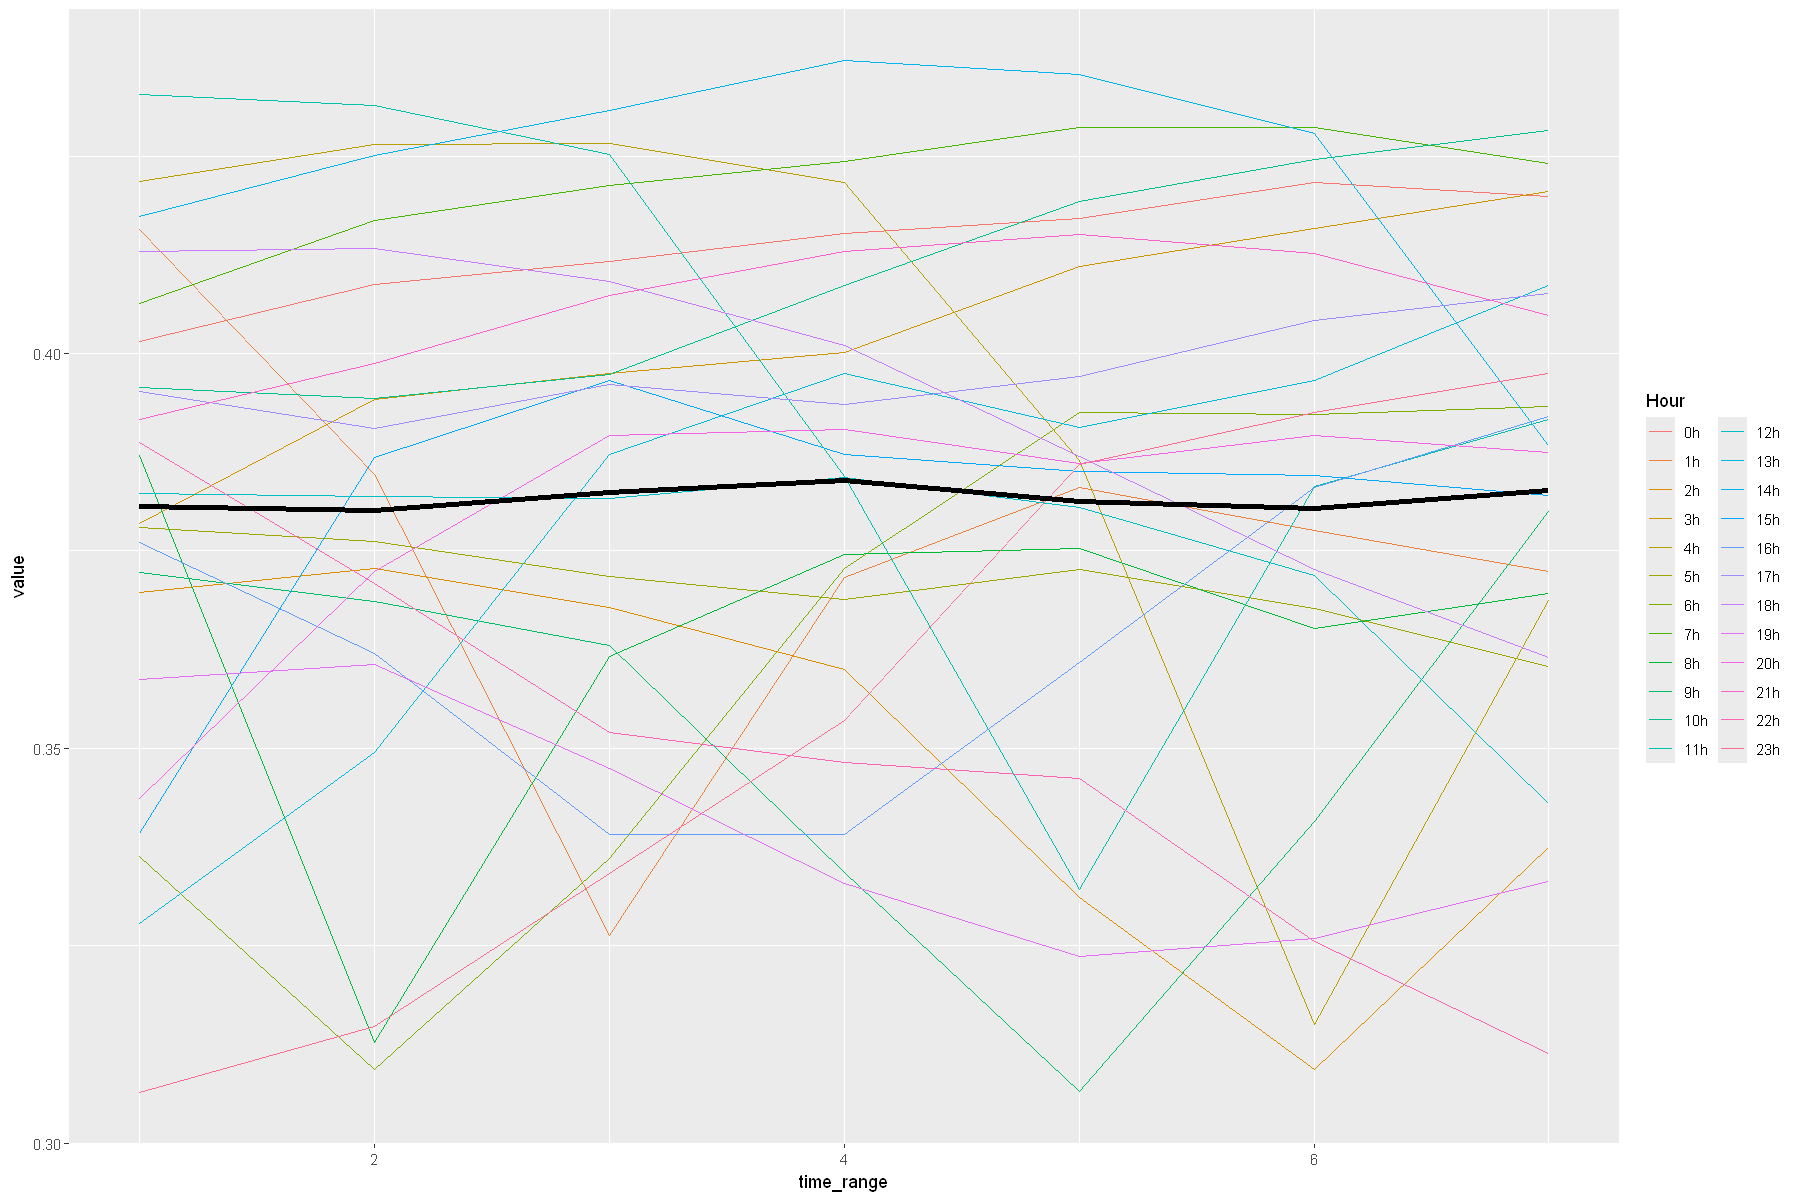

In [4]:
mean_per_hour_per_day = colMeans(loading)
mean_per_hour_per_day = matrix(mean_per_hour_per_day, nrow = 7)
mean_per_hour_per_day
mean_per_hour         = rowMeans(mean_per_hour_per_day)
# --- #

mean_per_hour_per_day            = as.data.frame(mean_per_hour_per_day)
colnames(mean_per_hour_per_day) <- list("0h", "1h", "2h","3h", "4h", "5h", "6h", "7h", "8h", "9h", "10h", "11h", "12h", "13h", "14h", "15h", "16h", "17h", "18h", "19h", "20h", "21h", "22h", "23h")
mean_per_hour_per_day$time_range = c(1:7)
mean_per_hour_per_day            = melt(mean_per_hour_per_day, id='time_range', variable.name='Hour')

mean_per_hour            = as.data.frame(mean_per_hour)
colnames(mean_per_hour)  = list("Weekly")
mean_per_hour$time_range = c(1:7)

# --- #
mean_per_hour_per_day
options(repr.plot.width = 15, repr.plot.height = 10)

ggplot() +  
        geom_line(data=mean_per_hour_per_day, aes(x=time_range, y=value, color=Hour)) + 
        geom_line(data=mean_per_hour, aes(x = time_range , y=Weekly), linewidth = 1.5)

In [145]:
### on voit que la moyenne ne varie pas du tout  

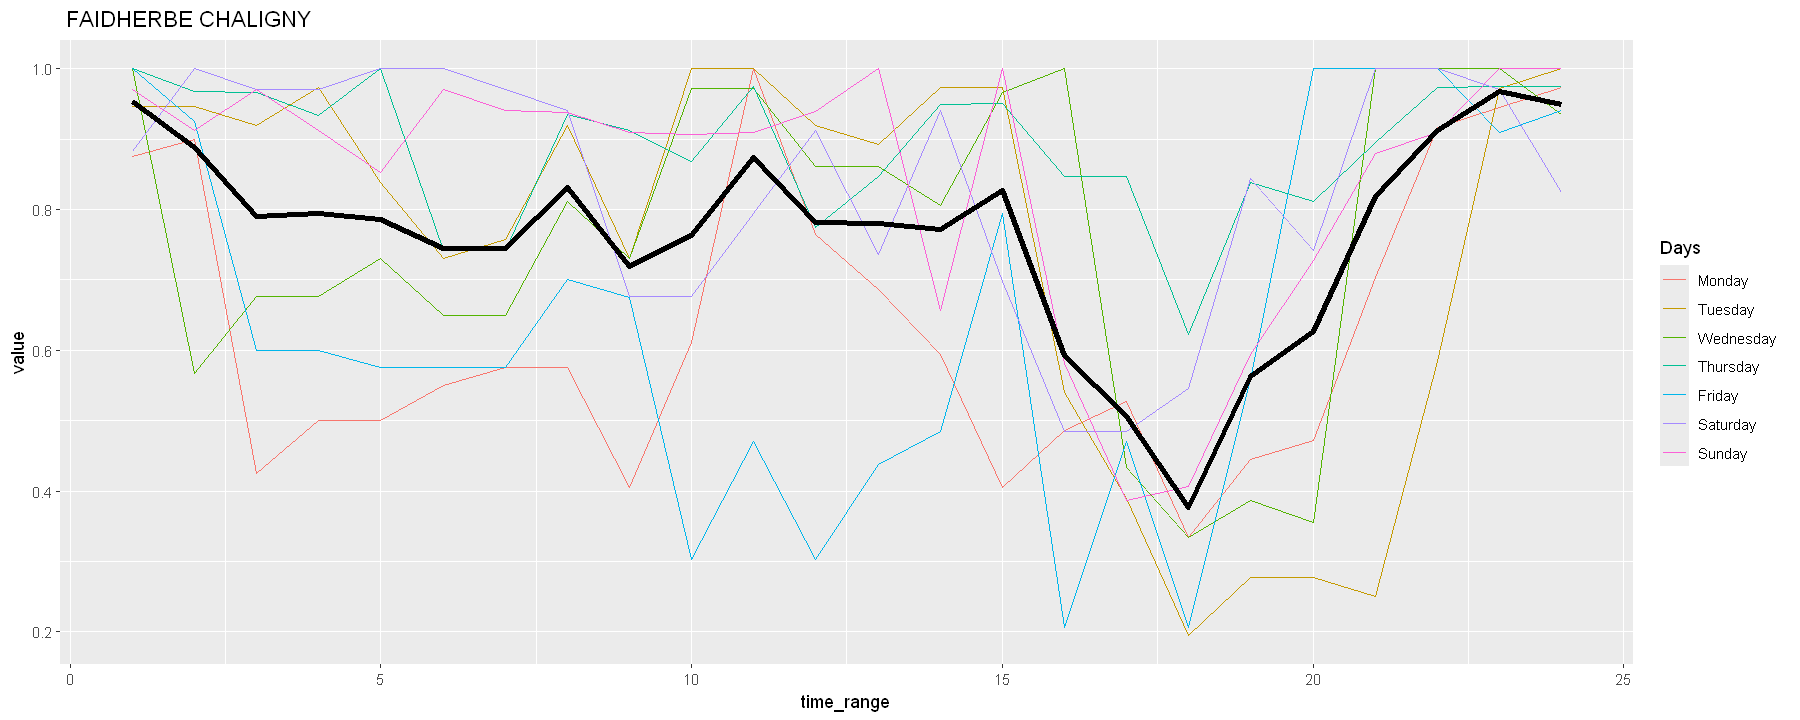

In [5]:
options(repr.plot.width = 15, repr.plot.height = 6)
time_range = 1:24
i = sample(1:1189,1)
df = loading[i,]
mean_per_hour_per_day = matrix(df, nrow = 24)
mean_per_hour         = rowMeans(mean_per_hour_per_day)

mean_per_hour_per_day            = as.data.frame(mean_per_hour_per_day)
colnames(mean_per_hour_per_day)  = list("Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday")
mean_per_hour_per_day$time_range = c(1:24)
mean_per_hour_per_day            = melt(mean_per_hour_per_day, id='time_range', variable.name='Days')

mean_per_hour            = as.data.frame(mean_per_hour)
colnames(mean_per_hour)  = list("Weekly")
mean_per_hour$time_range = c(1:24)

ggplot() +  
       geom_line(data=mean_per_hour_per_day, aes(x=time_range, y=value, color=Days)) + 
       geom_line(data=mean_per_hour, aes(x = time_range , y=Weekly), linewidth = 1.5) +
       labs(title=velib$names[i])

time_range Days     value    
1    1         Monday   0.4015033
2    2         Monday   0.4087699
3    3         Monday   0.4117179
4    4         Monday   0.4151612
5    5         Monday   0.4171360
6    6         Monday   0.4216497
7    7         Monday   0.4198597
8    8         Monday   0.4157290
9    9         Monday   0.3846582
10  10         Monday   0.3263314
11  11         Monday   0.3717027
12  12         Monday   0.3830675
13  13         Monday   0.3775873
14  14         Monday   0.3724563
15  15         Monday   0.3697226
16  16         Monday   0.3728109
17  17         Monday   0.3678133
18  18         Monday   0.3600159
19  19         Monday   0.3311071
20  20         Monday   0.3093522
21  21         Monday   0.3374682
22  22         Monday   0.3785071
23  23         Monday   0.3941410
24  24         Monday   0.3975111
25   1         Tuesday  0.4000947
26   2         Tuesday  0.4110822
27   3         Tuesday  0.4159028
28   4         Tuesday  0.4205856
29   5         Tuesday  0.4217593
30   6         Tuesday  0.4265196
⋮   ⋮          ⋮        ⋮        
139 19         Saturday 0.3259182
140 20         Saturday 0.3331401
141 21         Saturday 0.3436258
142 22         Saturday 0.3723909
143 23         Saturday 0.3896178
144 24         Saturday 0.3903966
145  1         Sunday   0.3861085
146  2         Sunday   0.3896258
147  3         Sunday   0.3874670
148  4         Sunday   0.3916208
149  5         Sunday   0.3987399
150  6         Sunday   0.4074043
151  7         Sunday   0.4129987
152  8         Sunday   0.4150784
153  9         Sunday   0.4126909
154 10         Sunday   0.4048583
155 11         Sunday   0.3887208
156 12         Sunday   0.3709290
157 13         Sunday   0.3520322
158 14         Sunday   0.3481999
159 15         Sunday   0.3461471
160 16         Sunday   0.3255257
161 17         Sunday   0.3113339
162 18         Sunday   0.3063987
163 19         Sunday   0.3147302
164 20         Sunday   0.3340797
165 21         Sunday   0.3534932
166 22         Sunday   0.3859750
167 23         Sunday   0.3925517
168 24         Sunday   0.3975290

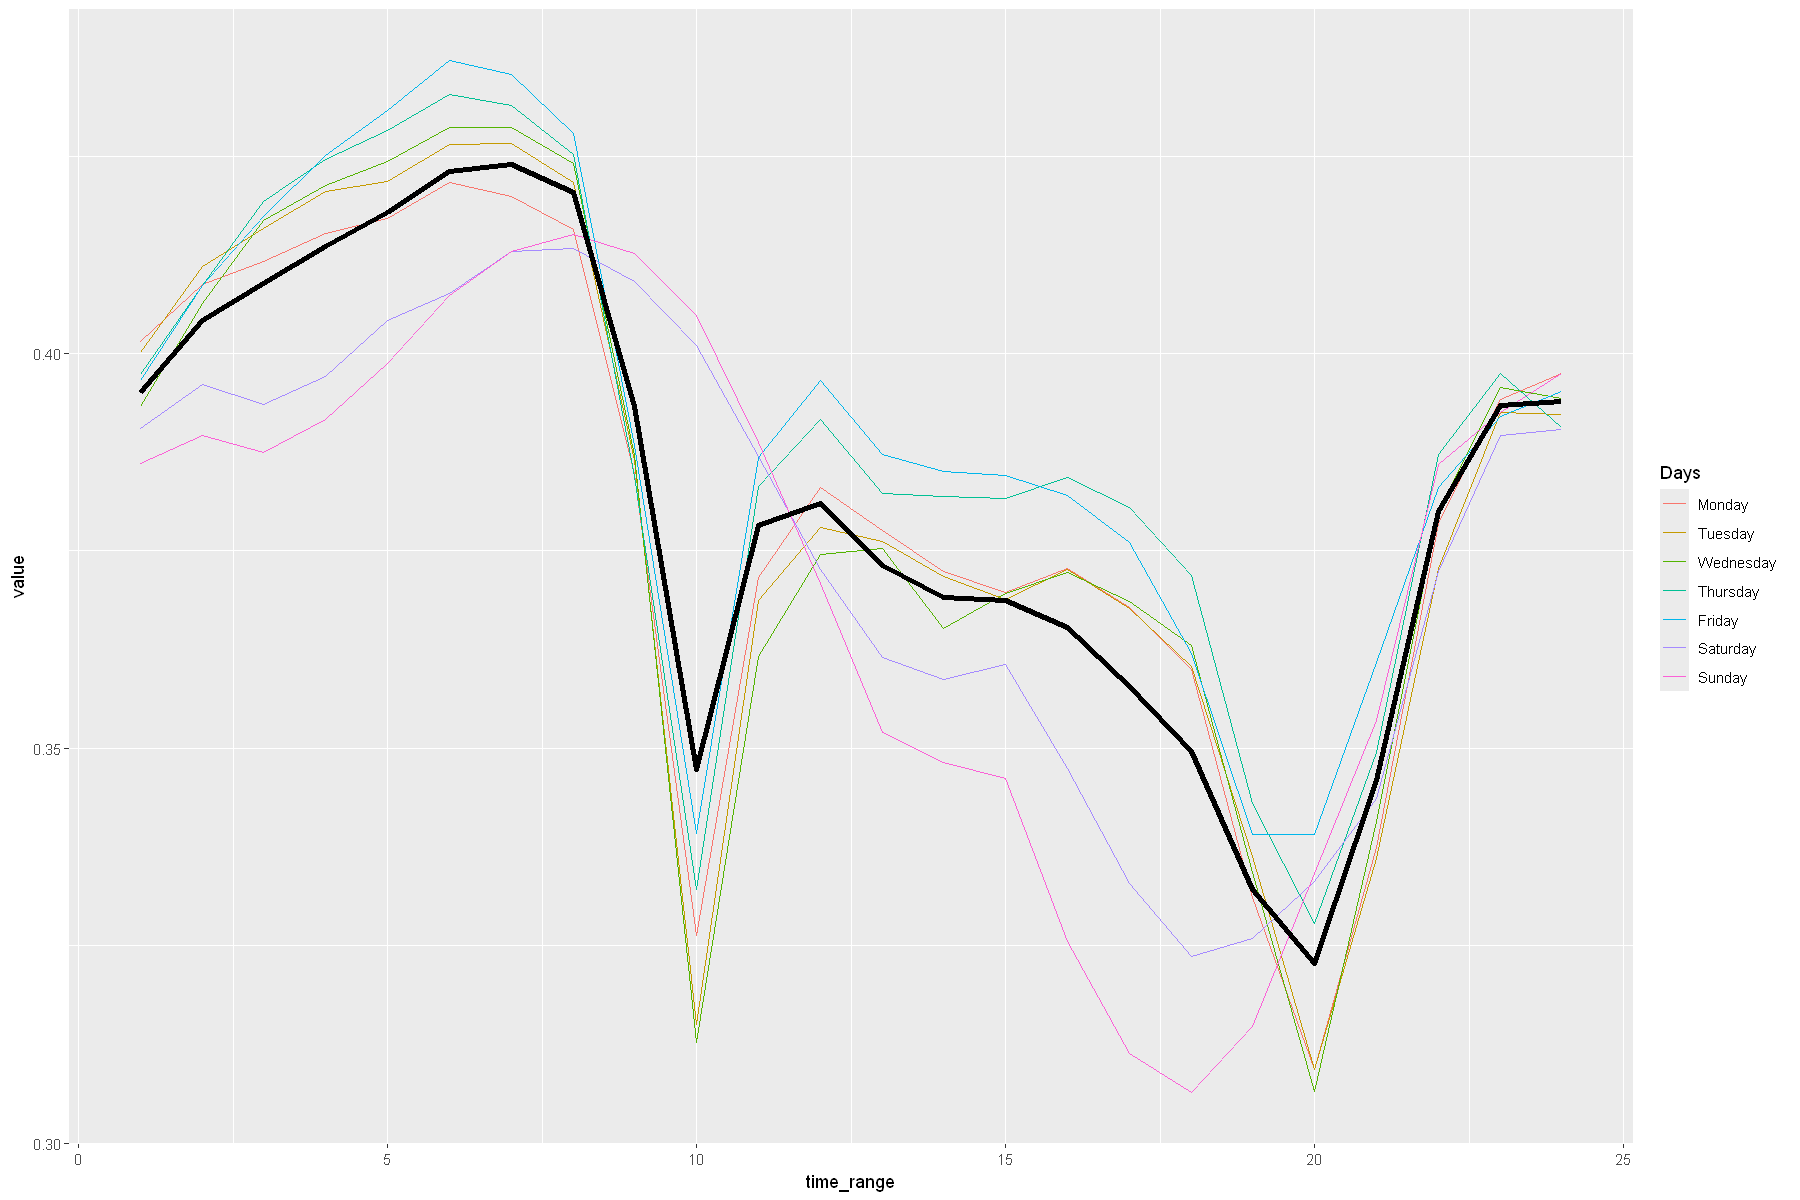

In [6]:
### TO BE COMPLETED ### 
mean_per_hour_per_day = colMeans(loading)
mean_per_hour_per_day = matrix(mean_per_hour_per_day, nrow = 24)
mean_per_hour         = rowMeans(mean_per_hour_per_day)
# --- #

mean_per_hour_per_day            = as.data.frame(mean_per_hour_per_day)
colnames(mean_per_hour_per_day)  = list("Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday")
mean_per_hour_per_day$time_range = c(1:24)
mean_per_hour_per_day            = melt(mean_per_hour_per_day, id='time_range', variable.name='Days')

mean_per_hour            = as.data.frame(mean_per_hour)
colnames(mean_per_hour)  = list("Weekly")
mean_per_hour$time_range = c(1:24)

# --- #
mean_per_hour_per_day
options(repr.plot.width = 15, repr.plot.height = 10)

ggplot() +  
        geom_line(data=mean_per_hour_per_day, aes(x=time_range, y=value, color=Days)) + 
        geom_line(data=mean_per_hour, aes(x = time_range , y=Weekly), linewidth = 1.5)


In [7]:
### conclusion : on ne peut pas distinguer de comportement jour/nuit en moyenne car ça s'équilibre sur les stations (on varie entre 42,5 et 37,5)
### Néanmoins, on peut voir que certaines stations sont plus pleines la nuit que le jour et inversement d'autres sont plus pleines le jour que la nuit
### Donc pourquoi pas envisager des classes entre les stations prises la nuit et celles prises le jour (et imaginer des va et vient de vélos entre elles)
### stations proches des lieux de travail donc pleines le jour, d'autres proches des lieux de résidence (en périphérie) donc pleines la nuit.
### voir map

ℹ Google's Terms of Service: <https://mapsplatform.google.com>
  Stadia Maps' Terms of Service: <https://stadiamaps.com/terms-of-service/>
  OpenStreetMap's Tile Usage Policy: <https://operations.osmfoundation.org/policies/tiles/>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.

Attachement du package : 'ggmap'


L'objet suivant est masqué depuis 'package:plotly':

    wind


ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.



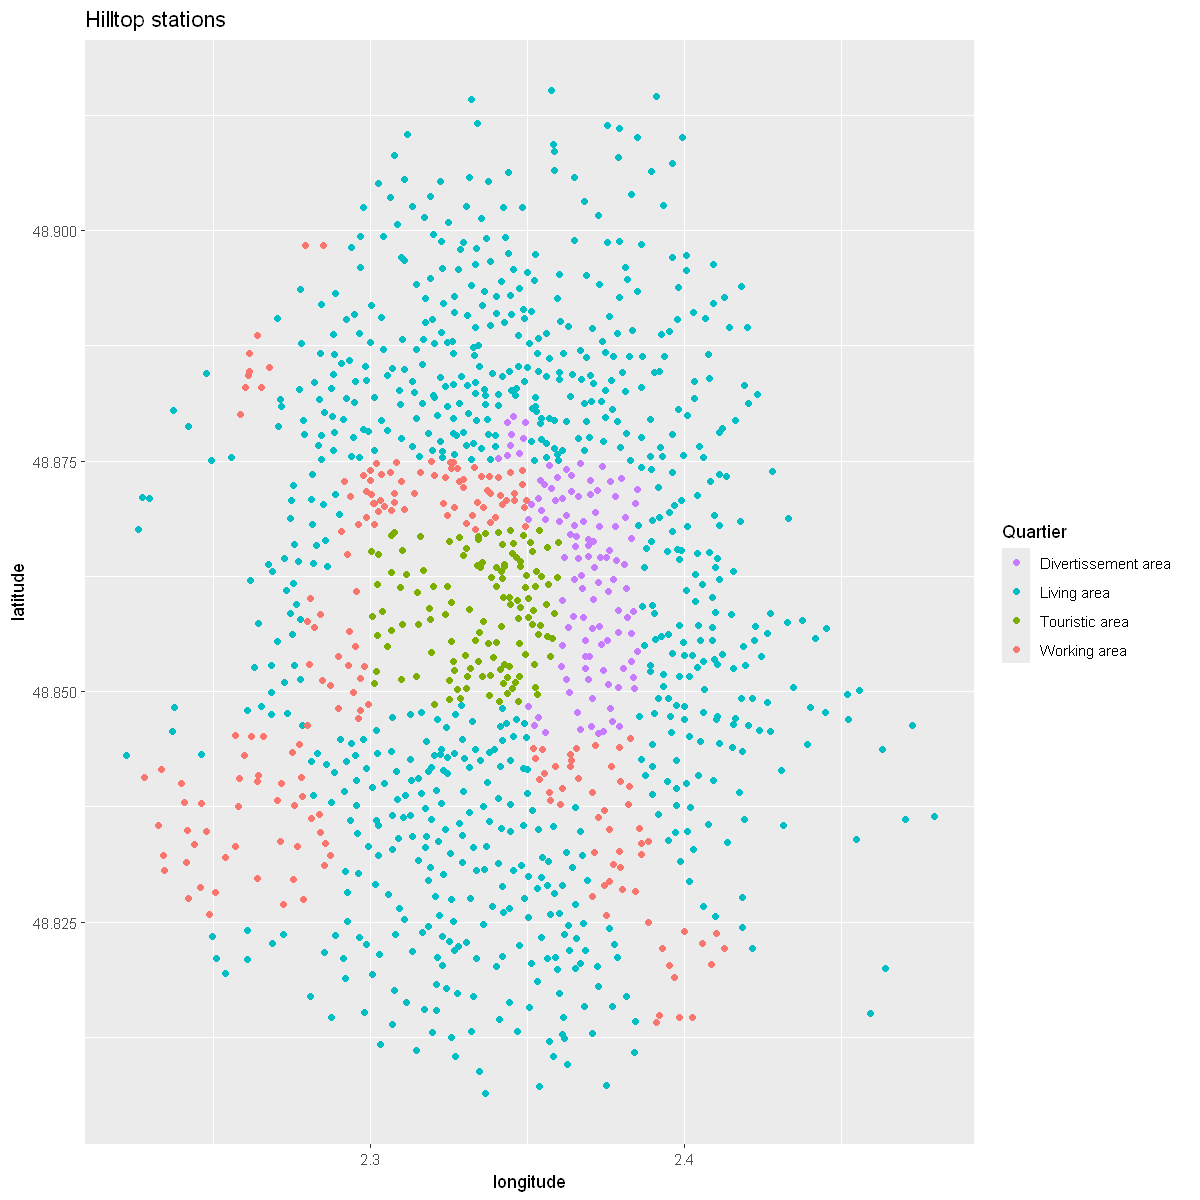

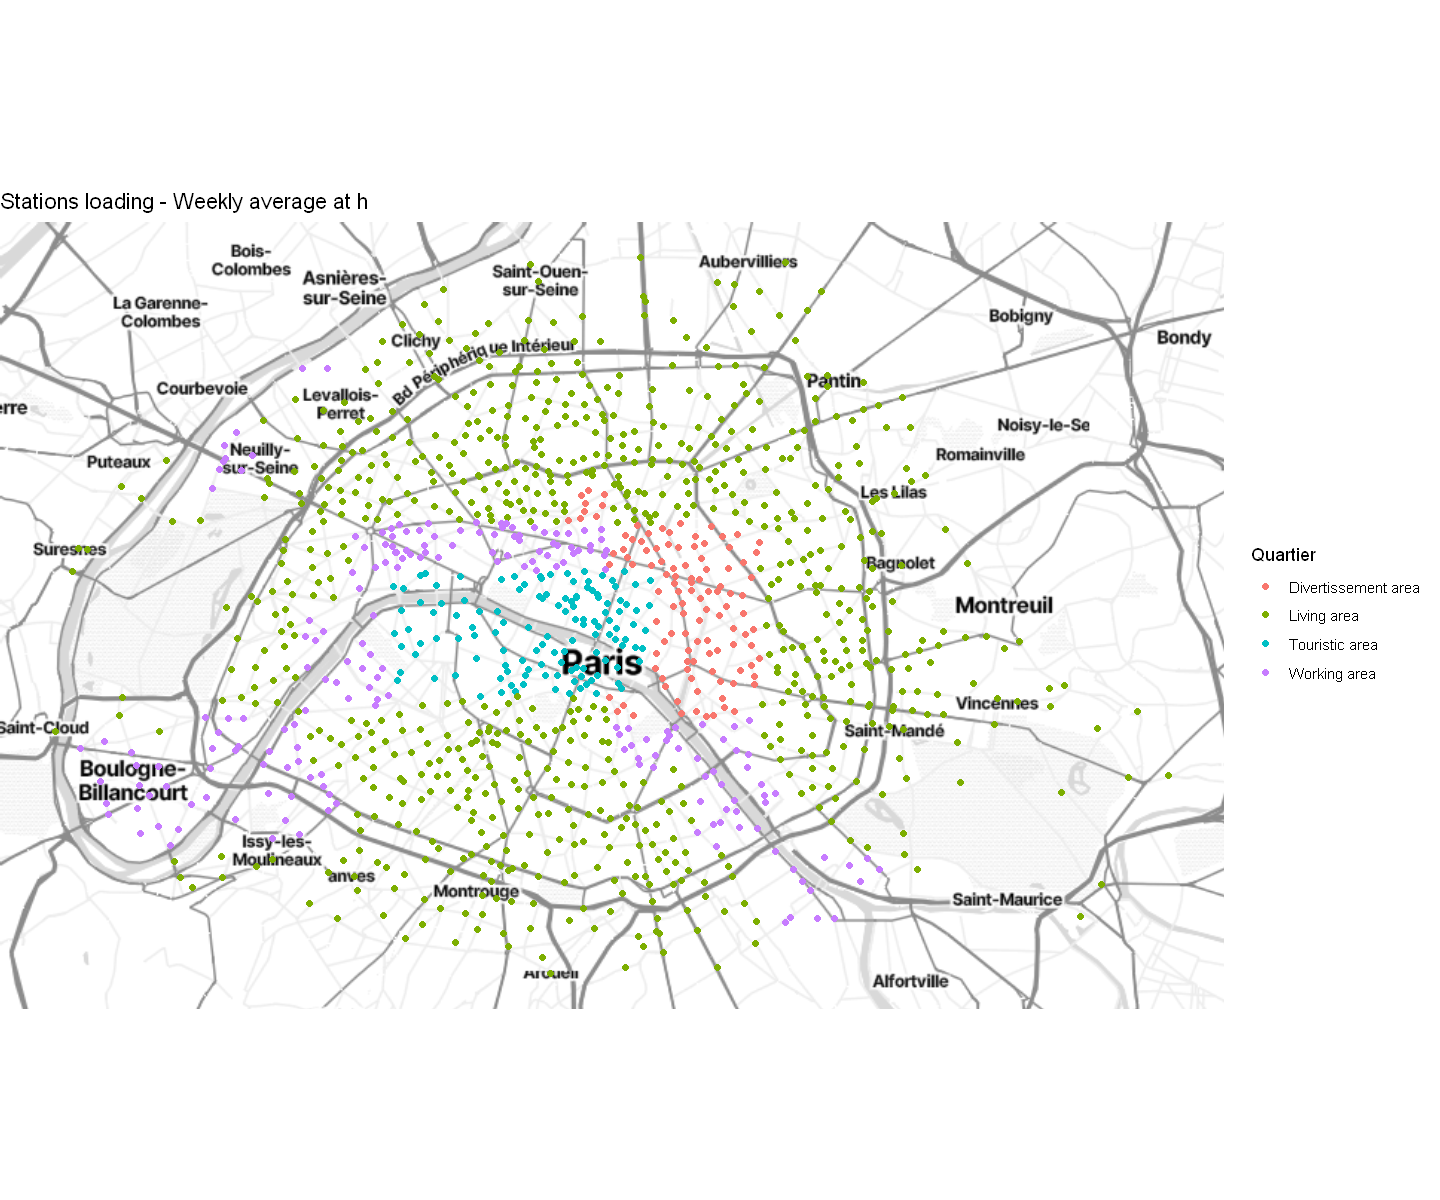

In [8]:
library(ggmap)
coord$Quartier <- ifelse(between(coord$latitude, 48.8, 48.125) & between(coord$longitude, 2.3, 2.35), "Living area",
                  ifelse(between(coord$latitude, 48.8, 48.8125) & between(coord$longitude, 2.35, 2.4), "Living area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.2, 2.3), "Living area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.3, 2.35), "Living area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.35, 2.388), "Living area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.388, 2.415), "Working area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.415, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.2, 2.25), "Working area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.25, 2.29), "Working area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.29, 2.37), "Living area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.37, 2.39), "Working area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.39, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.8375, 48.8425) & between(coord$longitude, 2.2, 2.25), "Working area",
                  ifelse(between(coord$latitude, 48.8425, 48.85) & between(coord$longitude, 2.2, 2.25), "Living area",
                  ifelse(between(coord$latitude, 48.8375, 48.8455) & between(coord$longitude, 2.25, 2.28), "Working area",
                  ifelse(between(coord$latitude, 48.8375, 48.8455) & between(coord$longitude, 2.28, 2.35), "Living area",
                  ifelse(between(coord$latitude, 48.8375, 48.8455) & between(coord$longitude, 2.35, 2.385), "Working area",
                  ifelse(between(coord$latitude, 48.8375, 48.8455) & between(coord$longitude, 2.385, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.8455, 48.8625) & between(coord$longitude, 2.25, 2.28), "Living area",
                  ifelse(between(coord$latitude, 48.8455, 48.8625) & between(coord$longitude, 2.28, 2.3), "Working area",
                  ifelse(between(coord$latitude, 48.8485, 48.8675) & between(coord$longitude, 2.3, 2.36), "Touristic area",
                  ifelse(between(coord$latitude, 48.86, 48.8675) & between(coord$longitude, 2.36, 2.37), "Divertissement area",
                  ifelse(between(coord$latitude, 48.86, 48.8625) & between(coord$longitude, 2.37, 2.39), "Divertissement area",
                  ifelse(between(coord$latitude, 48.8455, 48.86) & between(coord$longitude, 2.35, 2.385), "Divertissement area",
                  ifelse(between(coord$latitude, 48.8455, 48.8625) & between(coord$longitude, 2.385, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.8625, 48.875) & between(coord$longitude, 2.2, 2.29), "Living area",
                  ifelse(between(coord$latitude, 48.8625, 48.875) & between(coord$longitude, 2.29, 2.35), "Working area",
                  ifelse(between(coord$latitude, 48.8625, 48.875) & between(coord$longitude, 2.35, 2.385), "Divertissement area",
                  ifelse(between(coord$latitude, 48.8625, 48.875) & between(coord$longitude, 2.385, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.875, 48.88) & between(coord$longitude, 2.2, 2.3), "Living area",
                  ifelse(between(coord$latitude, 48.875, 48.88) & between(coord$longitude, 2.34, 2.35), "Divertissement area",
                  ifelse(between(coord$latitude, 48.88, 48.89) & between(coord$longitude, 2.25, 2.27), "Working area",
                  ifelse(between(coord$latitude, 48.898, 48.9) & between(coord$longitude, 2.27, 2.29), "Working area",
                  ifelse(between(coord$latitude, 48.875, 48.885) & between(coord$longitude, 2.3, 2.34), "Living area",
                  ifelse(between(coord$latitude, 48.88, 48.885) & between(coord$longitude, 2.34, 2.35), "Living area",
                  ifelse(between(coord$latitude, 48.875, 48.885) & between(coord$longitude, 2.35, 2.5), "Living area",    
                  ifelse(between(coord$latitude, 48.885, 49) & between(coord$longitude, 2.29, 2.32), "Living area","Living area")))))))))))))))))))))))))))))))))))))
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(coord, aes(x=longitude, y=latitude, color=Quartier)) + 
    geom_point() +
    scale_color_hue(direction = -1) +
    labs(title = 'Hilltop stations')
# --- #

options(repr.plot.width = 12, repr.plot.height = 10)

qmplot(data=coord, longitude, latitude, color=Quartier) +
    labs(title = paste('Stations loading - Weekly average at','h'))

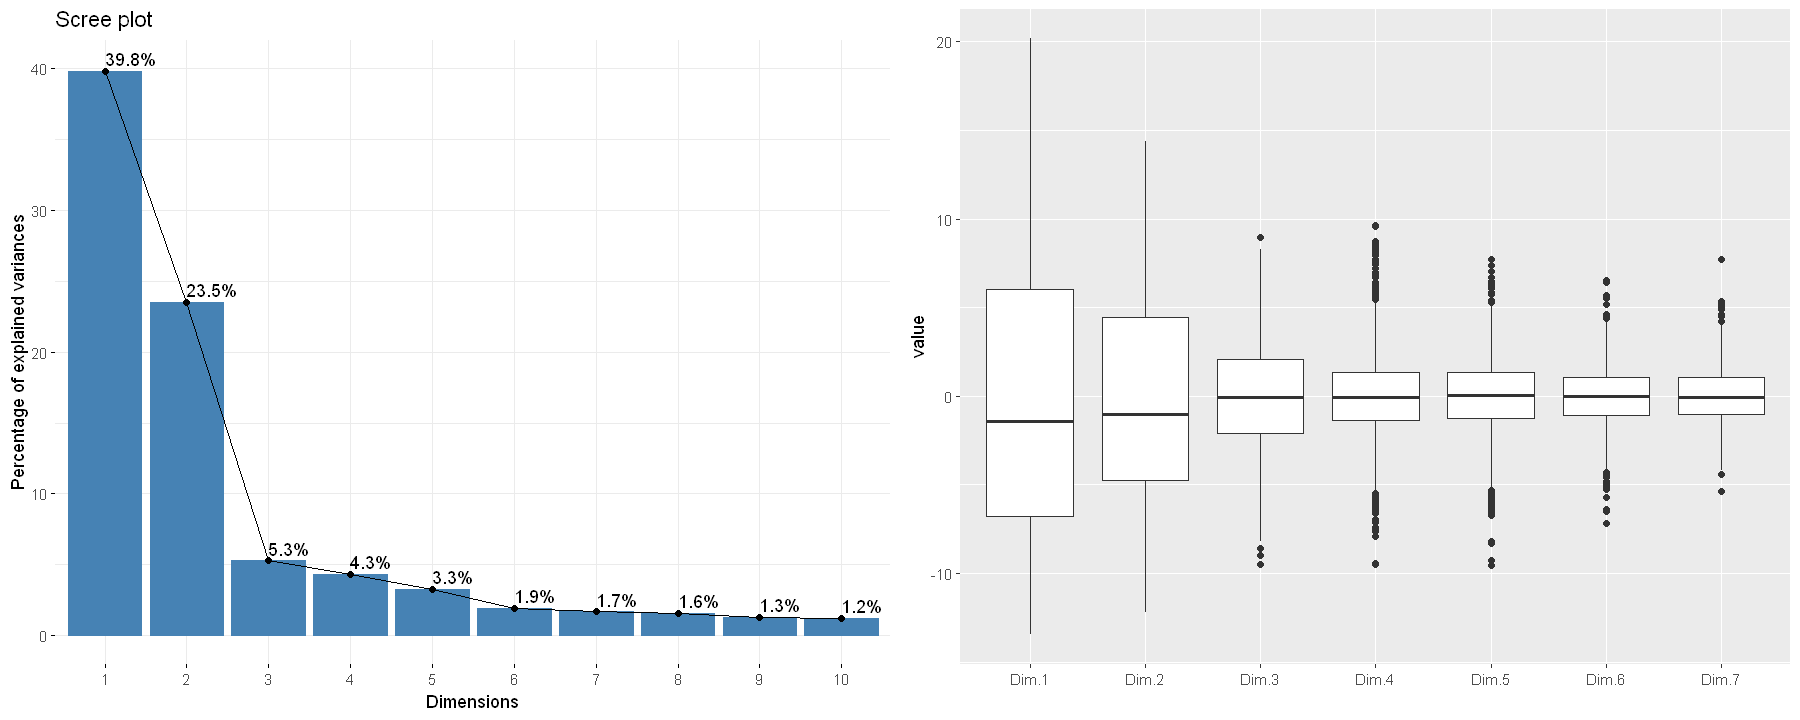

In [36]:
### ACP
loading <- as.data.frame(loading)
loading$Hill <- as.factor(coord$bonus)
loading$Quartier <- ifelse(between(coord$latitude, 48.8, 48.125) & between(coord$longitude, 2.3, 2.35), "Living area",
                  ifelse(between(coord$latitude, 48.8, 48.8125) & between(coord$longitude, 2.35, 2.4), "Living area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.2, 2.3), "Living area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.3, 2.35), "Living area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.35, 2.388), "Living area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.388, 2.415), "Working area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.415, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.2, 2.25), "Working area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.25, 2.29), "Working area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.29, 2.37), "Living area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.37, 2.39), "Working area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.39, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.8375, 48.8425) & between(coord$longitude, 2.2, 2.25), "Working area",
                  ifelse(between(coord$latitude, 48.8425, 48.85) & between(coord$longitude, 2.2, 2.25), "Living area",
                  ifelse(between(coord$latitude, 48.8375, 48.8455) & between(coord$longitude, 2.25, 2.28), "Working area",
                  ifelse(between(coord$latitude, 48.8375, 48.8455) & between(coord$longitude, 2.28, 2.35), "Living area",
                  ifelse(between(coord$latitude, 48.8375, 48.8455) & between(coord$longitude, 2.35, 2.385), "Working area",
                  ifelse(between(coord$latitude, 48.8375, 48.8455) & between(coord$longitude, 2.385, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.8455, 48.8625) & between(coord$longitude, 2.25, 2.28), "Living area",
                  ifelse(between(coord$latitude, 48.8455, 48.8625) & between(coord$longitude, 2.28, 2.3), "Working area",
                  ifelse(between(coord$latitude, 48.8485, 48.8675) & between(coord$longitude, 2.3, 2.36), "Touristic area",
                  ifelse(between(coord$latitude, 48.86, 48.8675) & between(coord$longitude, 2.36, 2.37), "Divertissement area",
                  ifelse(between(coord$latitude, 48.86, 48.8625) & between(coord$longitude, 2.37, 2.39), "Divertissement area",
                  ifelse(between(coord$latitude, 48.8455, 48.86) & between(coord$longitude, 2.35, 2.385), "Divertissement area",
                  ifelse(between(coord$latitude, 48.8455, 48.8625) & between(coord$longitude, 2.385, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.8625, 48.875) & between(coord$longitude, 2.2, 2.29), "Living area",
                  ifelse(between(coord$latitude, 48.8625, 48.875) & between(coord$longitude, 2.29, 2.35), "Working area",
                  ifelse(between(coord$latitude, 48.8625, 48.875) & between(coord$longitude, 2.35, 2.385), "Divertissement area",
                  ifelse(between(coord$latitude, 48.8625, 48.875) & between(coord$longitude, 2.385, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.875, 48.88) & between(coord$longitude, 2.2, 2.3), "Living area",
                  ifelse(between(coord$latitude, 48.875, 48.88) & between(coord$longitude, 2.34, 2.35), "Divertissement area",
                  ifelse(between(coord$latitude, 48.88, 48.89) & between(coord$longitude, 2.25, 2.27), "Working area",
                  ifelse(between(coord$latitude, 48.898, 48.9) & between(coord$longitude, 2.27, 2.29), "Working area",
                  ifelse(between(coord$latitude, 48.875, 48.885) & between(coord$longitude, 2.3, 2.34), "Living area",
                  ifelse(between(coord$latitude, 48.88, 48.885) & between(coord$longitude, 2.34, 2.35), "Living area",
                  ifelse(between(coord$latitude, 48.875, 48.885) & between(coord$longitude, 2.35, 2.5), "Living area",    
                  ifelse(between(coord$latitude, 48.885, 49) & between(coord$longitude, 2.29, 2.32), "Living area","Living area")))))))))))))))))))))))))))))))))))))
loading$Quartier <- as.factor(loading$Quartier)
library(FactoMineR)
loading[,-c(169,170)] = scale(loading[,-c(169,170)], scale=T, center=T)
acp <- PCA(loading, scale.unit = TRUE,
           graph = FALSE, quali.sup=c(169,170), ncp = 7)
# Décroissance des valeurs propres
library(factoextra)
g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

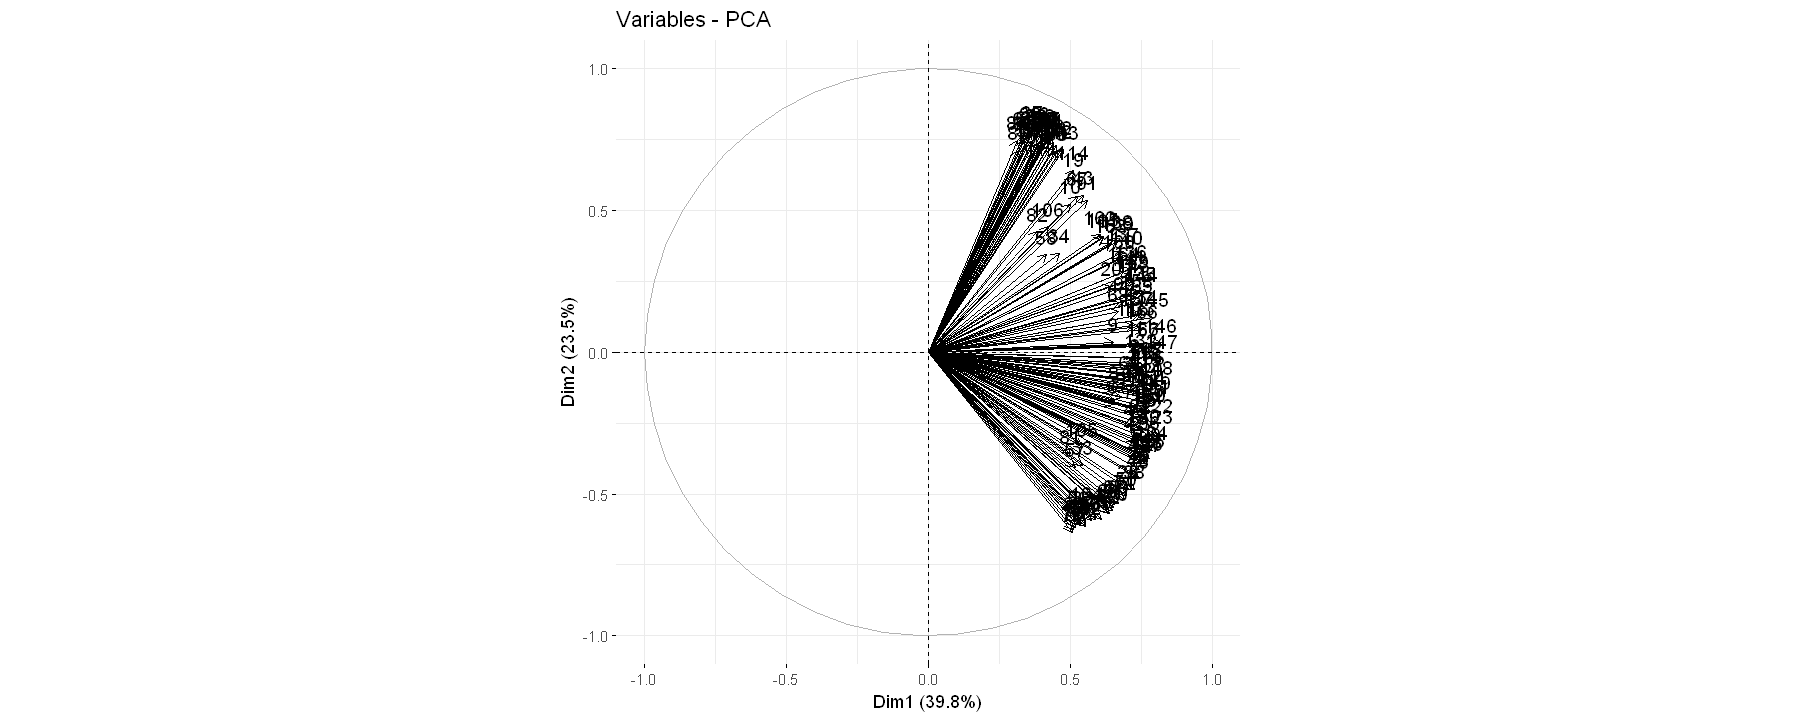

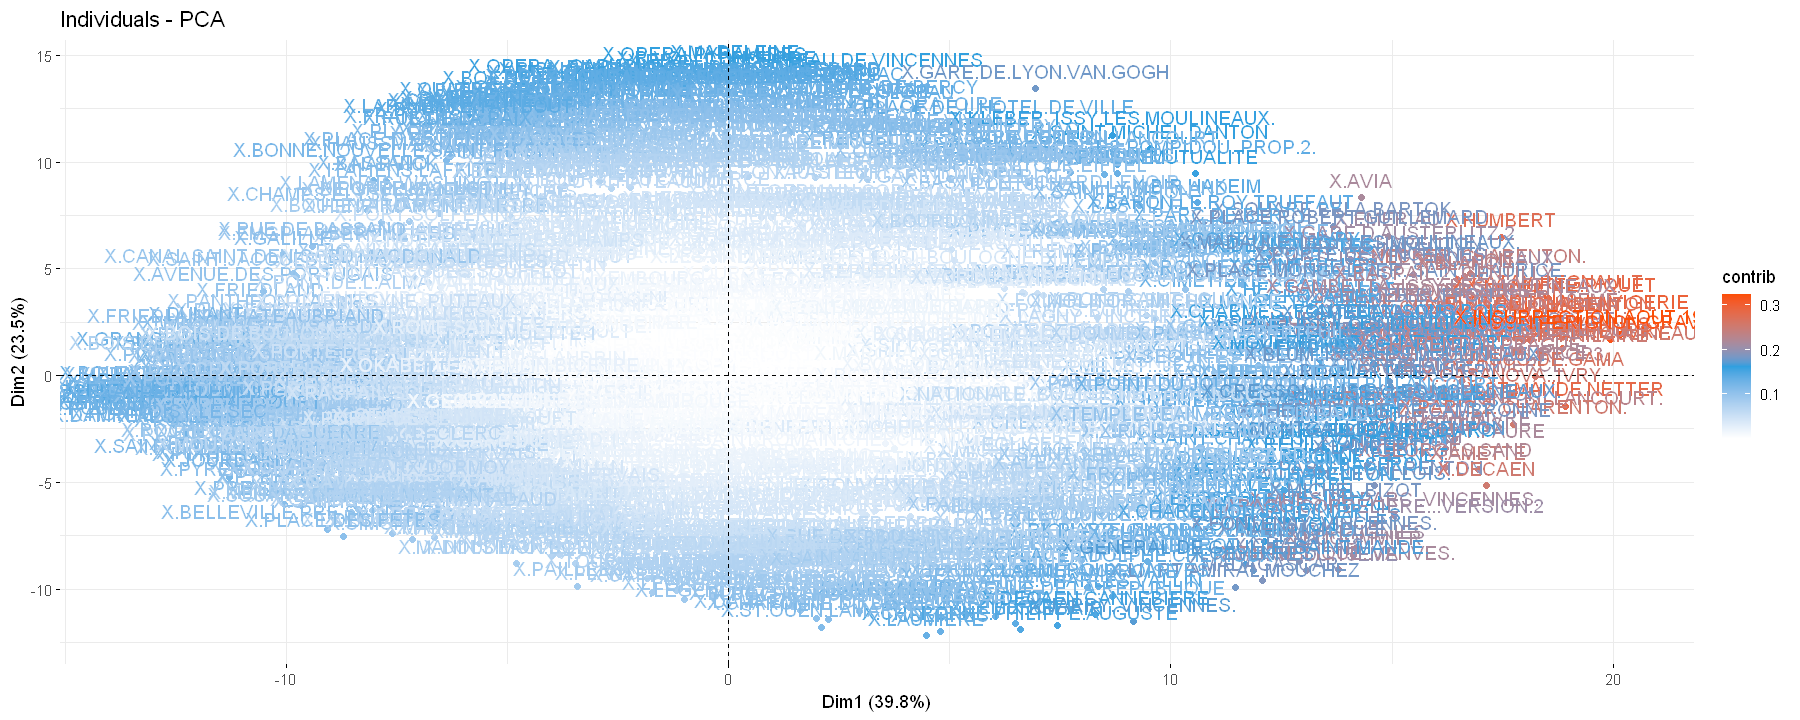

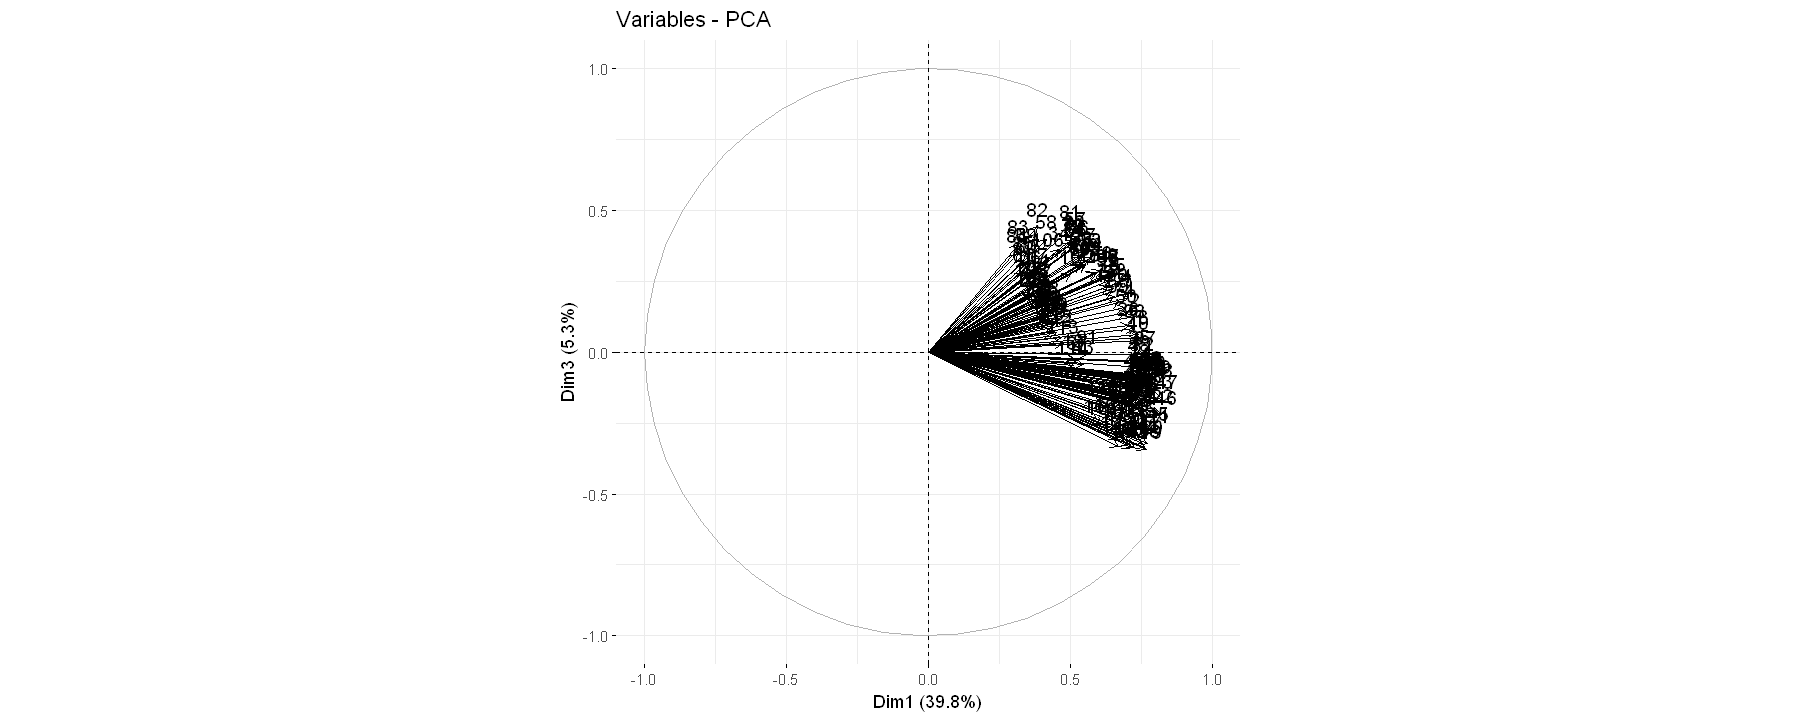

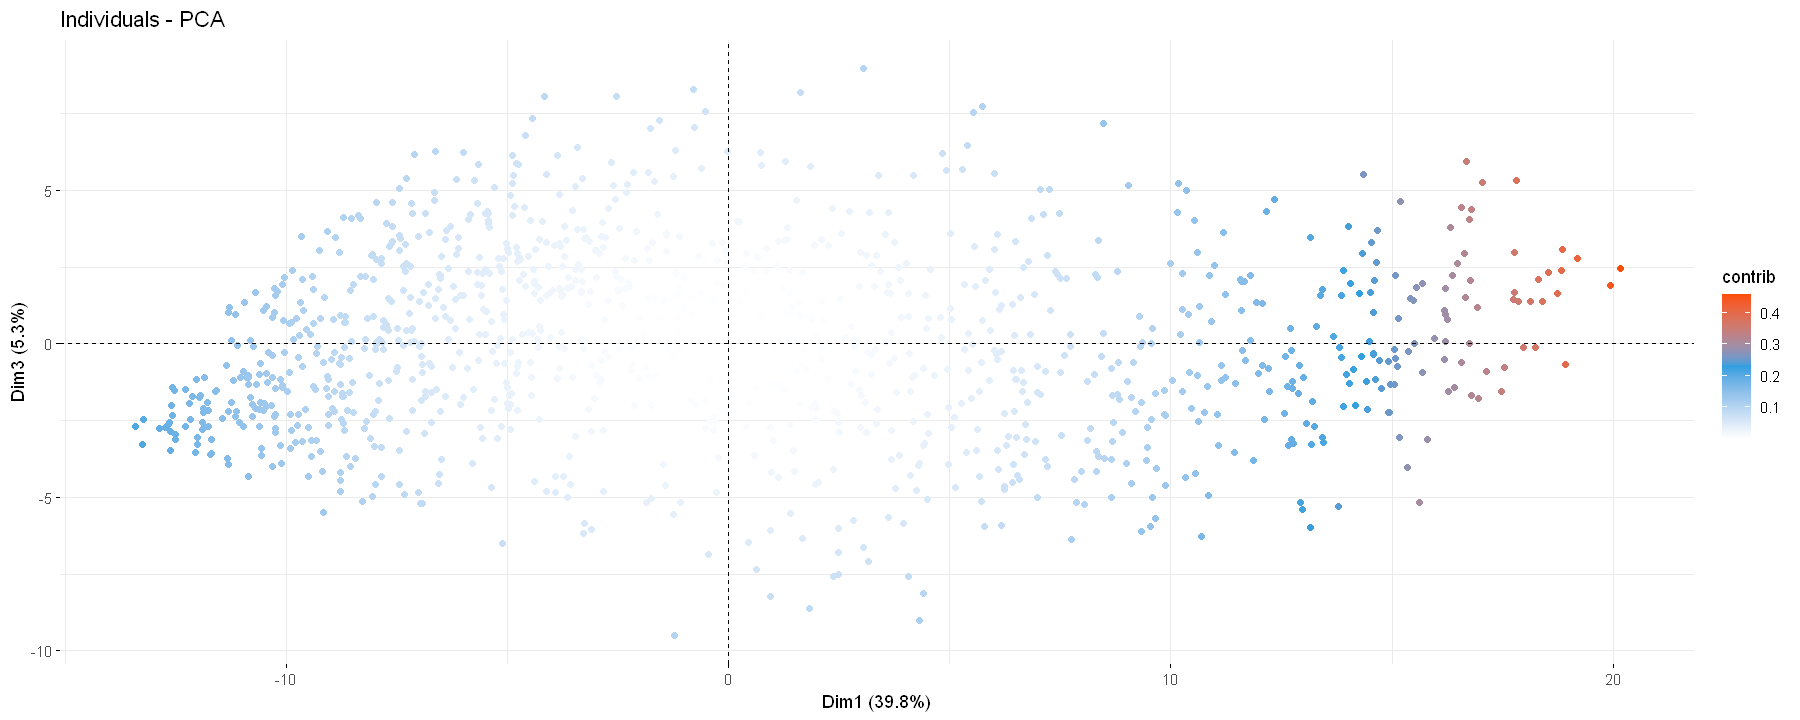

In [37]:
fviz_pca_var(acp)
fviz_pca_ind(acp,col.ind="contrib",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_var(acp,axes=c(1,3))
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))

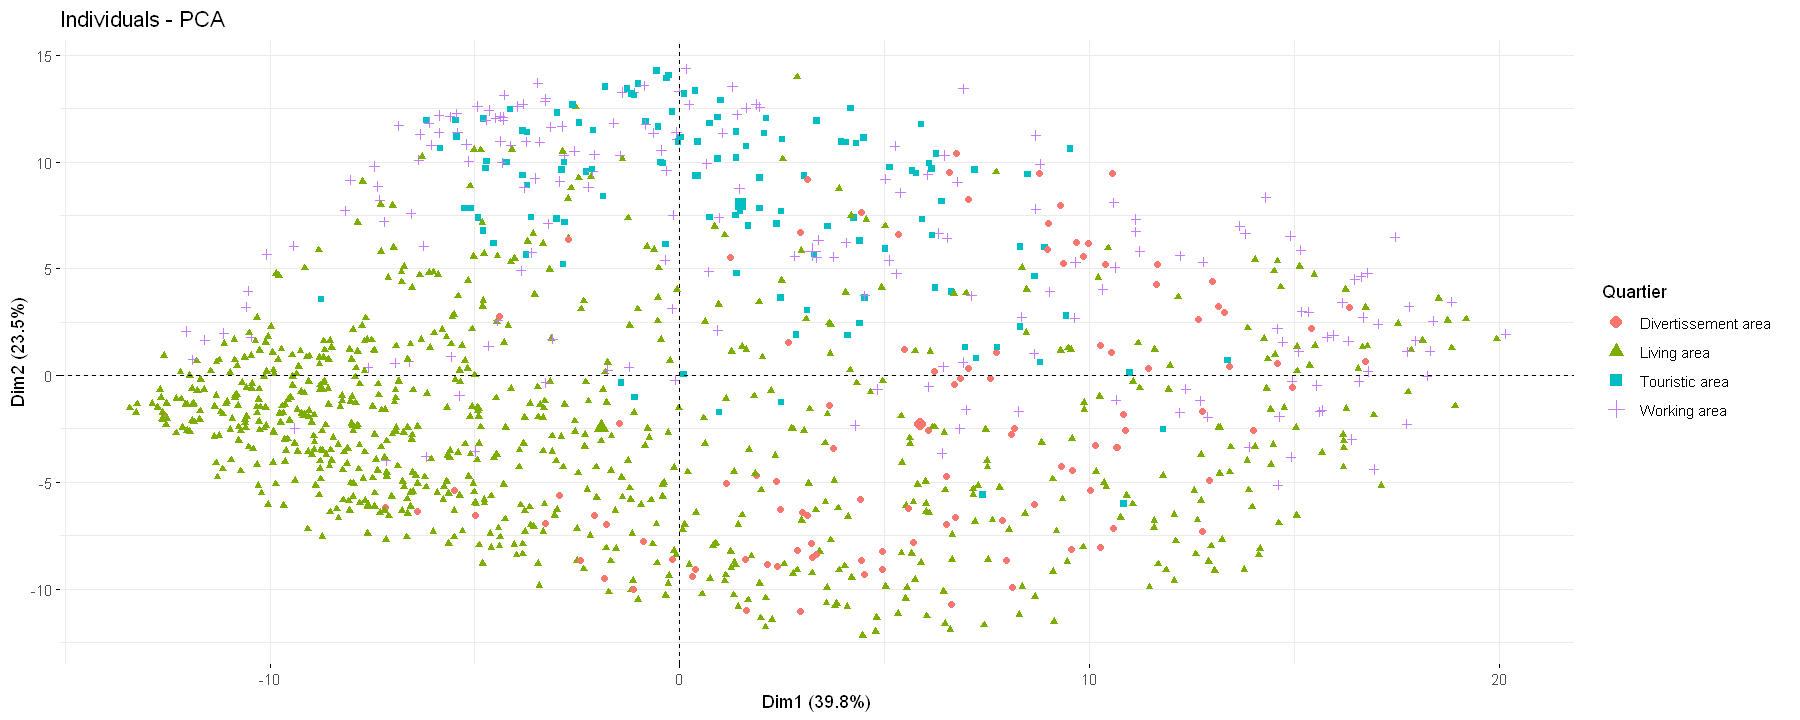

In [38]:
fviz_pca_ind(acp, label="none", habillage=170)

In [12]:
minuit_am <- rowMeans(loading[,c(1,25,49,73,97,121,145)])
une_am <- rowMeans(loading[,c(2,26,50,74,98,122,146)])
deux_am <- rowMeans(loading[,c(3,27,51,75,99,123,147)])
trois_am <- rowMeans(loading[,c(4,28,52,76,100,124,148)])
quatre_am <- rowMeans(loading[,c(5,29,53,77,101,125,149)])
cinq_am <- rowMeans(loading[,c(6,30,54,78,102,126,150)])
six_am <- rowMeans(loading[,c(7,31,55,79,103,127,151)])
sept_am <- rowMeans(loading[,c(8,32,56,80,104,128,152)])
huit_am <- rowMeans(loading[,c(9,33,57,81,105,129,153)])
neuf_am <- rowMeans(loading[,c(10,34,58,82,106,130,154)])
dix_am <- rowMeans(loading[,c(11,35,59,83,107,131,155)])
onze_am <- rowMeans(loading[,c(12,36,60,84,108,132,156)])
minuit_pm <- rowMeans(loading[,c(13,37,61,85,109,133,157)])
une_pm <- rowMeans(loading[,c(14,38,62,86,110,134,158)])
deux_pm <- rowMeans(loading[,c(15,39,63,87,111,135,159)])
trois_pm <- rowMeans(loading[,c(16,40,64,88,112,136,160)])
quatre_pm <- rowMeans(loading[,c(17,41,65,89,113,137,161)])
cinq_pm <- rowMeans(loading[,c(18,42,66,90,114,138,162)])
six_pm <- rowMeans(loading[,c(19,43,67,91,115,139,163)])
sept_pm <- rowMeans(loading[,c(20,44,68,92,116,140,164)])
huit_pm <- rowMeans(loading[,c(21,45,69,93,117,141,165)])
neuf_pm <- rowMeans(loading[,c(22,46,70,94,118,142,166)])
dix_pm <- rowMeans(loading[,c(23,47,71,95,119,143,167)])
onze_pm <- rowMeans(loading[,c(24,48,72,96,120,144,168)])
df1 <- data.frame(Minuit = minuit_am, "une h" = une_am, "2h" = deux_am, "3h" = trois_am, "4h" = quatre_am, "5h" = cinq_am, "6h" = six_am, "7h" = sept_am, "8h" = huit_am, "9h" = neuf_am
                 , "10h" = dix_am, "11h" = onze_am, "12h" = minuit_pm, "13h" = une_pm, "14h" = deux_pm, "15h" = trois_pm, "16h" = quatre_pm, "17h" = cinq_pm, "18h" = six_pm, 
                 "19h" = sept_pm, "20h" = huit_pm, "21h" = neuf_pm, "22h" = dix_pm, "23h" = onze_pm)

colnames(df1) <- list("0h", "1h", "2h","3h", "4h", "5h", "6h", "7h", "8h", "9h", "10h", "11h", "12h", "13h", "14h", "15h", "16h", "17h", "18h", "19h", "20h", "21h", "22h", "23h")
df1$Station <- velib$names
df1$Hill <- as.factor(coord$bonus)

df1$Quartier <- ifelse(between(coord$latitude, 48.8, 48.125) & between(coord$longitude, 2.3, 2.35), "Living area",
                  ifelse(between(coord$latitude, 48.8, 48.8125) & between(coord$longitude, 2.35, 2.4), "Living area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.2, 2.3), "Living area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.3, 2.35), "Living area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.35, 2.388), "Living area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.388, 2.415), "Working area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.415, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.2, 2.25), "Working area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.25, 2.29), "Working area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.29, 2.37), "Living area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.37, 2.39), "Working area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.39, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.8375, 48.8425) & between(coord$longitude, 2.2, 2.25), "Working area",
                  ifelse(between(coord$latitude, 48.8425, 48.85) & between(coord$longitude, 2.2, 2.25), "Living area",
                  ifelse(between(coord$latitude, 48.8375, 48.8455) & between(coord$longitude, 2.25, 2.28), "Working area",
                  ifelse(between(coord$latitude, 48.8375, 48.8455) & between(coord$longitude, 2.28, 2.35), "Living area",
                  ifelse(between(coord$latitude, 48.8375, 48.8455) & between(coord$longitude, 2.35, 2.385), "Working area",
                  ifelse(between(coord$latitude, 48.8375, 48.8455) & between(coord$longitude, 2.385, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.8455, 48.8625) & between(coord$longitude, 2.25, 2.28), "Living area",
                  ifelse(between(coord$latitude, 48.8455, 48.8625) & between(coord$longitude, 2.28, 2.3), "Working area",
                  ifelse(between(coord$latitude, 48.8485, 48.8675) & between(coord$longitude, 2.3, 2.36), "Touristic area",
                  ifelse(between(coord$latitude, 48.86, 48.8675) & between(coord$longitude, 2.36, 2.37), "Divertissement area",
                  ifelse(between(coord$latitude, 48.86, 48.8625) & between(coord$longitude, 2.37, 2.39), "Divertissement area",
                  ifelse(between(coord$latitude, 48.8455, 48.86) & between(coord$longitude, 2.35, 2.385), "Divertissement area",
                  ifelse(between(coord$latitude, 48.8455, 48.8625) & between(coord$longitude, 2.385, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.8625, 48.875) & between(coord$longitude, 2.2, 2.29), "Living area",
                  ifelse(between(coord$latitude, 48.8625, 48.875) & between(coord$longitude, 2.29, 2.35), "Working area",
                  ifelse(between(coord$latitude, 48.8625, 48.875) & between(coord$longitude, 2.35, 2.385), "Divertissement area",
                  ifelse(between(coord$latitude, 48.8625, 48.875) & between(coord$longitude, 2.385, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.875, 48.88) & between(coord$longitude, 2.2, 2.3), "Living area",
                  ifelse(between(coord$latitude, 48.875, 48.88) & between(coord$longitude, 2.34, 2.35), "Divertissement area",
                  ifelse(between(coord$latitude, 48.88, 48.89) & between(coord$longitude, 2.25, 2.27), "Working area",
                  ifelse(between(coord$latitude, 48.898, 48.9) & between(coord$longitude, 2.27, 2.29), "Working area",
                  ifelse(between(coord$latitude, 48.875, 48.885) & between(coord$longitude, 2.3, 2.34), "Living area",
                  ifelse(between(coord$latitude, 48.88, 48.885) & between(coord$longitude, 2.34, 2.35), "Living area",
                  ifelse(between(coord$latitude, 48.875, 48.885) & between(coord$longitude, 2.35, 2.5), "Living area",    
                  ifelse(between(coord$latitude, 48.885, 49) & between(coord$longitude, 2.29, 2.32), "Living area","Living area")))))))))))))))))))))))))))))))))))))
df1$Quartier <- as.factor(df1$Quartier)
df1$Station <- as.factor(df1$Station)
df1[,-c(25,26,27)] = scale(df1[,-c(25,26,27)], scale=T, center=T)
head(df1)

0h          1h          2h          3h         
X.EURYALE.DEHAYNIN    -0.27544761 -0.26180851 -0.17069787 -0.11648142
X.LEMERCIER            1.46846390  1.39661917  1.34757019  1.36014318
X.MEZIERES.RENNES      0.26580194  0.03037288 -0.06346306 -0.09096579
X.FARMAN              -0.52341100 -0.52996749 -0.57752045 -0.52052210
X.QUAI.DE.LA.RAPEE     0.55579080  0.36016781  0.18947436  0.02524672
X.CHOISY.POINT.D.IVRY  0.00730792  0.18830228  0.15602666  0.21861407
                      4h          5h          6h          7h         
X.EURYALE.DEHAYNIN    -0.09083867 -0.09032752 -0.05379025 -0.12844845
X.LEMERCIER            1.38120777  1.38218658  1.39407758  1.40727846
X.MEZIERES.RENNES     -0.15597086 -0.25287795 -0.26985140 -0.26633232
X.FARMAN              -0.54019023 -0.56700580 -0.57780100 -0.48075732
X.QUAI.DE.LA.RAPEE    -0.13280089 -0.25088515 -0.37040379 -0.37909731
X.CHOISY.POINT.D.IVRY  0.17890335  0.22718174  0.25048826 -0.02378753
                      8h          9h          ⋯ 17h        18h       
X.EURYALE.DEHAYNIN     0.07105592 -0.98016921 ⋯ -1.0045798 -0.6053338
X.LEMERCIER            1.21926793 -0.61614413 ⋯ -0.7855258 -0.7042086
X.MEZIERES.RENNES     -0.49139968 -0.04620751 ⋯  0.8440890  0.9420084
X.FARMAN               0.29999349  2.02512006 ⋯  0.9950794 -0.2570404
X.QUAI.DE.LA.RAPEE    -0.35973103  0.68722871 ⋯  1.3525512  1.2690822
X.CHOISY.POINT.D.IVRY -0.26870725 -0.80255796 ⋯ -0.2975373 -0.5478137
                      19h        20h         21h        22h        23h       
X.EURYALE.DEHAYNIN    -0.2737721  0.63960261  0.3922229  0.5946515  0.3779981
X.LEMERCIER            0.4608892  1.37543066  1.2316379  1.3280975  1.3779238
X.MEZIERES.RENNES      0.9416421  0.66981521  0.6576349  0.6072846  0.5458383
X.FARMAN              -0.3704830 -0.40078369 -0.5689230 -0.6255707 -0.6449538
X.QUAI.DE.LA.RAPEE     0.9284643  0.45672117  0.4841009  0.3729203  0.3836193
X.CHOISY.POINT.D.IVRY  0.3540141  0.08667086  0.2364130  0.1048758  0.2453158
                      Station              Hill Quartier           
X.EURYALE.DEHAYNIN     EURYALE DEHAYNIN    0    Living area        
X.LEMERCIER            LEMERCIER           0    Living area        
X.MEZIERES.RENNES      MEZIERES RENNES     0    Touristic area     
X.FARMAN               FARMAN              0    Working area       
X.QUAI.DE.LA.RAPEE     QUAI DE LA RAPEE    0    Divertissement area
X.CHOISY.POINT.D.IVRY  CHOISY POINT D'IVRY 0    Living area

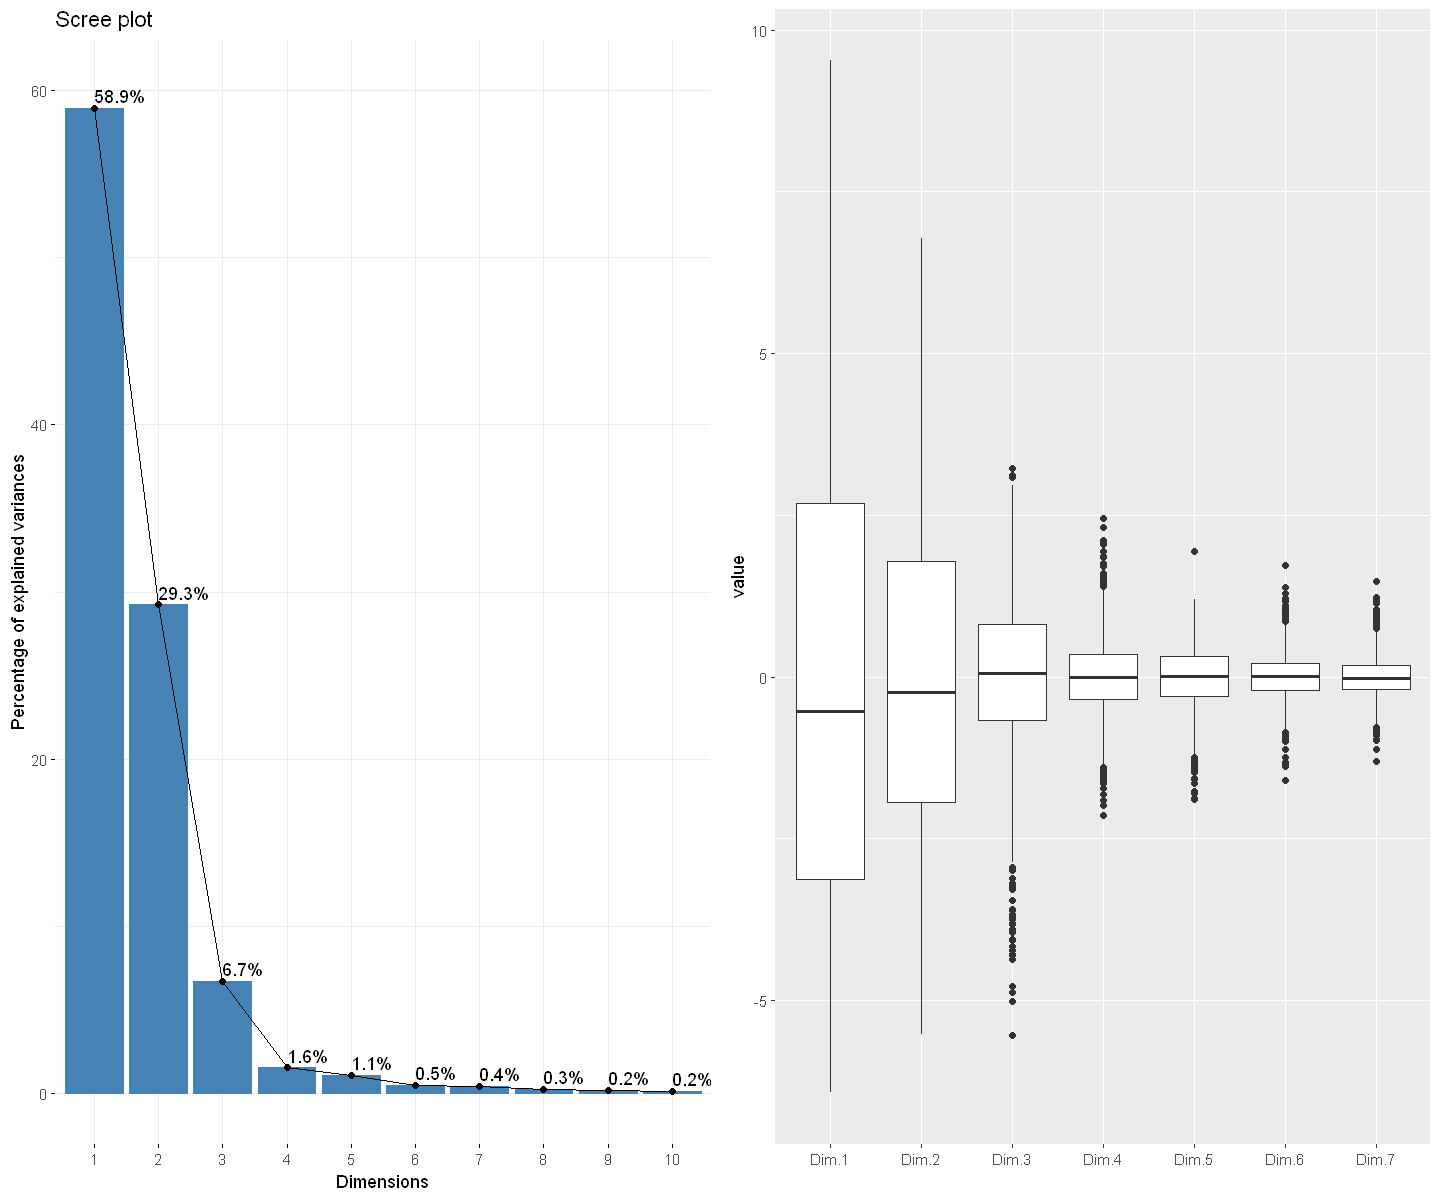

In [13]:
# ACP réduite
acp1 <- PCA(df1, scale.unit = TRUE,
           graph = FALSE, quali.sup = c(25,26,27), ncp = 7)
# Décroissance des valeurs propres
library(factoextra)
g1<-fviz_eig(acp1, addlabels = TRUE, ylim = c(0, 60))
library(reshape2)
g2<-ggplot(melt(acp1$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

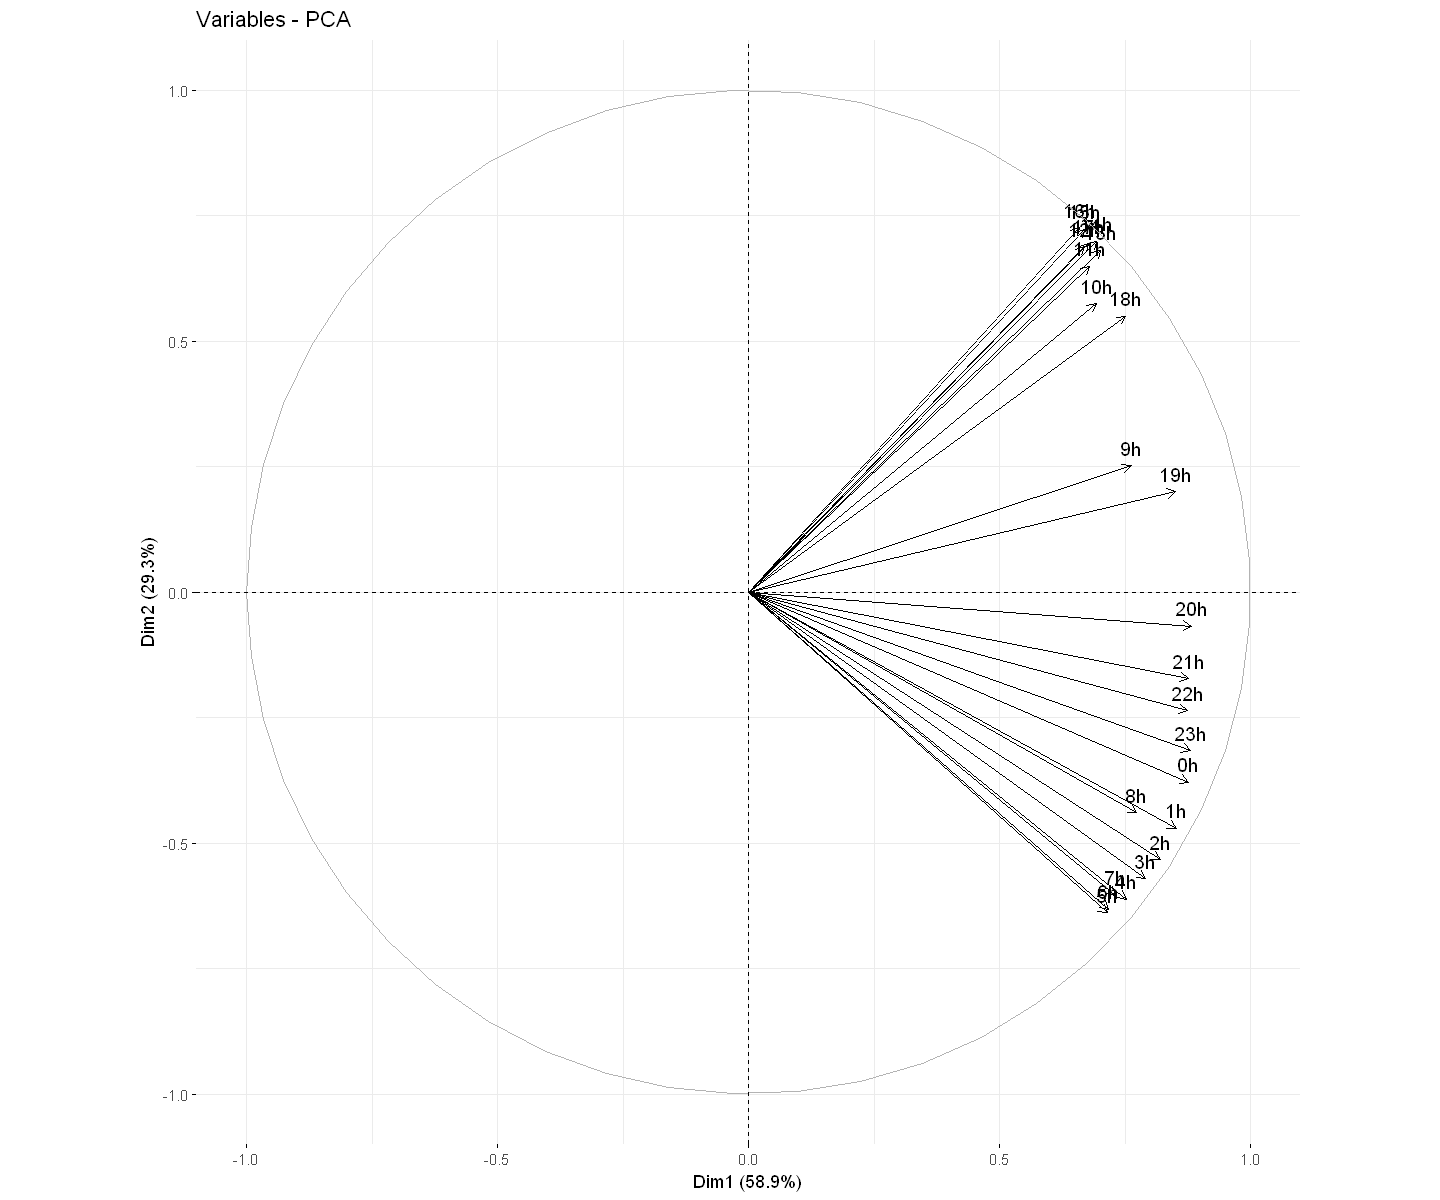

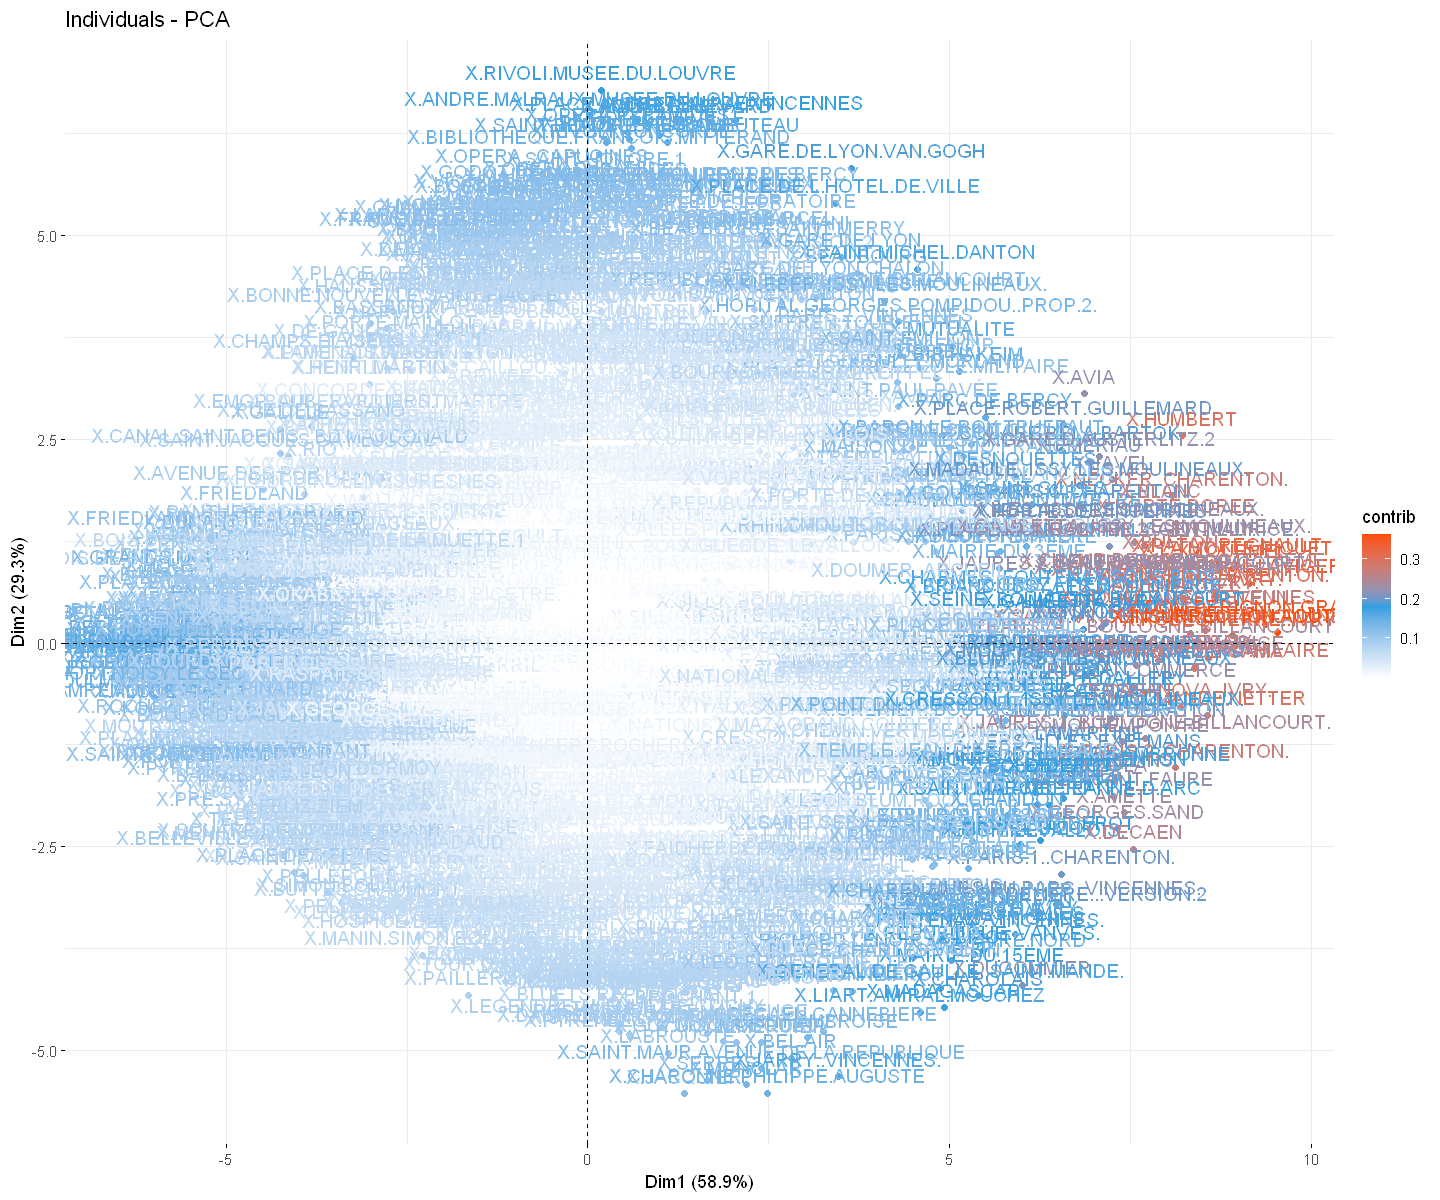

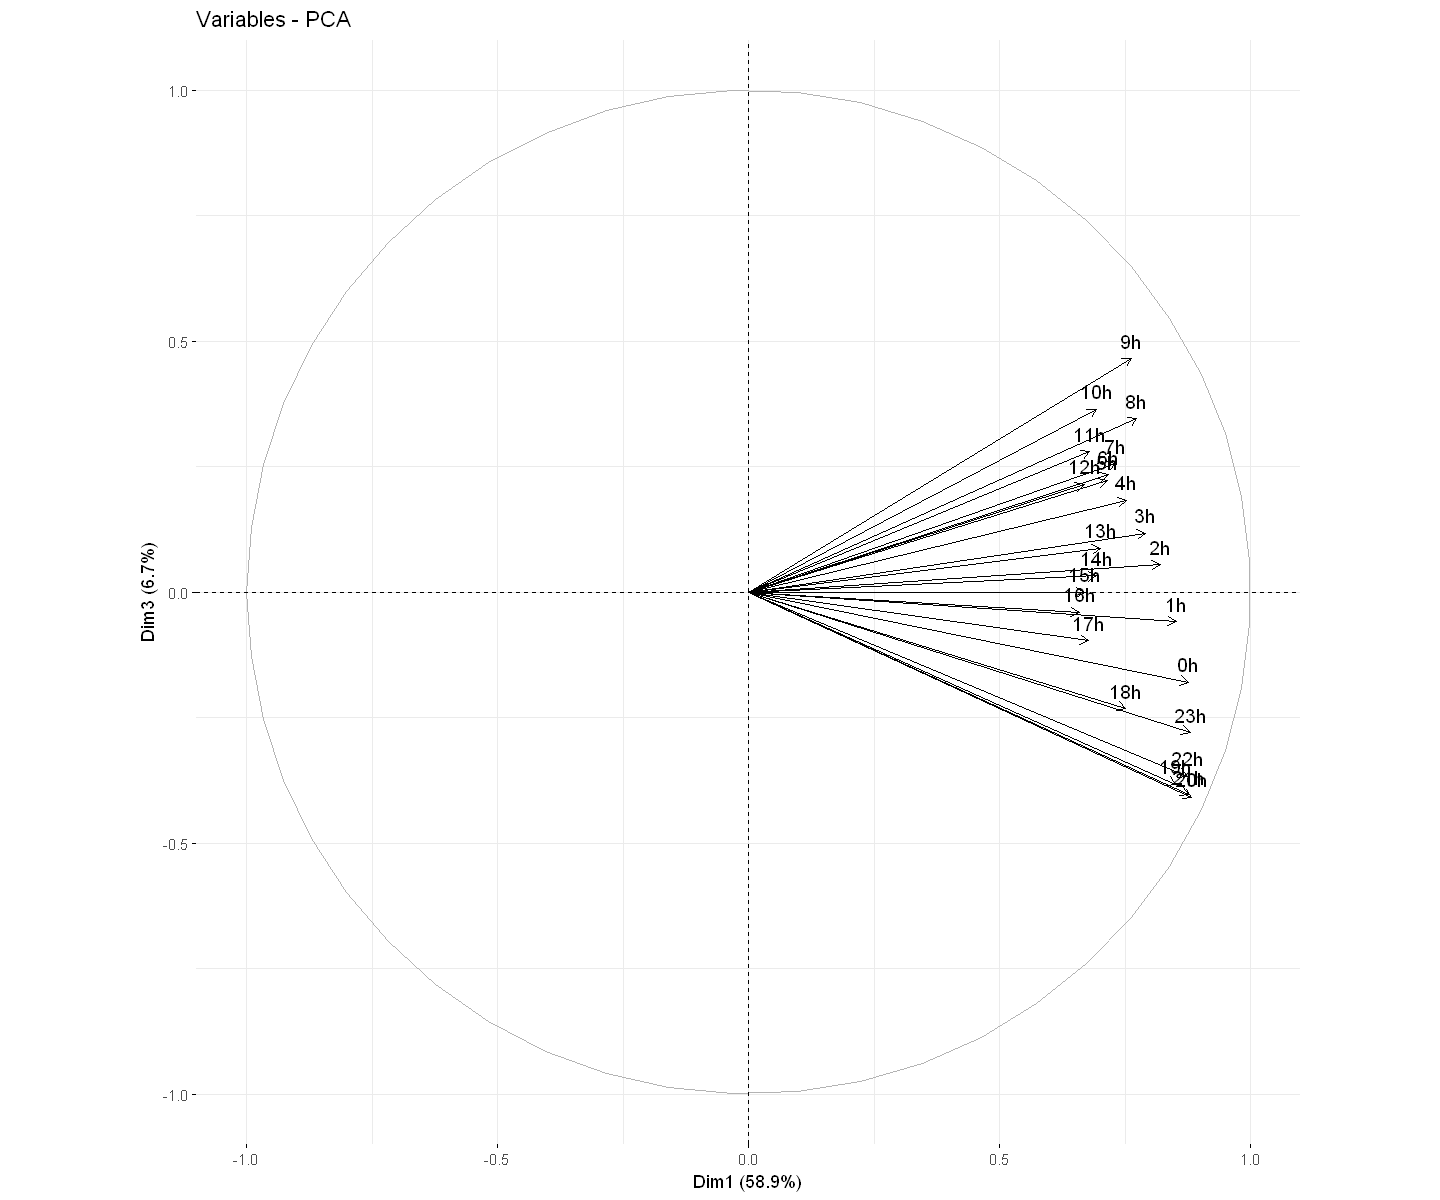

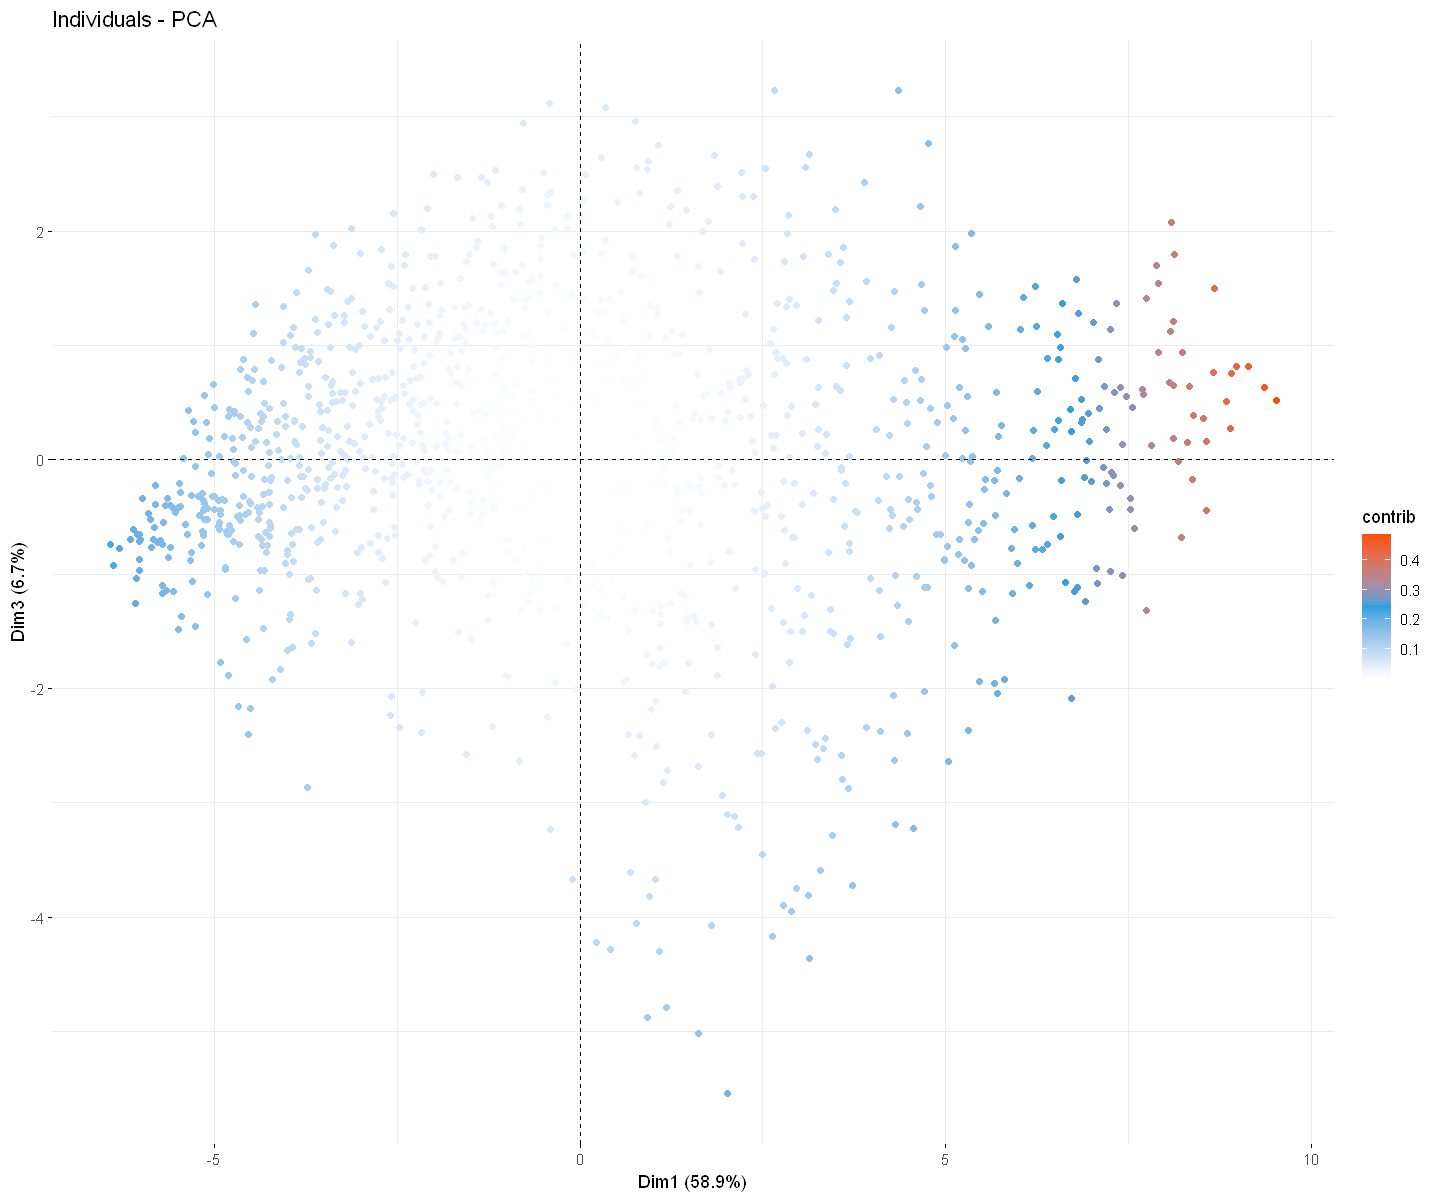

In [14]:
fviz_pca_var(acp1)
fviz_pca_ind(acp1,col.ind="contrib",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_var(acp1,axes=c(1,3))
fviz_pca_ind(acp1,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))

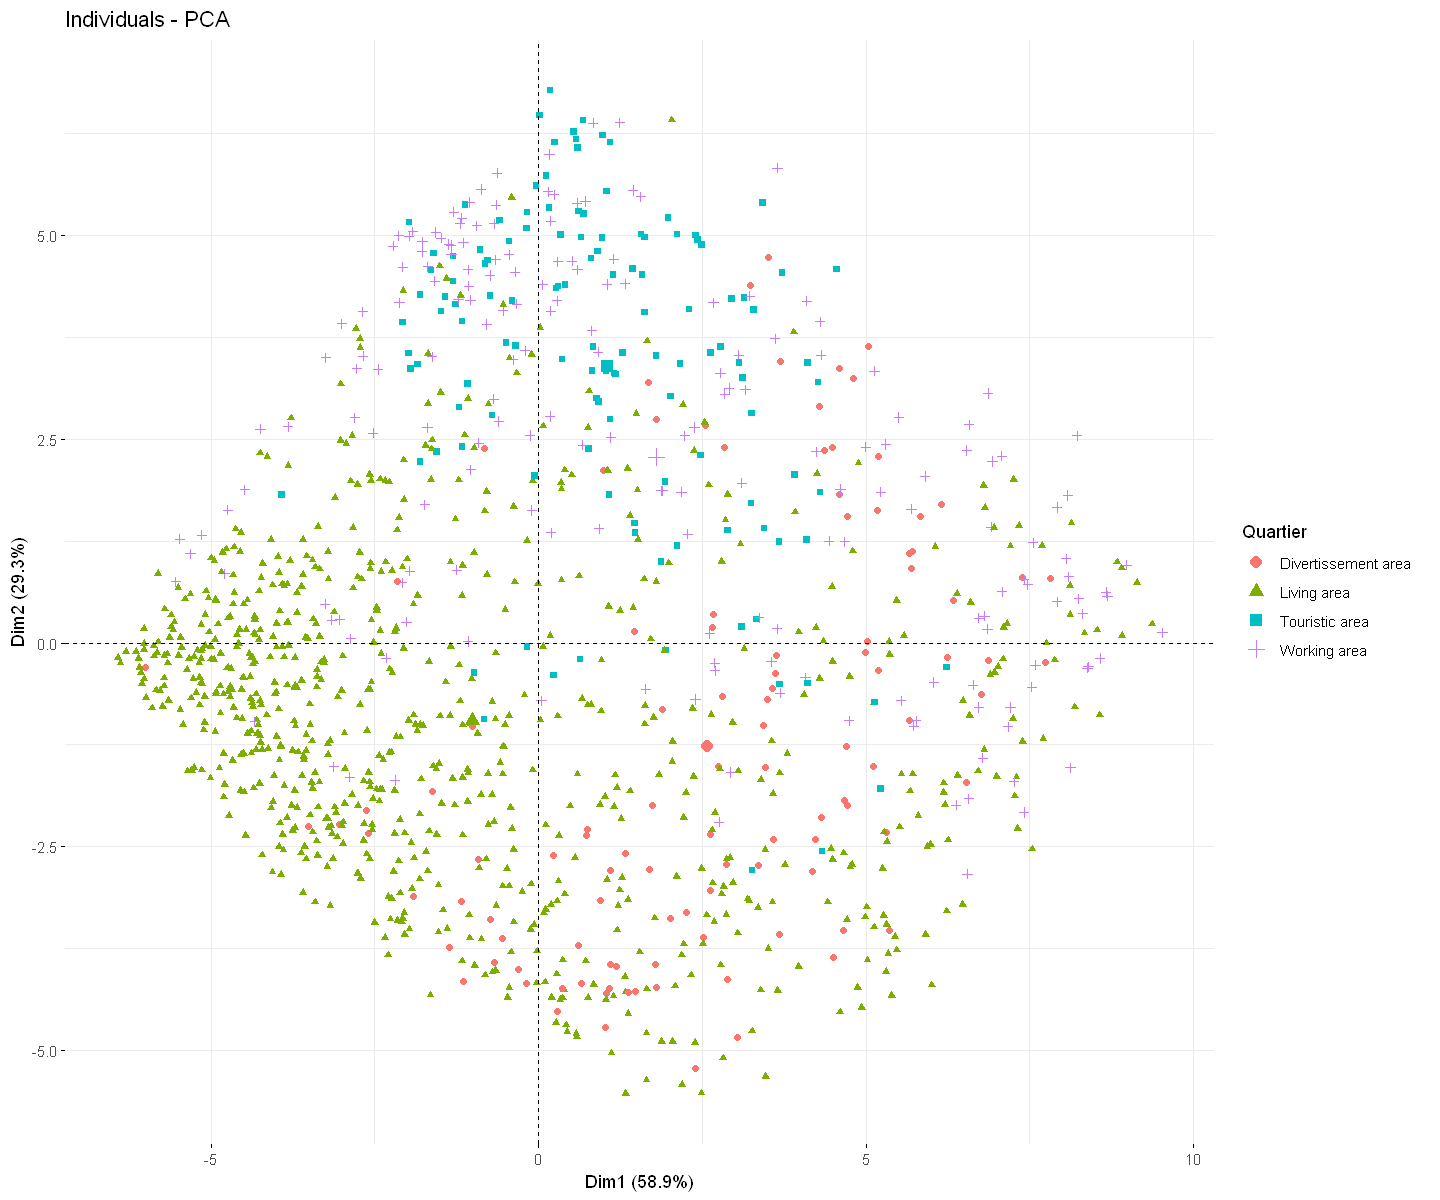

In [15]:
fviz_pca_ind(acp1, label="none", habillage=27)

In [16]:
### C1 : proportionnelle au taux de chargement quotidien  : le poids des heures est le même sur le chargement quotidient : effet 
### d'équilibrage entre les stations pleines la nuit et celles pleines le jour
### C2 : différence jour/nuit. Jour : entre 9h et 19h (inclus)
### difficile de dégager des classes vis à vis de la position de la station
### néanmoins, pleines la nuit = périphérie, pleines le jour = centre ville

In [17]:
lundi <- rowMeans(loading[,c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24)])
mardi <- rowMeans(loading[,c(25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48)])
mercredi <- rowMeans(loading[,c(49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72)])
jeudi <- rowMeans(loading[,c(73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96)])
vendredi <- rowMeans(loading[,c(97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120)])
samedi <- rowMeans(loading[,c(121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144)])
dimanche <- rowMeans(loading[,c(145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168)])

df2 <- data.frame(lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche)

colnames(df2) <- list("Lundi","Mardi","Mercredi","Jeudi","Vendredi","Samedi","Dimanche")
df2$Station <- velib$names
df2$Hill <- as.factor(coord$bonus)

df2$Quartier <- ifelse(between(coord$latitude, 48.8, 48.125) & between(coord$longitude, 2.3, 2.35), "Living area",
                  ifelse(between(coord$latitude, 48.8, 48.8125) & between(coord$longitude, 2.35, 2.4), "Living area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.2, 2.3), "Living area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.3, 2.35), "Living area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.35, 2.388), "Living area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.388, 2.415), "Working area",
                  ifelse(between(coord$latitude, 48.8125, 48.825) & between(coord$longitude, 2.415, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.2, 2.25), "Working area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.25, 2.29), "Working area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.29, 2.37), "Living area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.37, 2.39), "Working area",
                  ifelse(between(coord$latitude, 48.825, 48.8375) & between(coord$longitude, 2.39, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.8375, 48.8425) & between(coord$longitude, 2.2, 2.25), "Working area",
                  ifelse(between(coord$latitude, 48.8425, 48.85) & between(coord$longitude, 2.2, 2.25), "Living area",
                  ifelse(between(coord$latitude, 48.8375, 48.8455) & between(coord$longitude, 2.25, 2.28), "Working area",
                  ifelse(between(coord$latitude, 48.8375, 48.8455) & between(coord$longitude, 2.28, 2.35), "Living area",
                  ifelse(between(coord$latitude, 48.8375, 48.8455) & between(coord$longitude, 2.35, 2.385), "Working area",
                  ifelse(between(coord$latitude, 48.8375, 48.8455) & between(coord$longitude, 2.385, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.8455, 48.8625) & between(coord$longitude, 2.25, 2.28), "Living area",
                  ifelse(between(coord$latitude, 48.8455, 48.8625) & between(coord$longitude, 2.28, 2.3), "Working area",
                  ifelse(between(coord$latitude, 48.8485, 48.8675) & between(coord$longitude, 2.3, 2.36), "Touristic area",
                  ifelse(between(coord$latitude, 48.86, 48.8675) & between(coord$longitude, 2.36, 2.37), "Divertissement area",
                  ifelse(between(coord$latitude, 48.86, 48.8625) & between(coord$longitude, 2.37, 2.39), "Divertissement area",
                  ifelse(between(coord$latitude, 48.8455, 48.86) & between(coord$longitude, 2.35, 2.385), "Divertissement area",
                  ifelse(between(coord$latitude, 48.8455, 48.8625) & between(coord$longitude, 2.385, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.8625, 48.875) & between(coord$longitude, 2.2, 2.29), "Living area",
                  ifelse(between(coord$latitude, 48.8625, 48.875) & between(coord$longitude, 2.29, 2.35), "Working area",
                  ifelse(between(coord$latitude, 48.8625, 48.875) & between(coord$longitude, 2.35, 2.385), "Divertissement area",
                  ifelse(between(coord$latitude, 48.8625, 48.875) & between(coord$longitude, 2.385, 2.5), "Living area",
                  ifelse(between(coord$latitude, 48.875, 48.88) & between(coord$longitude, 2.2, 2.3), "Living area",
                  ifelse(between(coord$latitude, 48.875, 48.88) & between(coord$longitude, 2.34, 2.35), "Divertissement area",
                  ifelse(between(coord$latitude, 48.88, 48.89) & between(coord$longitude, 2.25, 2.27), "Working area",
                  ifelse(between(coord$latitude, 48.898, 48.9) & between(coord$longitude, 2.27, 2.29), "Working area",
                  ifelse(between(coord$latitude, 48.875, 48.885) & between(coord$longitude, 2.3, 2.34), "Living area",
                  ifelse(between(coord$latitude, 48.88, 48.885) & between(coord$longitude, 2.34, 2.35), "Living area",
                  ifelse(between(coord$latitude, 48.875, 48.885) & between(coord$longitude, 2.35, 2.5), "Living area",    
                  ifelse(between(coord$latitude, 48.885, 49) & between(coord$longitude, 2.29, 2.32), "Living area","Living area")))))))))))))))))))))))))))))))))))))
df2[,-c(8,9,10)] = scale(df2[,-c(8,9,10)], scale=T, center=T)
df2$Quartier <- as.factor(df2$Quartier)
df2$Station <- as.factor(df2$Station)

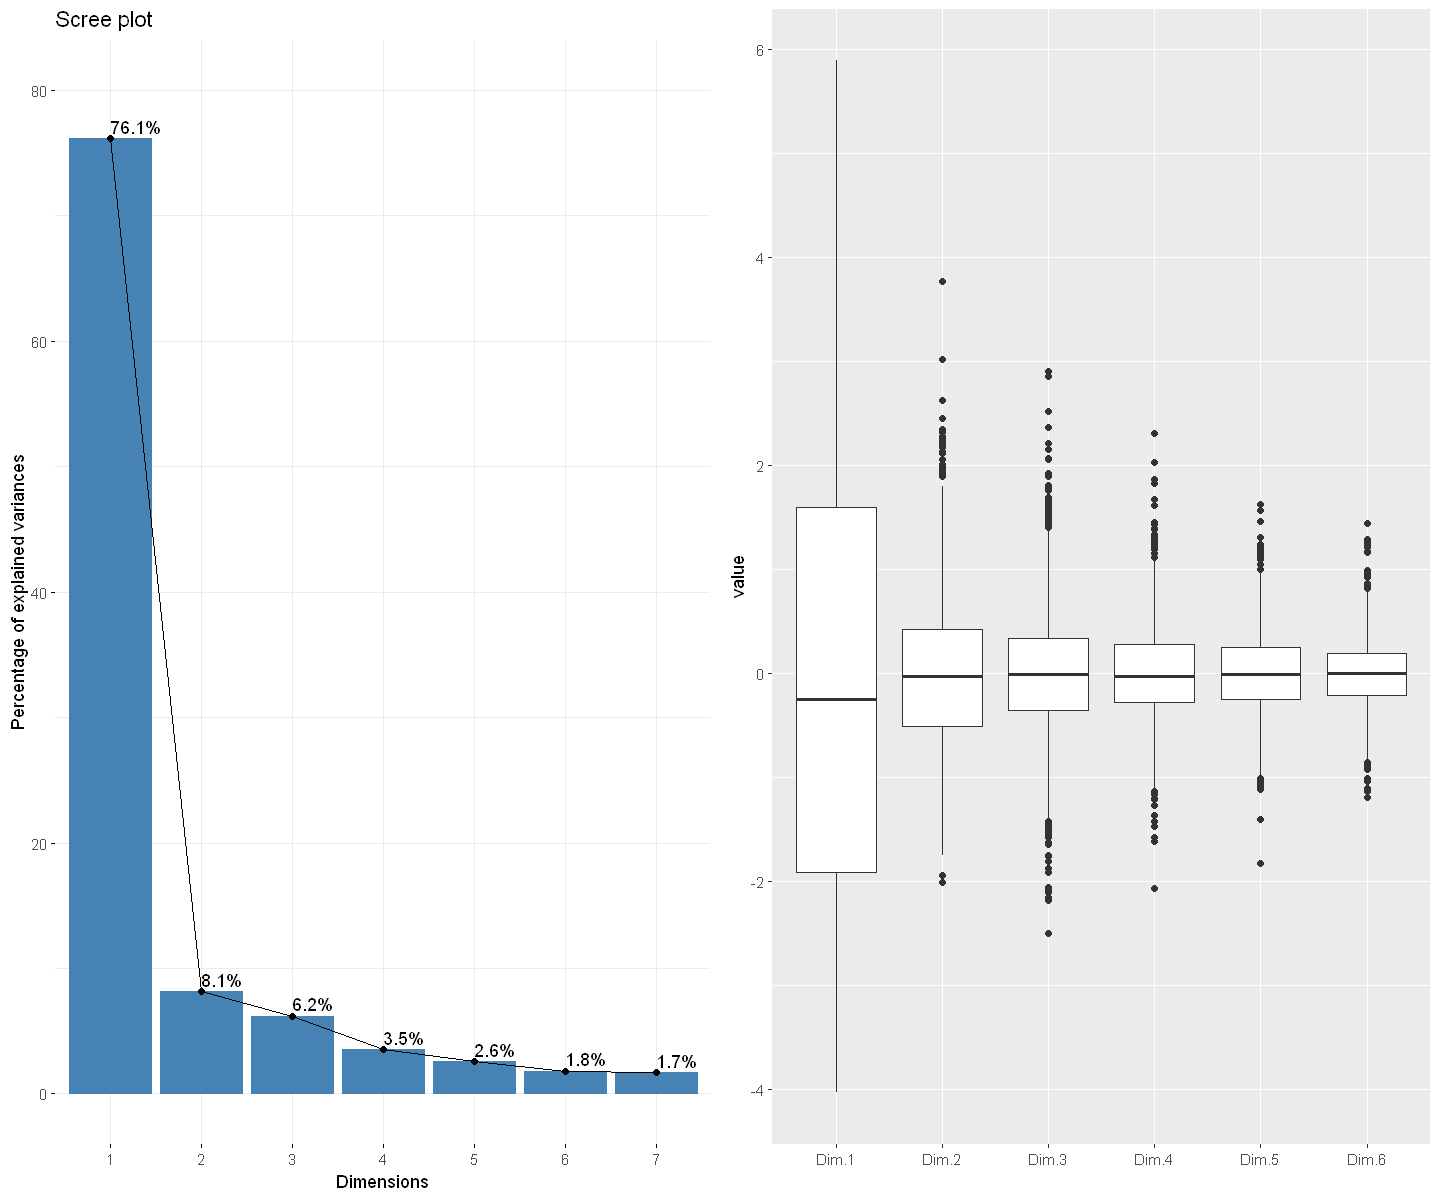

In [18]:
# ACP réduite
acp2 <- PCA(df2, scale.unit = TRUE,
           graph = FALSE, quali.sup = c(8,9,10), ncp = 6)
# Décroissance des valeurs propres
library(factoextra)
g1<-fviz_eig(acp2, addlabels = TRUE, ylim = c(0, 80))
library(reshape2)
g2<-ggplot(melt(acp2$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

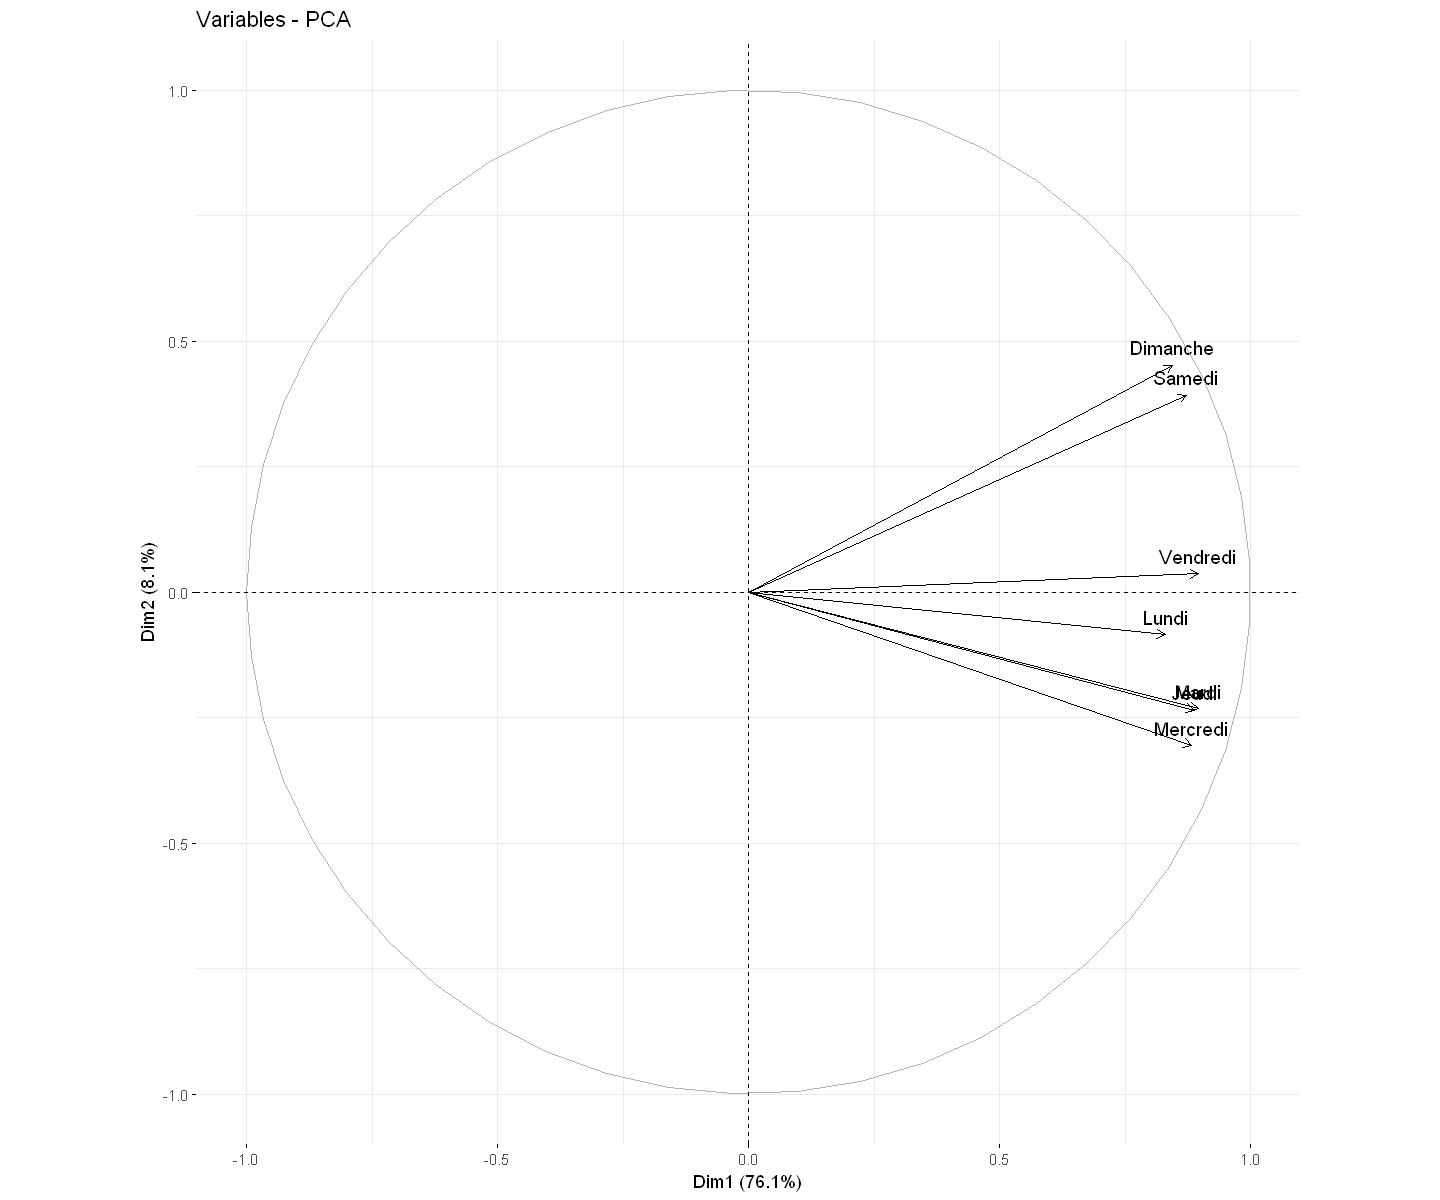

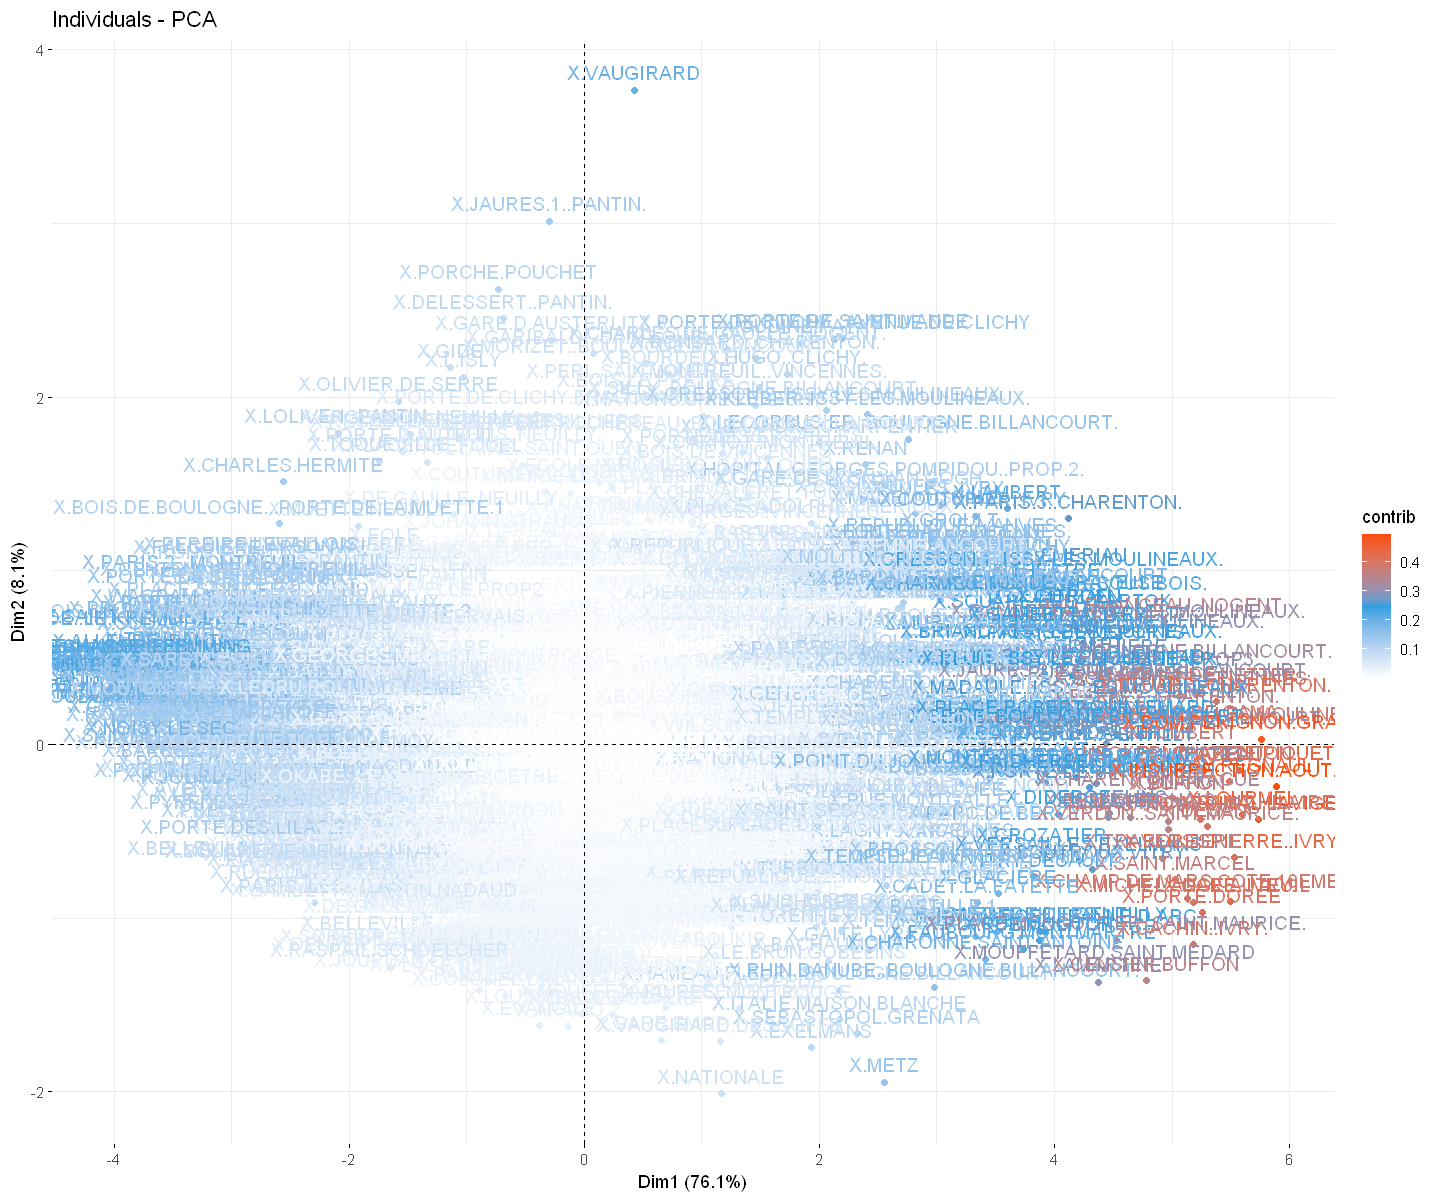

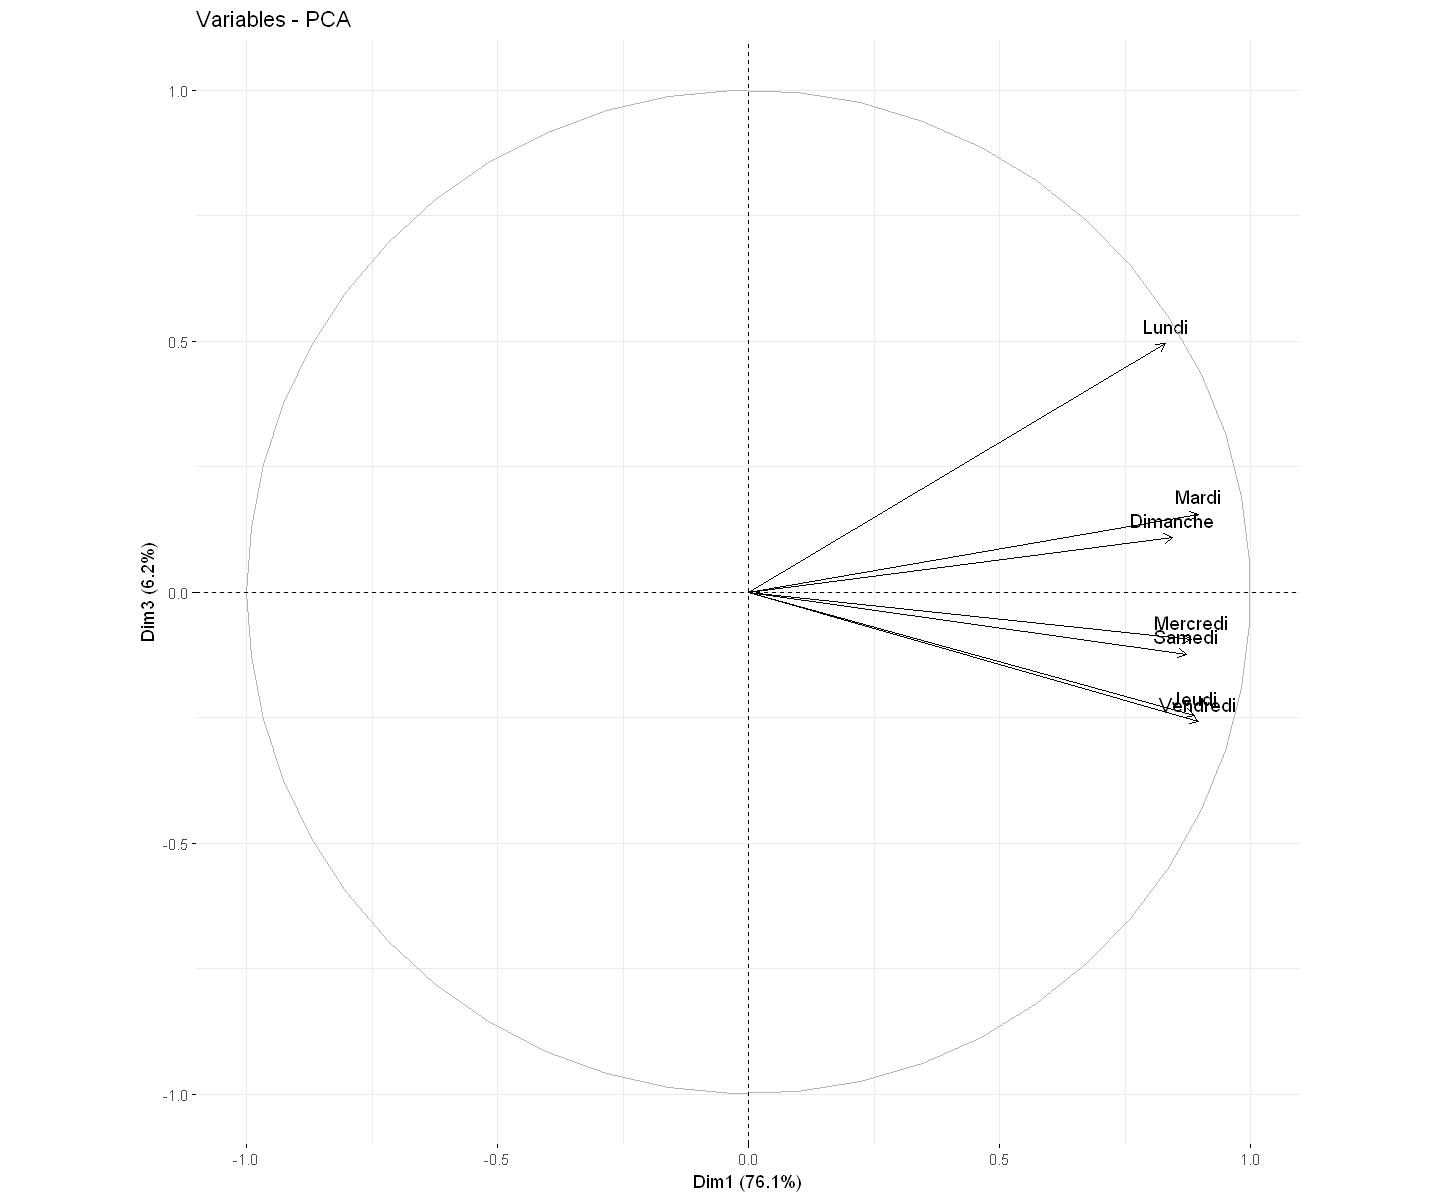

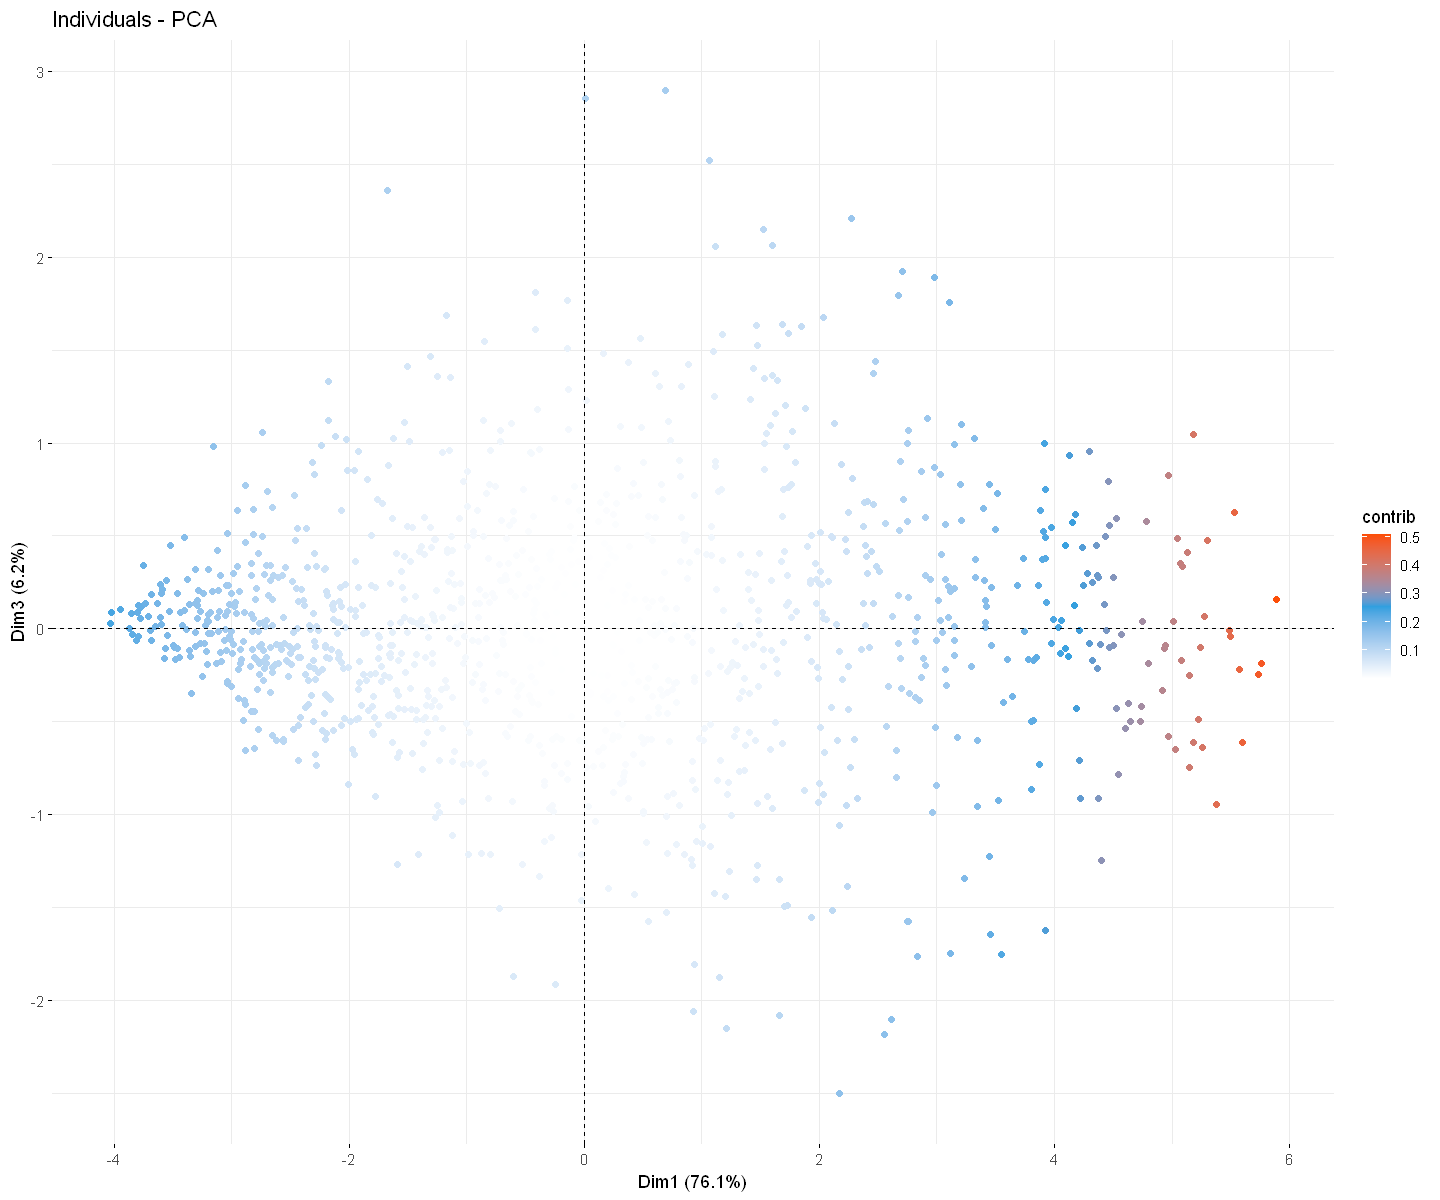

In [19]:
fviz_pca_var(acp2)
fviz_pca_ind(acp2,col.ind="contrib",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_var(acp2,axes=c(1,3))
fviz_pca_ind(acp2,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))

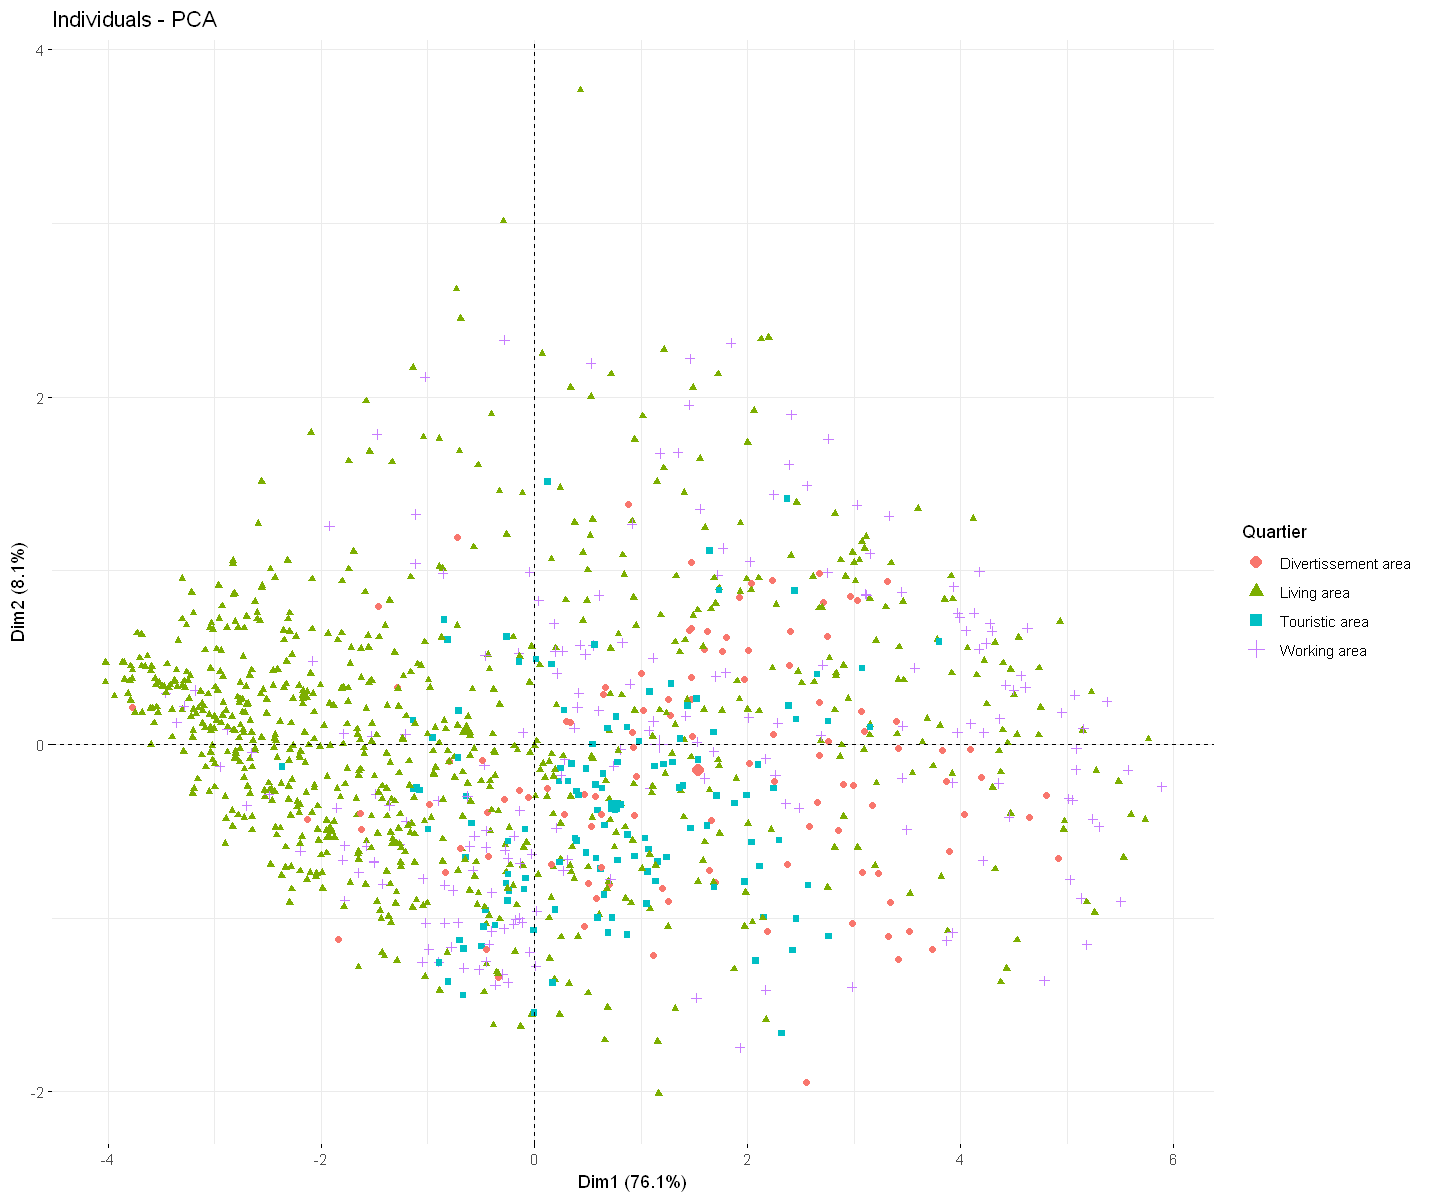

In [20]:
fviz_pca_ind(acp2, label="none", habillage=10)

In [89]:
### C1 : proportionnelle au taux de chargement hebdomadaire : le poids des jours est le même sur le chargement hebdomadaire : effet
### d'équilibrage entre les stations pleines en semaine et celles pleines le week_end.
### C2 : différence semaine/week-end : (vendredi)/samedi/dimanche vs lundi/mardi/mercredi/jeudi/(vendredi)
### difficile de dégager lien entre week-end/semaine et position
### néanmoins, pleines en semaine : centre ville, pleines le week-end : périphérie

In [41]:
library(cluster)

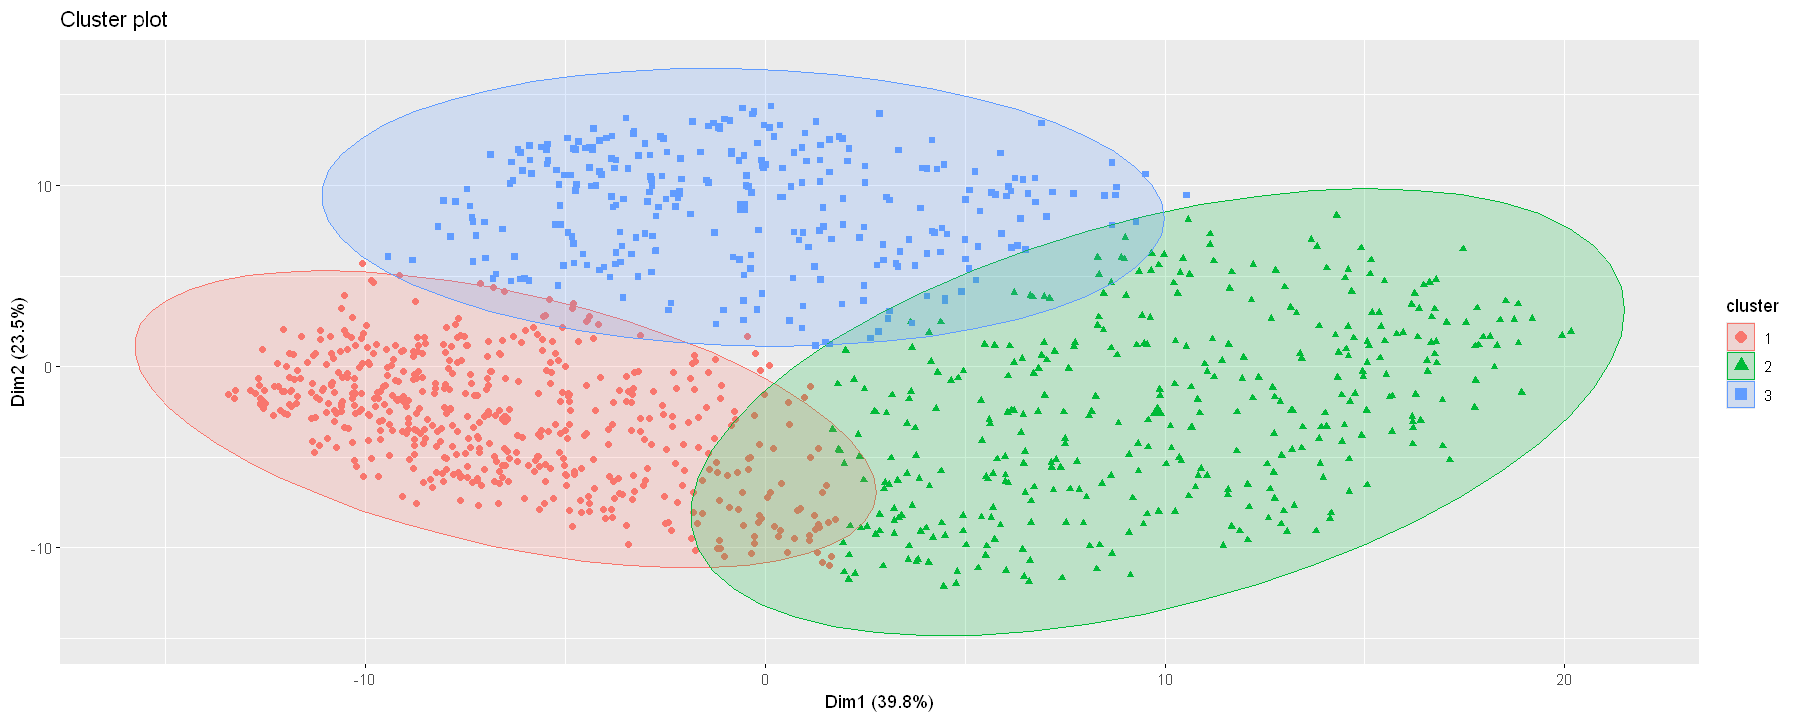

In [42]:
reskmeans = kmeans(loading[,-c(169,170)], centers=3) 

fviz_cluster(reskmeans, data=loading[,-c(169,170)], ellipse.type="norm", labelsize=8, geom=c("point"))

                     
                        1   2   3
  Divertissement area  21  76  13
  Living area         485 206  70
  Touristic area        5  19 101
  Working area         24  69 100


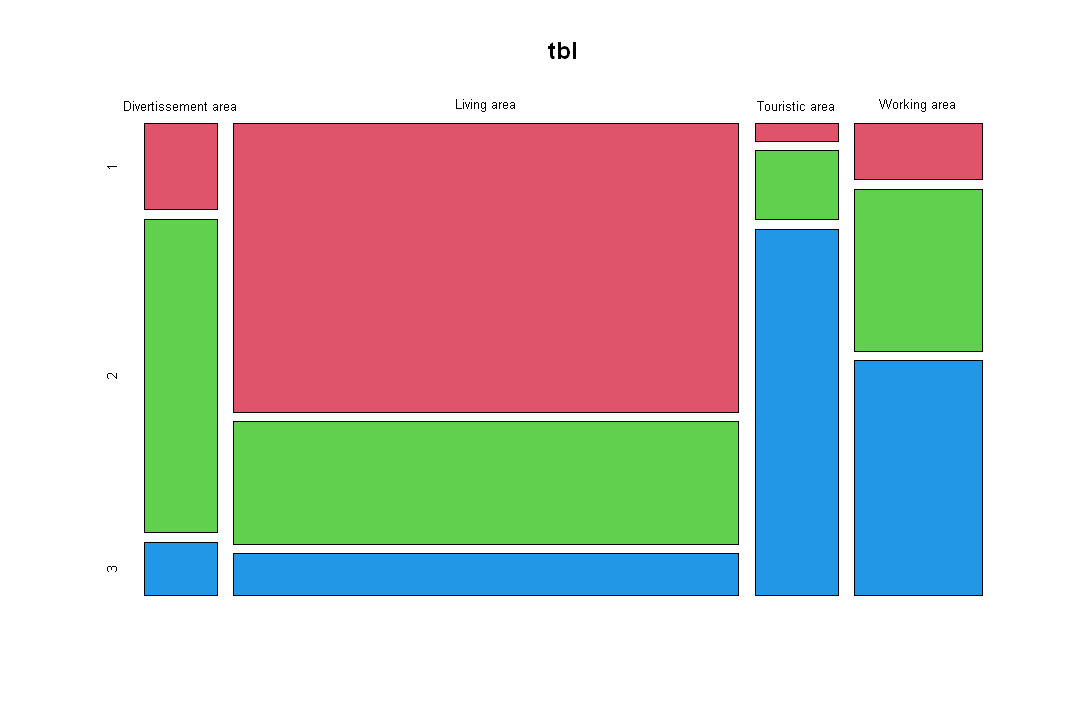

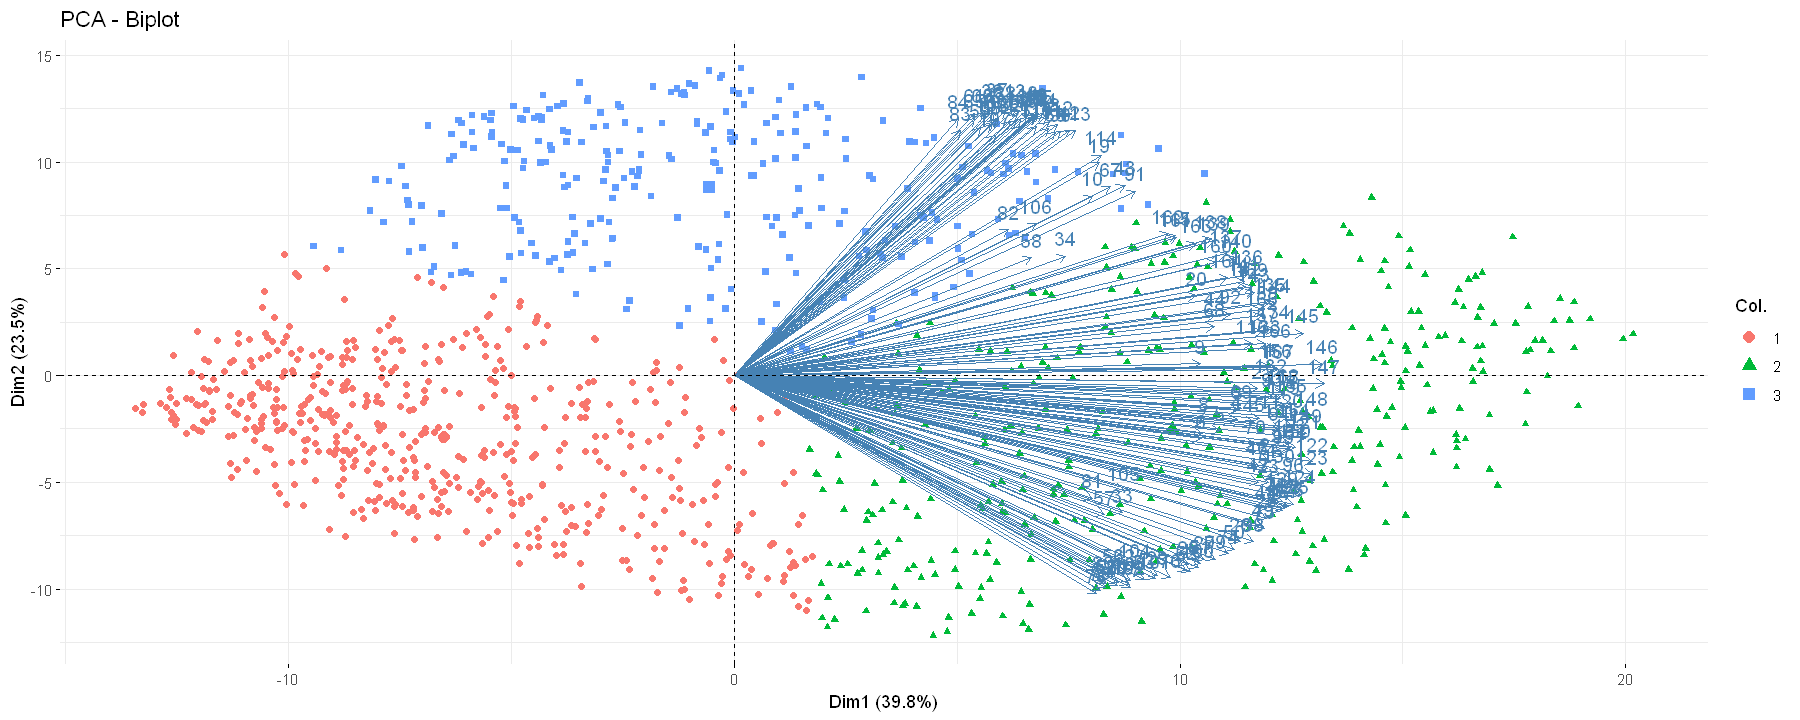

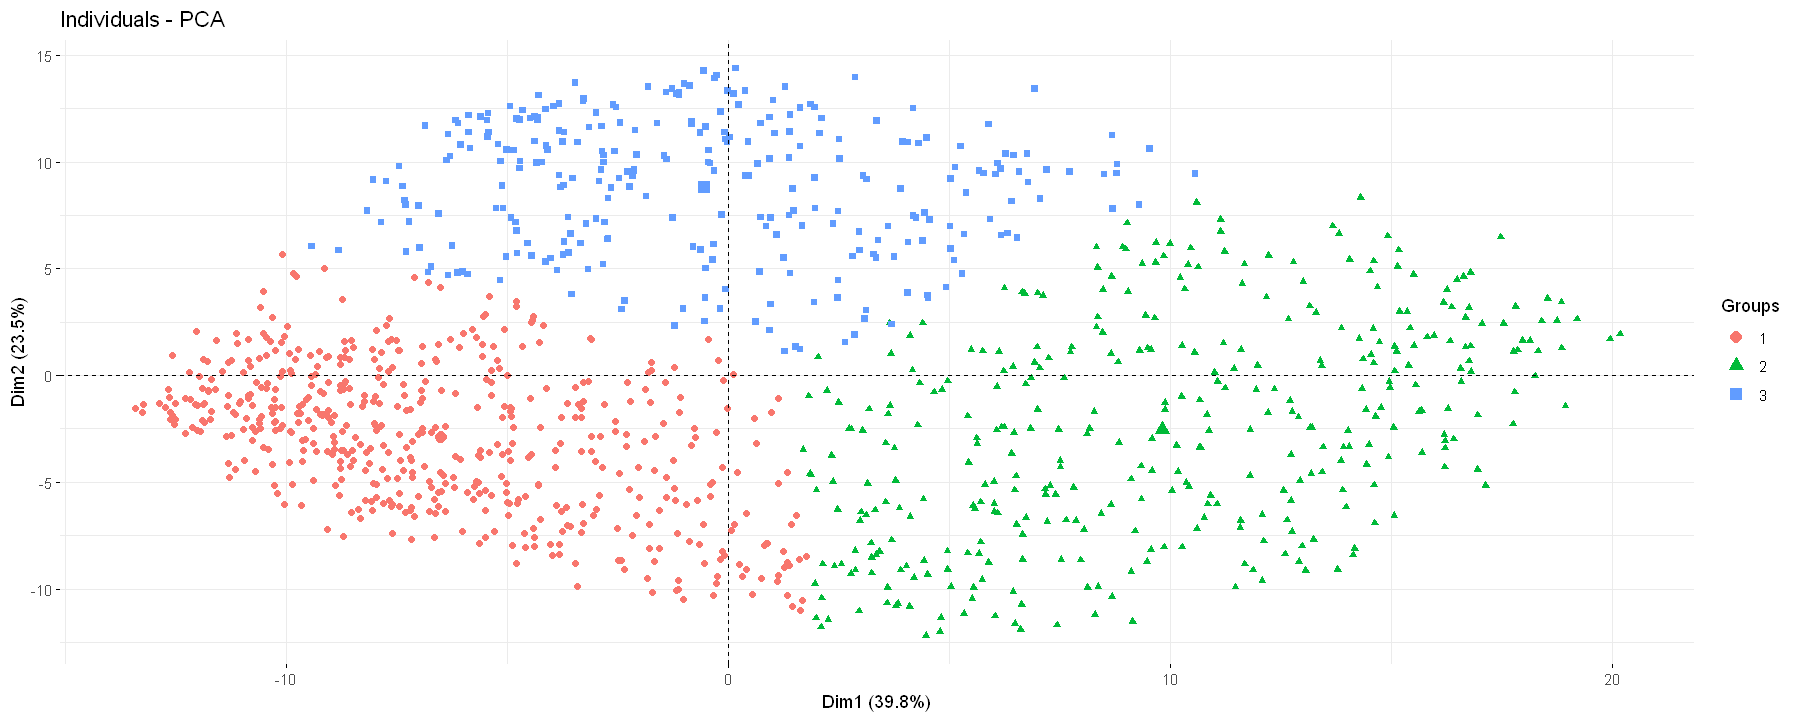

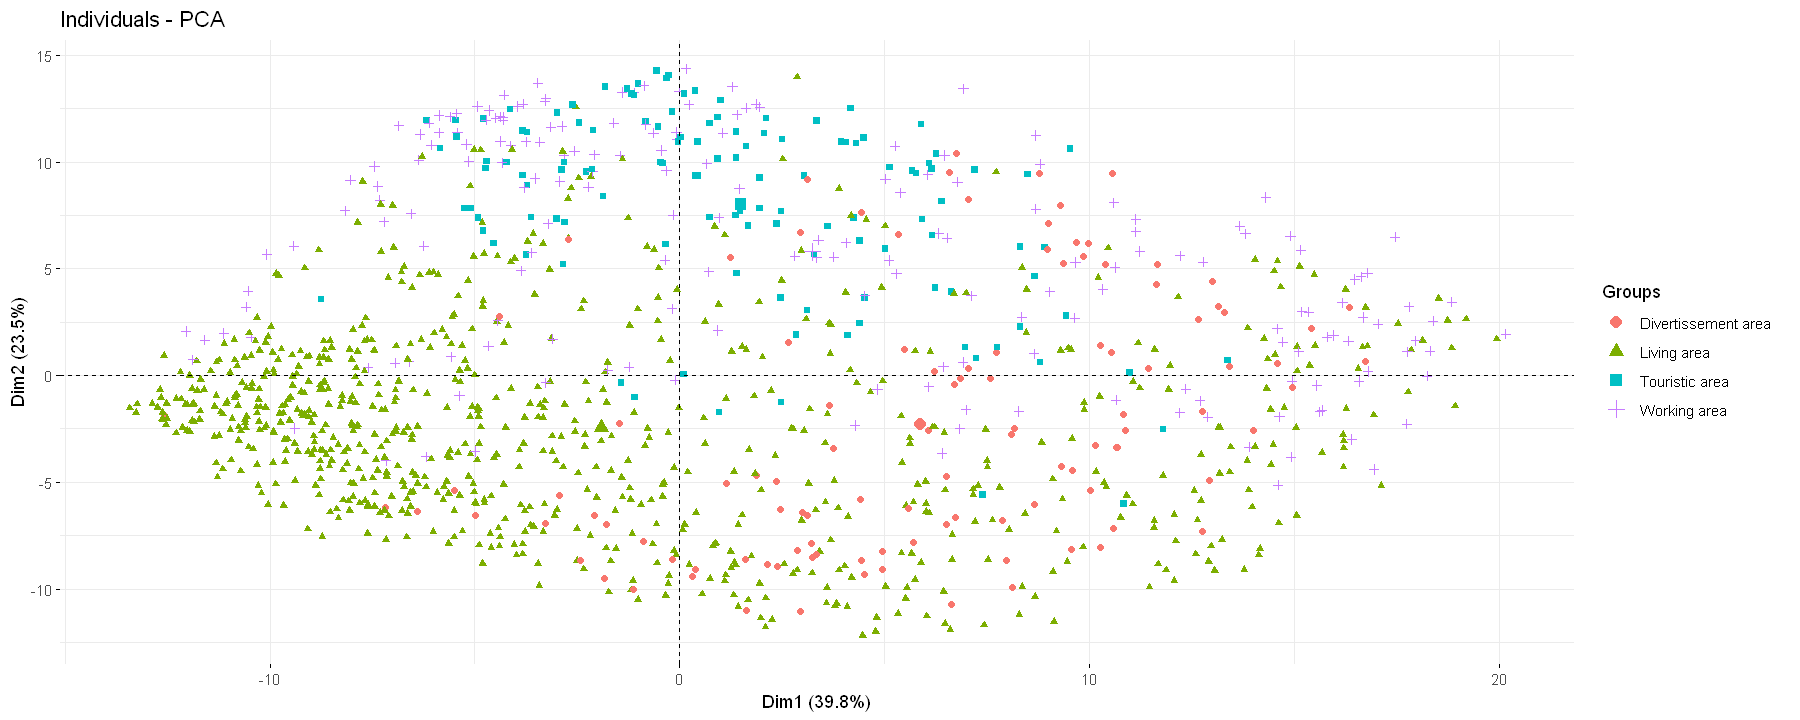

In [43]:
tbl = table(loading$Quartier, reskmeans$cluster)
print(tbl)

options(repr.plot.width = 9, repr.plot.height = 6)
mosaicplot(tbl, color=c(2:5))

# --- #
options(repr.plot.width = 15, repr.plot.height = 6)


fviz_pca(acp, axes=c(1,2), geom = c("point"), col.ind=as.factor(reskmeans$cluster))
fviz_pca_ind(acp, axes=c(1,2), geom=c("point"), habillage=as.factor(reskmeans$cluster))
fviz_pca_ind(acp, axes=c(1,2), geom=c("point"), habillage=loading$Quartier)

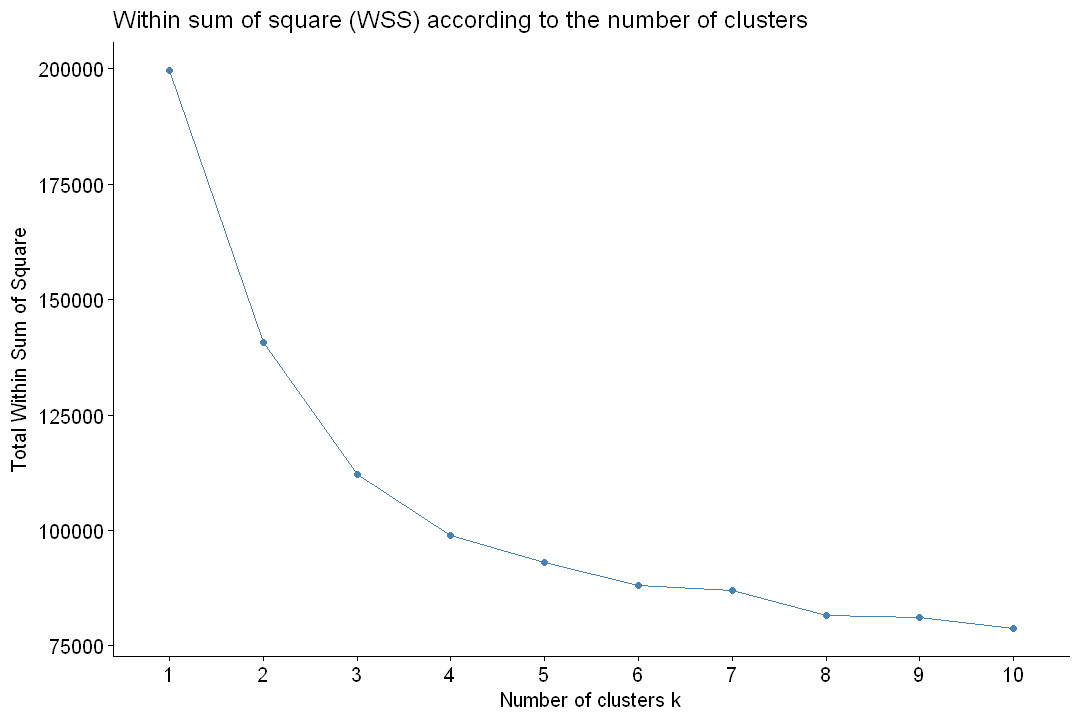

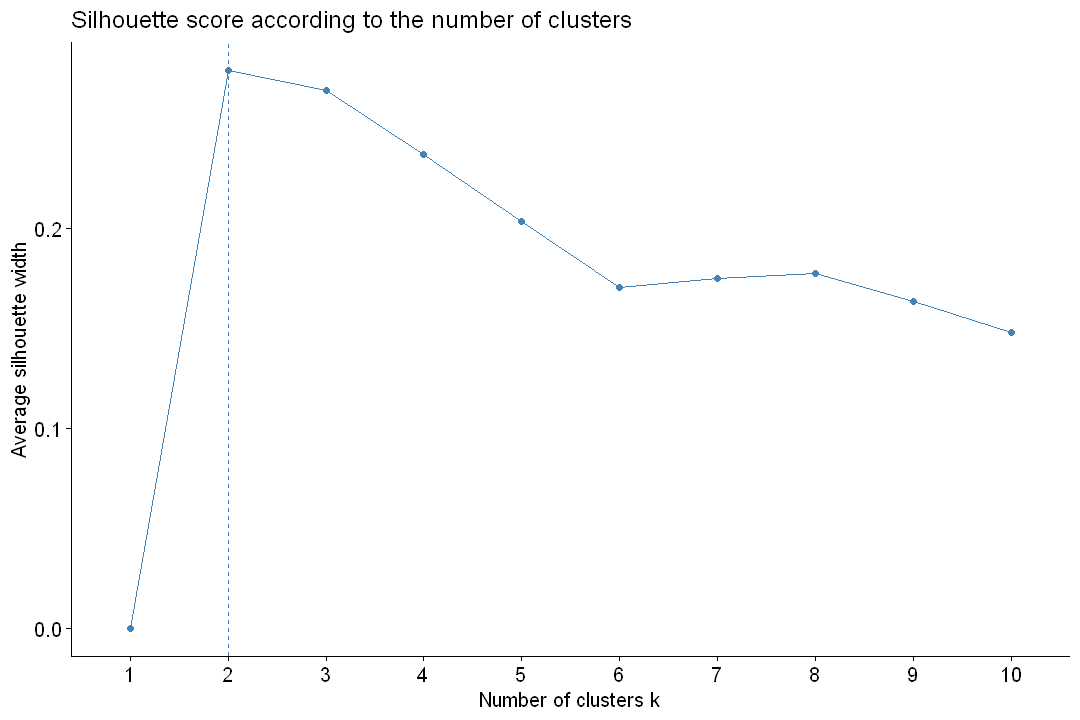

In [44]:

options(repr.plot.width = 9, repr.plot.height = 6)

fviz_nbclust(loading[,-c(169,170)], FUNcluster=kmeans, method="wss") +
    ggtitle("Within sum of square (WSS) according to the number of clusters")

fviz_nbclust(loading[,-c(169,170)], FUNcluster=kmeans, method="silhouette") +
    ggtitle("Silhouette score according to the number of clusters")

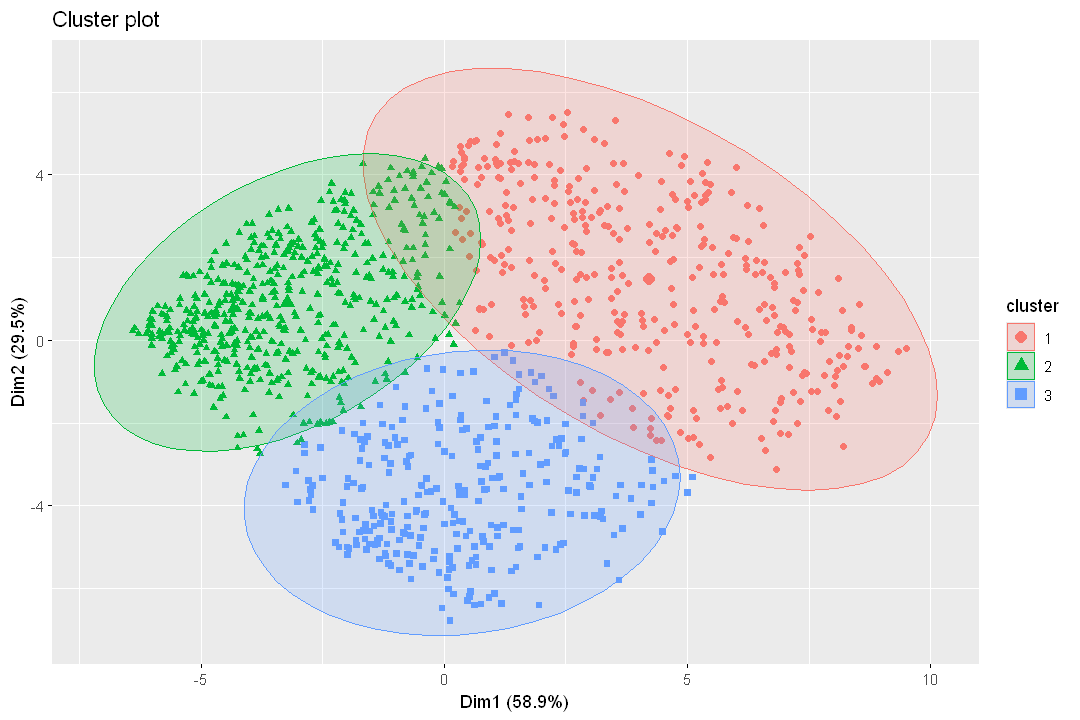

In [24]:
reskmeans = kmeans(df1[,-c(25,26,27)], centers=3) 

fviz_cluster(reskmeans, data=df1[,-c(25,26,27)], ellipse.type="norm", labelsize=8, geom=c("point"))

                     
                        1   2   3
  Divertissement area  79  18  13
  Living area         213 481  67
  Touristic area       18   5 102
  Working area         68  25 100


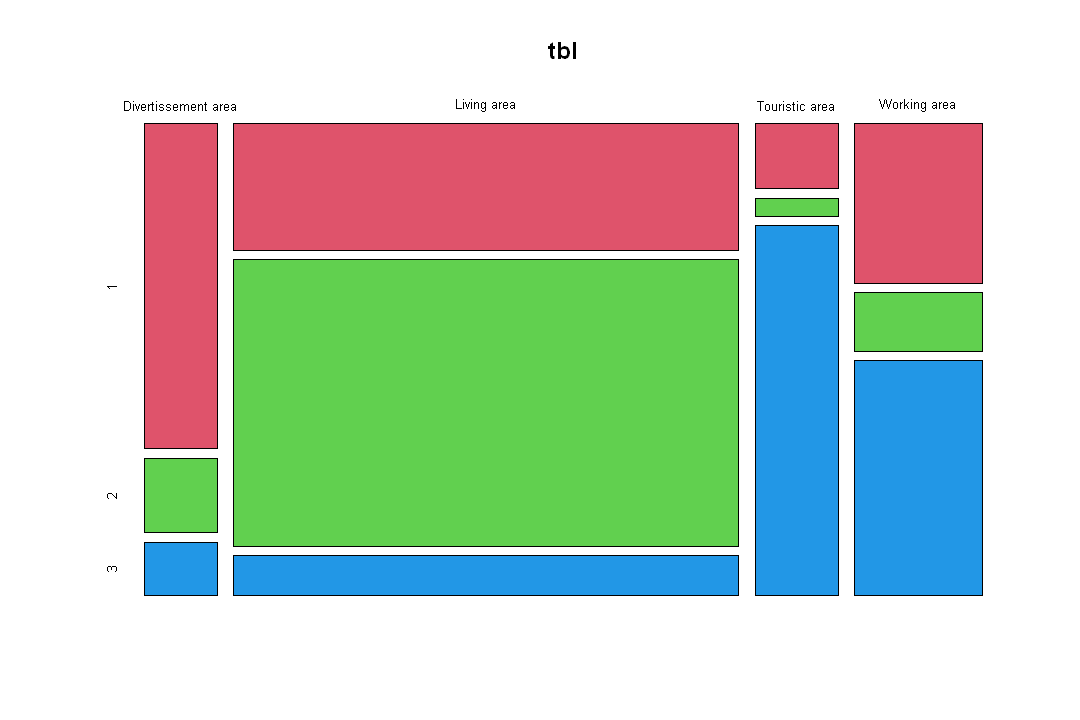

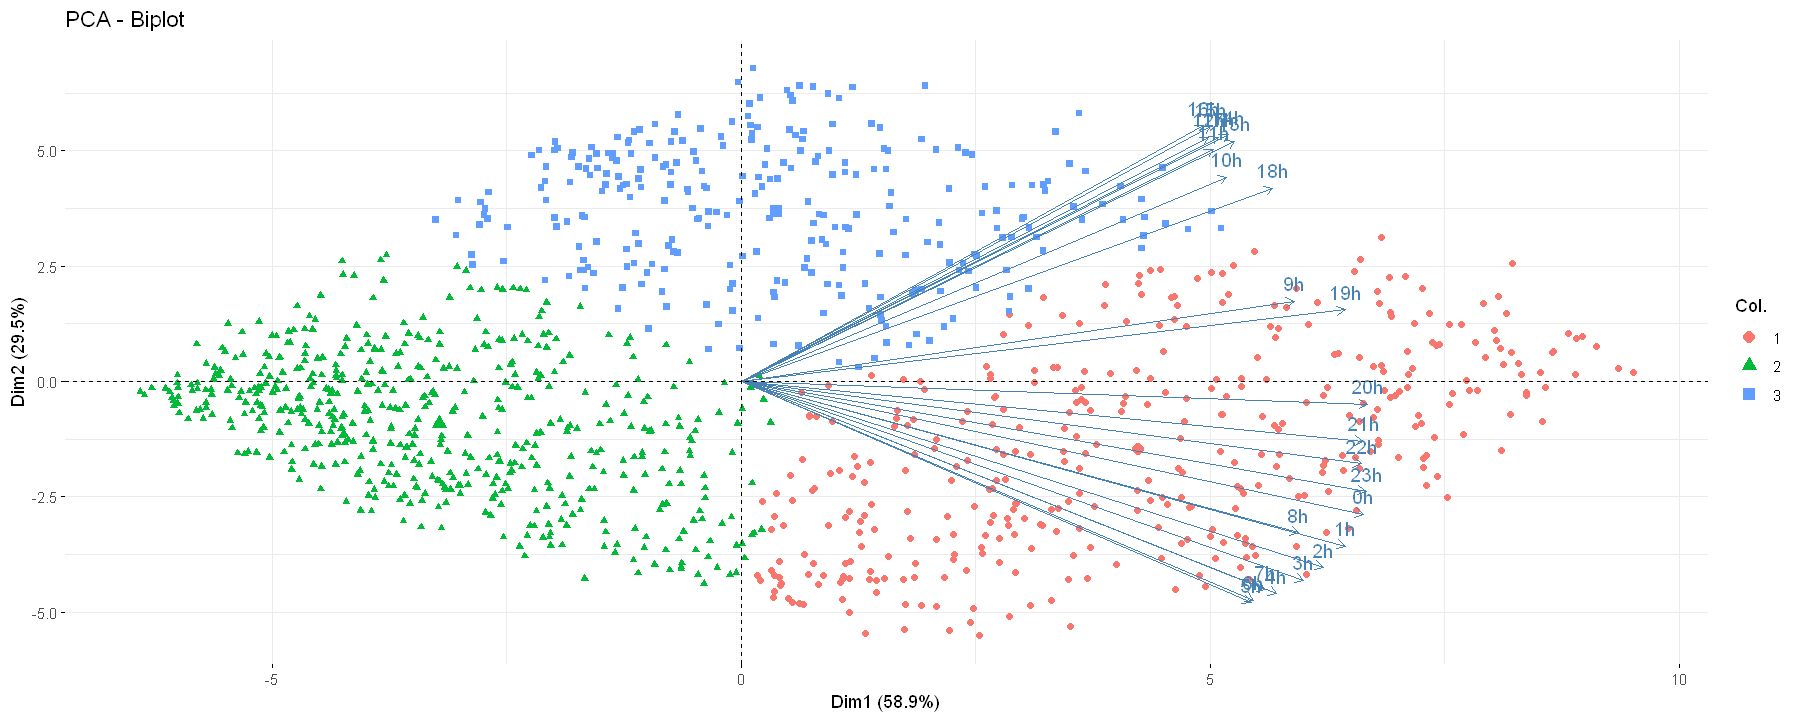

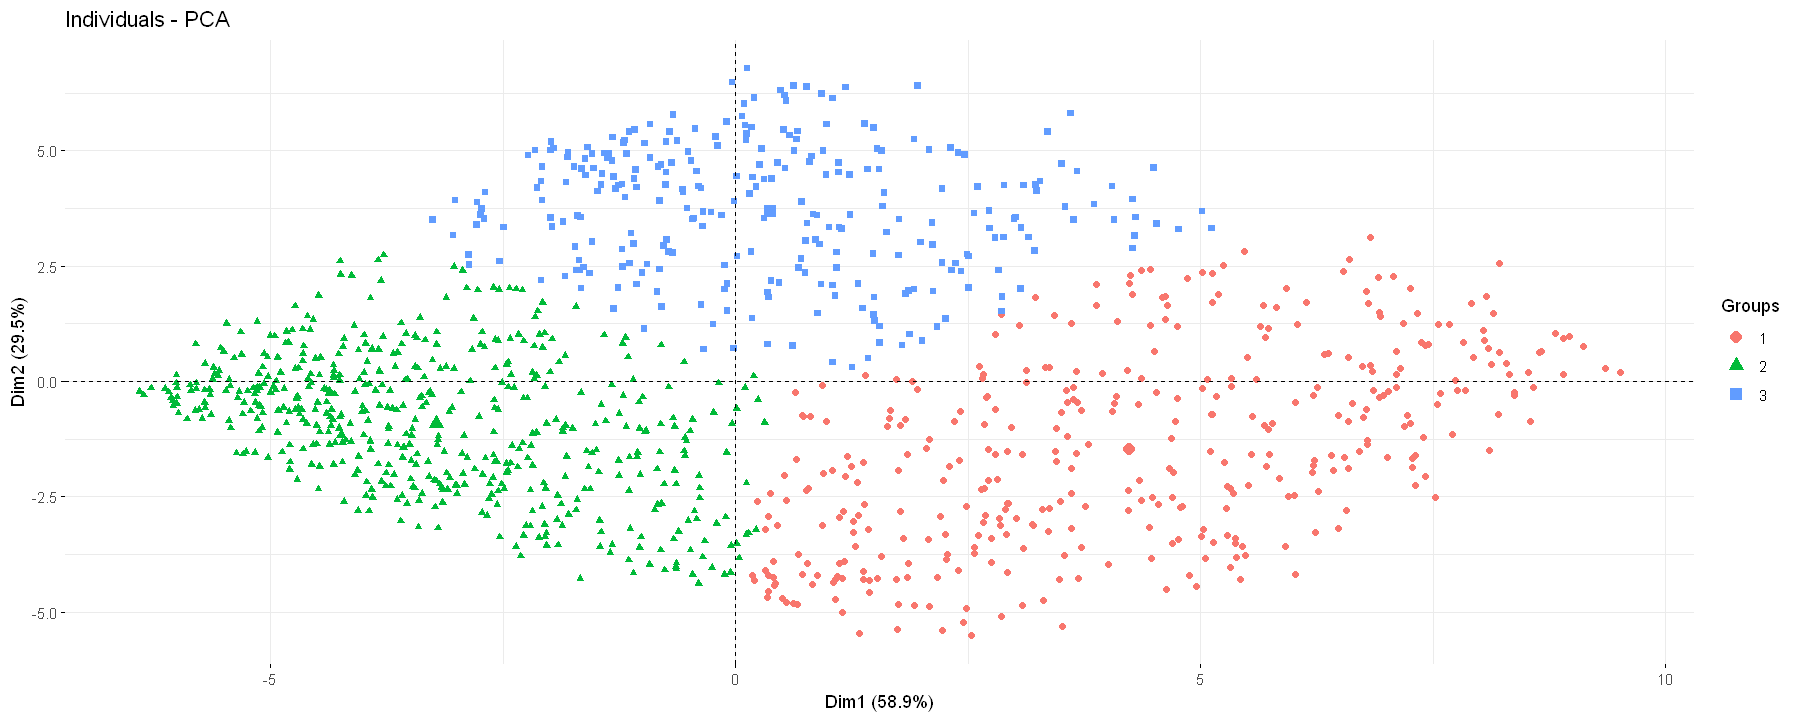

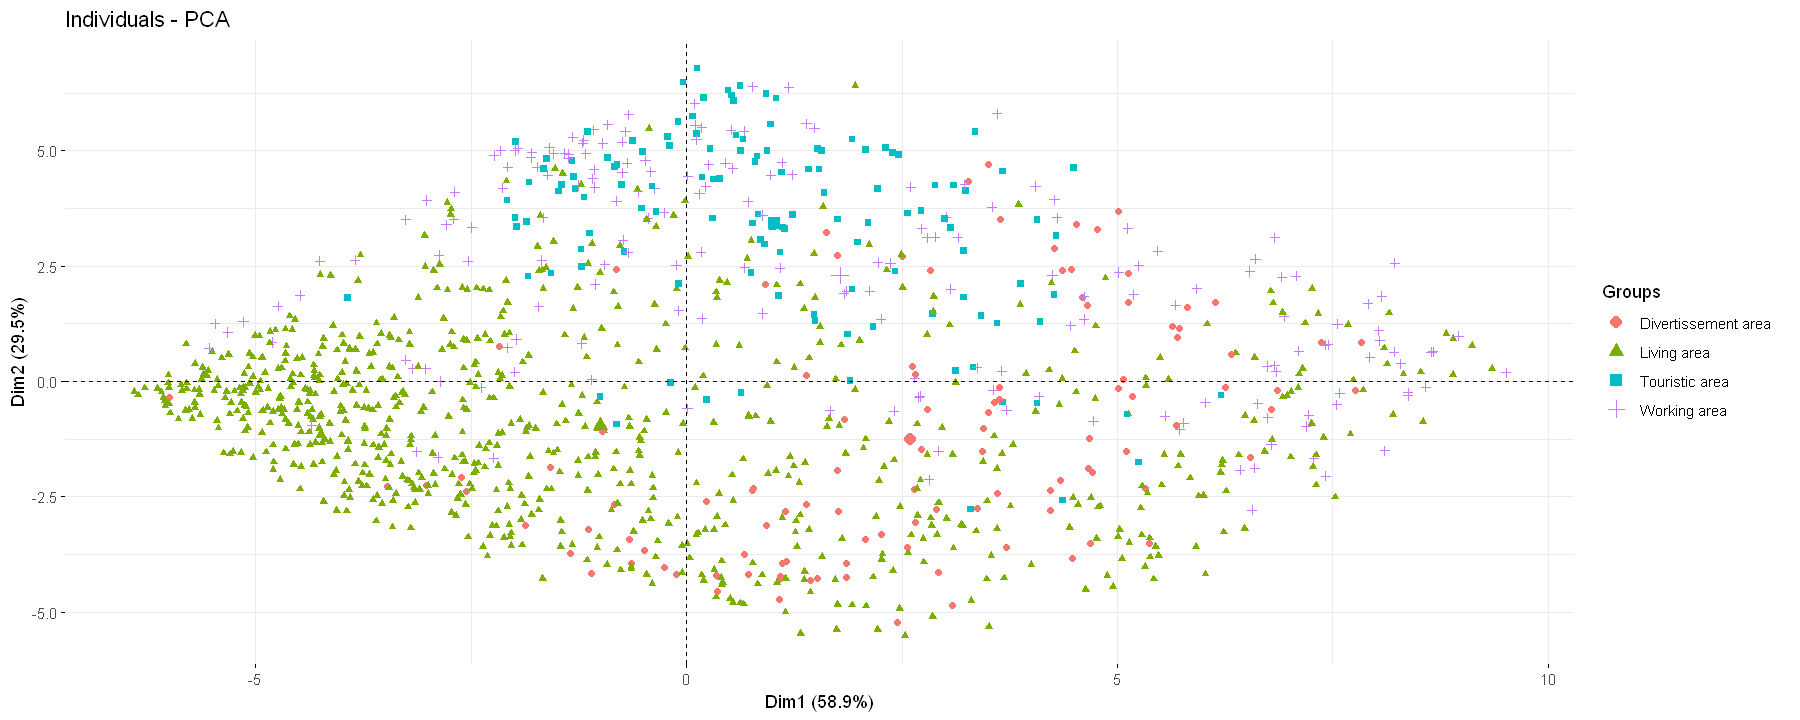

In [25]:
tbl = table(df1$Quartier, reskmeans$cluster)
print(tbl)

options(repr.plot.width = 9, repr.plot.height = 6)
mosaicplot(tbl, color=c(2:4))

# --- #
options(repr.plot.width = 15, repr.plot.height = 6)


fviz_pca(acp1, axes=c(1,2), geom = c("point"), col.ind=as.factor(reskmeans$cluster))
fviz_pca_ind(acp1, axes=c(1,2), geom=c("point"), habillage=as.factor(reskmeans$cluster))
fviz_pca_ind(acp1, axes=c(1,2), geom=c("point"), habillage=df1$Quartier)

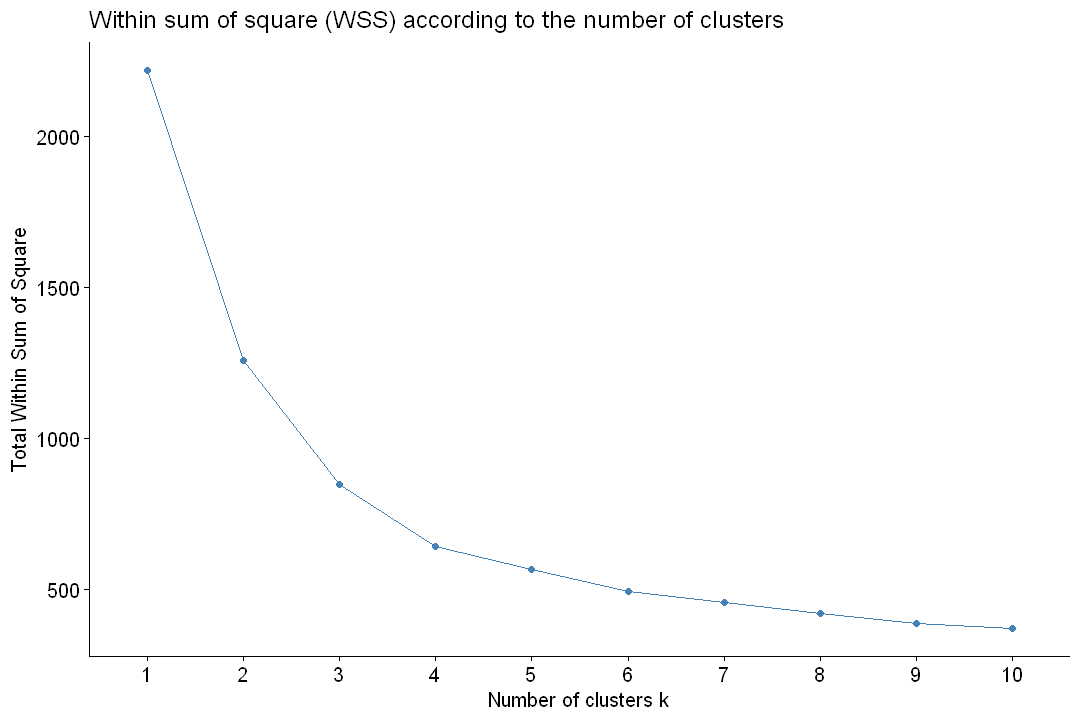

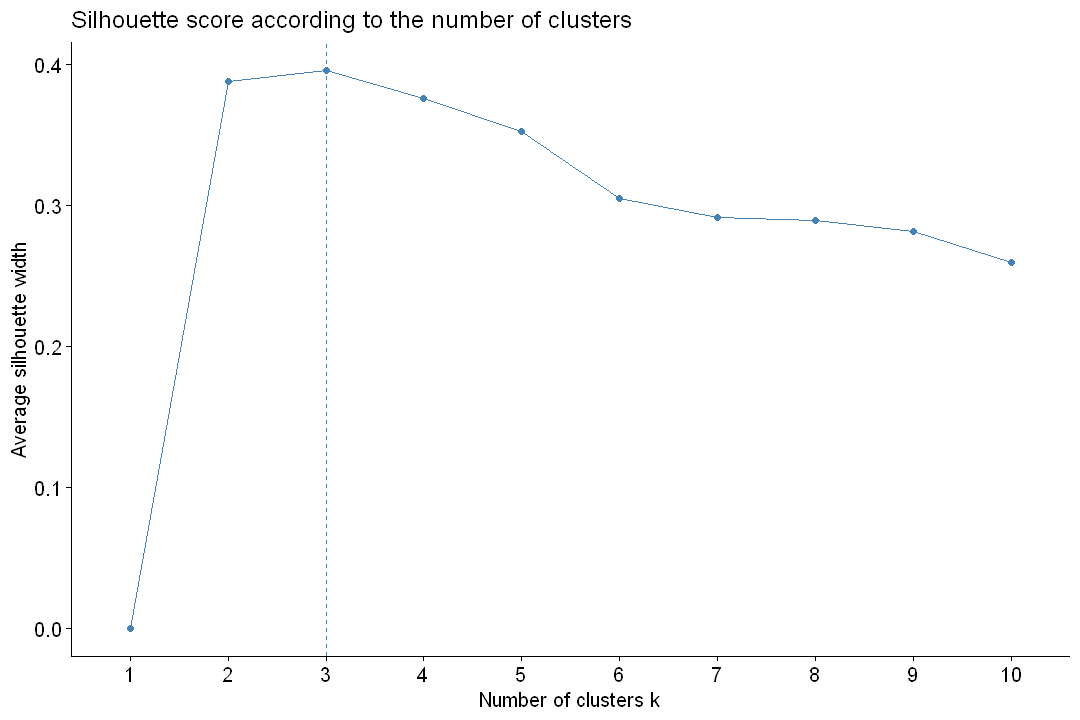

In [26]:

options(repr.plot.width = 9, repr.plot.height = 6)

fviz_nbclust(df1[,-c(25,26,27)], FUNcluster=kmeans, method="wss") +
    ggtitle("Within sum of square (WSS) according to the number of clusters")

fviz_nbclust(df1[,-c(25,26,27)], FUNcluster=kmeans, method="silhouette") +
    ggtitle("Silhouette score according to the number of clusters")

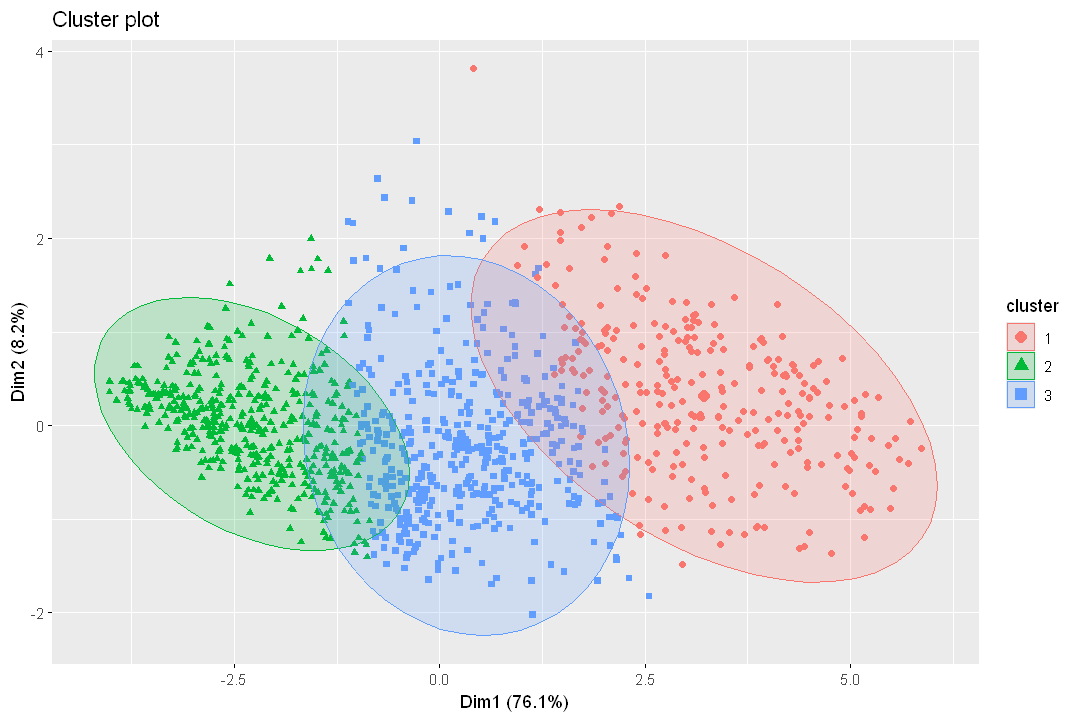

In [27]:
reskmeans = kmeans(df2[,-c(8,9,10)], centers=3) 
fviz_cluster(reskmeans, data=df2[,-c(8,9,10)], ellipse.type="norm", labelsize=8, geom=c("point"))

                     
                        1   2   3
  Divertissement area  54   8  48
  Living area         132 409 220
  Touristic area       19   7  99
  Working area         78  36  79


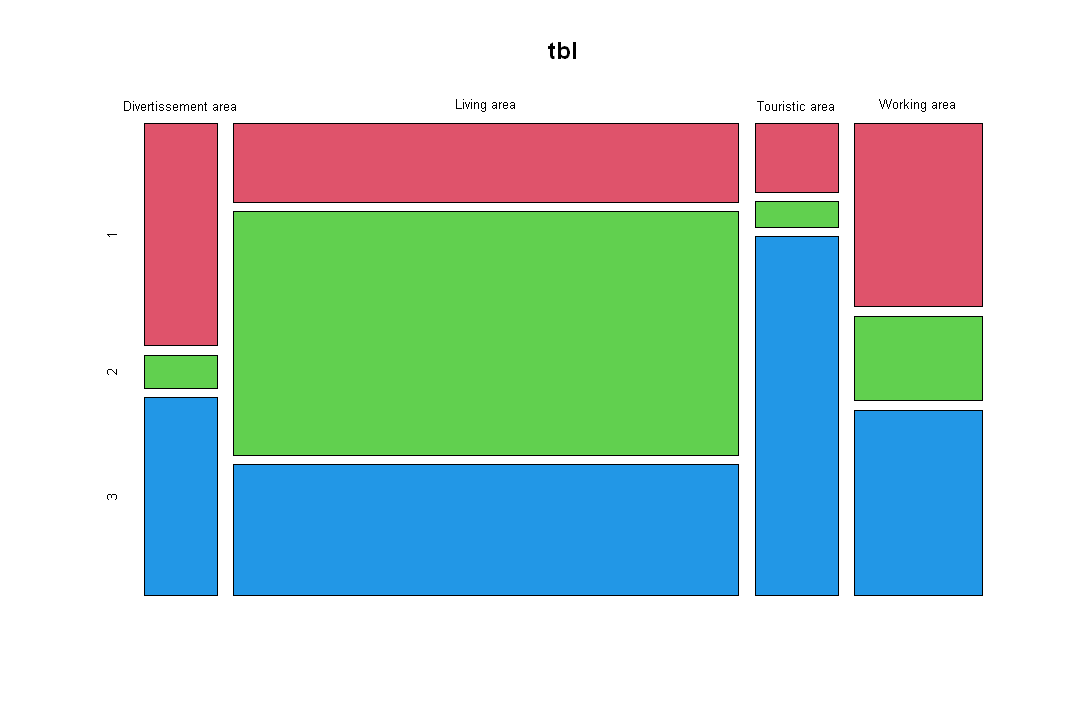

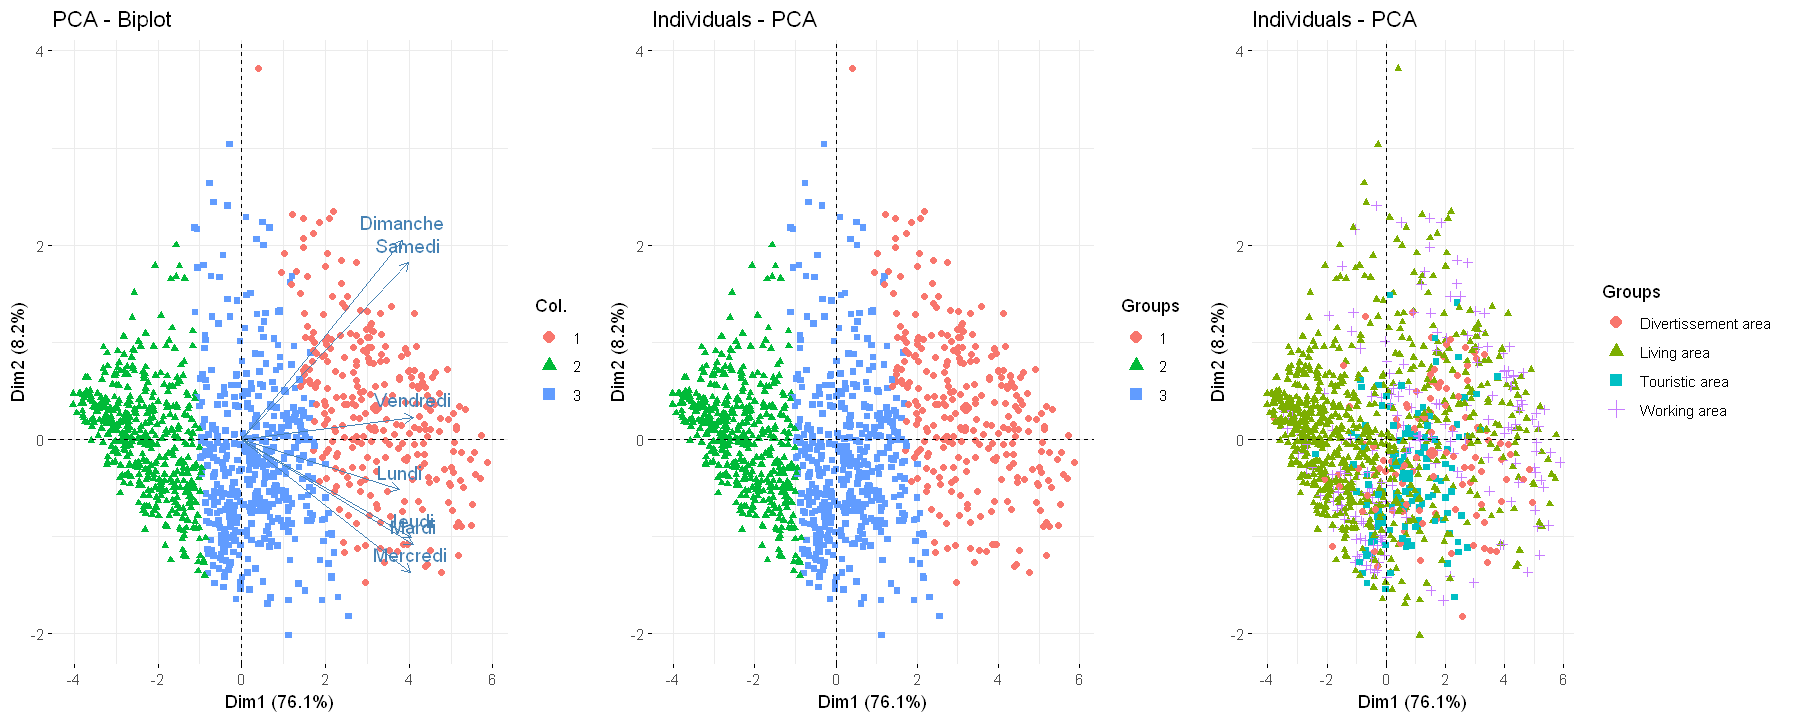

In [28]:
tbl = table(df2$Quartier, reskmeans$cluster)
print(tbl)

options(repr.plot.width = 9, repr.plot.height = 6)
mosaicplot(tbl, color=c(2:4))

# --- #
options(repr.plot.width = 15, repr.plot.height = 6)

grid.arrange(
    fviz_pca(acp2, axes=c(1,2), geom = c("point"), col.ind=as.factor(reskmeans$cluster)),
    fviz_pca_ind(acp2, axes=c(1,2), geom=c("point"), habillage=as.factor(reskmeans$cluster)),
    fviz_pca_ind(acp2, axes=c(1,2), geom=c("point"), habillage=df2$Quartier),
    ncol=3
)

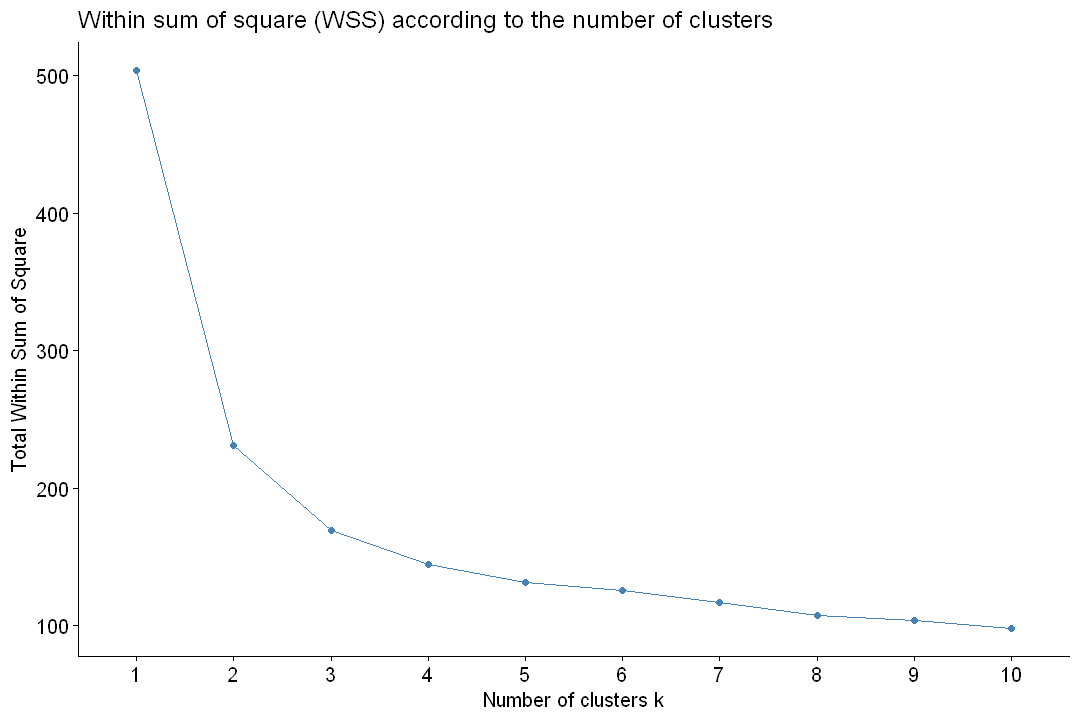

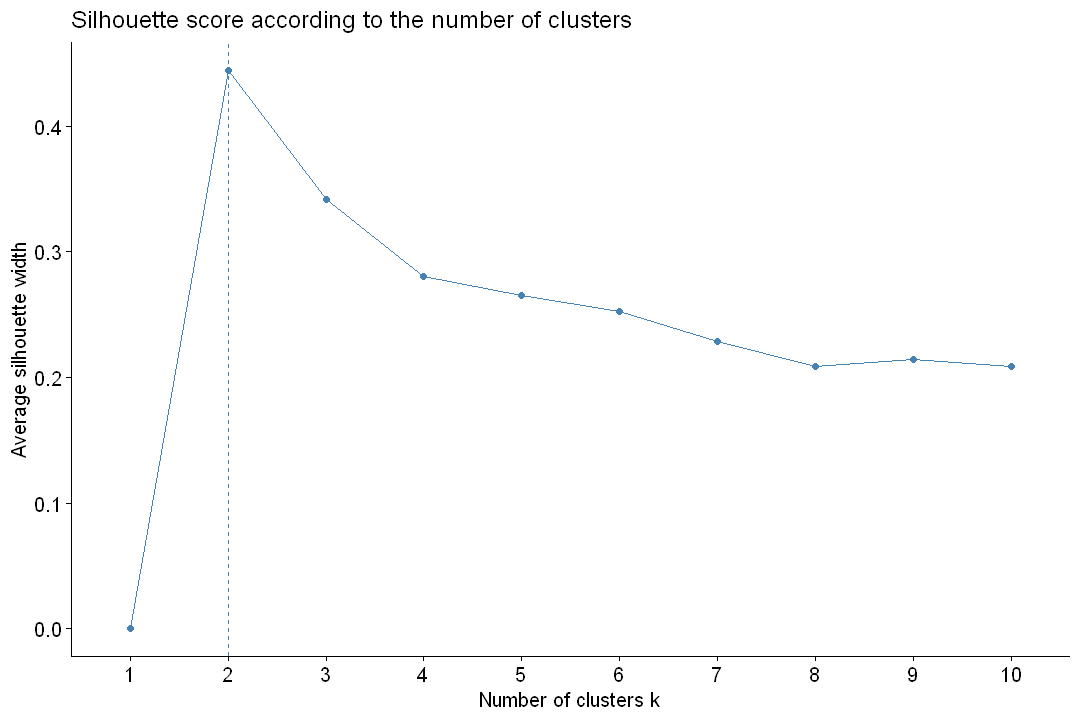

In [29]:
options(repr.plot.width = 9, repr.plot.height = 6)

fviz_nbclust(df2[,-c(8,9,10)], FUNcluster=kmeans, method="wss") +
    ggtitle("Within sum of square (WSS) according to the number of clusters")

fviz_nbclust(df2[,-c(8,9,10)], FUNcluster=kmeans, method="silhouette") +
    ggtitle("Silhouette score according to the number of clusters")

In [30]:
library(mclust)

Package 'mclust' version 6.1
Type 'citation("mclust")' for citing this R package in publications.


Attachement du package : 'mclust'


L'objet suivant est masqué depuis 'package:purrr':

    map




Best BIC values:
            EEE,2     EEE,3       EEE,4
BIC      250227.1 249842.64 249396.8671
BIC diff      0.0   -384.45   -830.2187

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEE (ellipsoidal, equal volume, shape and orientation) model with 2
components: 

 log-likelihood    n    df      BIC      ICL
       176566.7 1189 14533 250227.1 250202.4

Clustering table:
  1   2 
636 553 

Warning message:
"`gather_()` was deprecated in tidyr 1.2.0.
ℹ Please use `gather()` instead.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>."


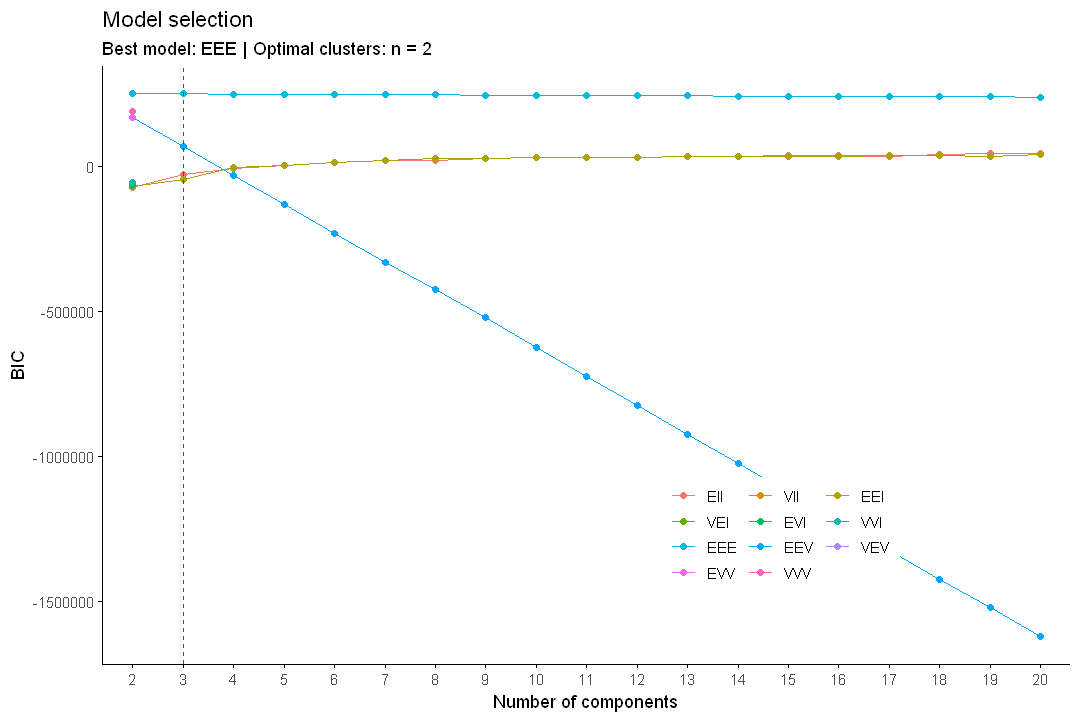

In [31]:
resBICall = mclustBIC(loading[,-c(169,170)], G=2:20)
summary(resBICall)

# --- #

resBICall = Mclust(loading[,-c(169,170)], G=2:20)
summary(resBICall)

fviz_mclust(resBICall, what="BIC")

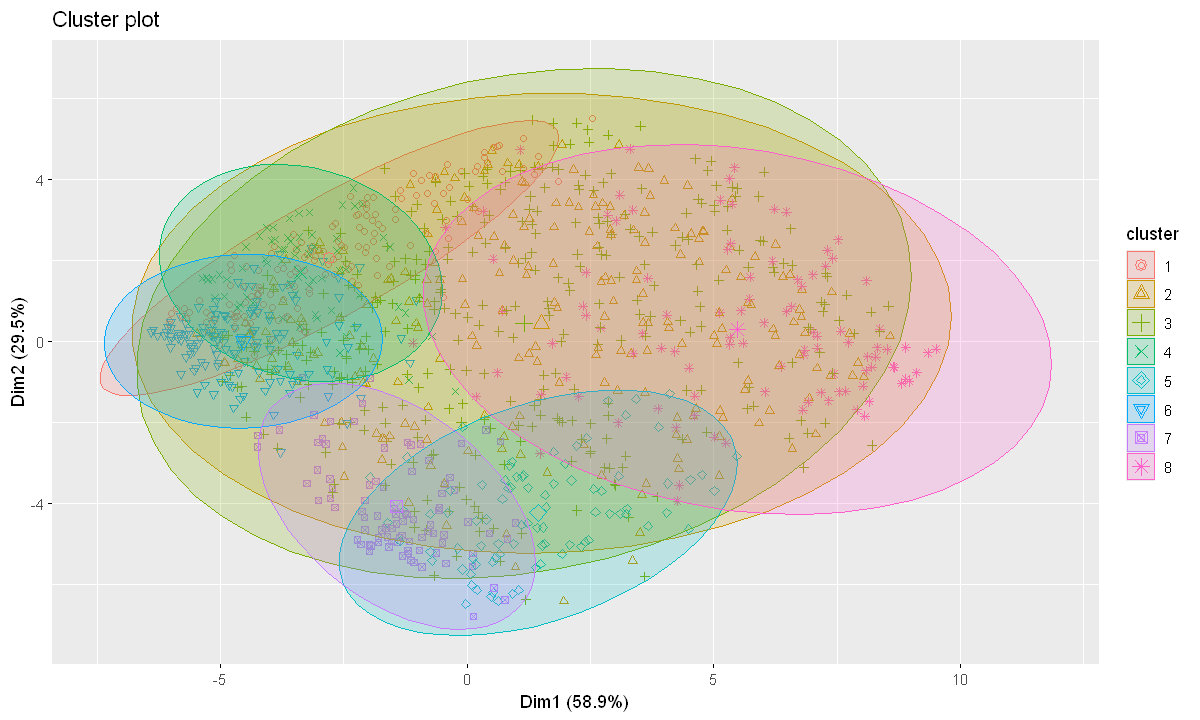

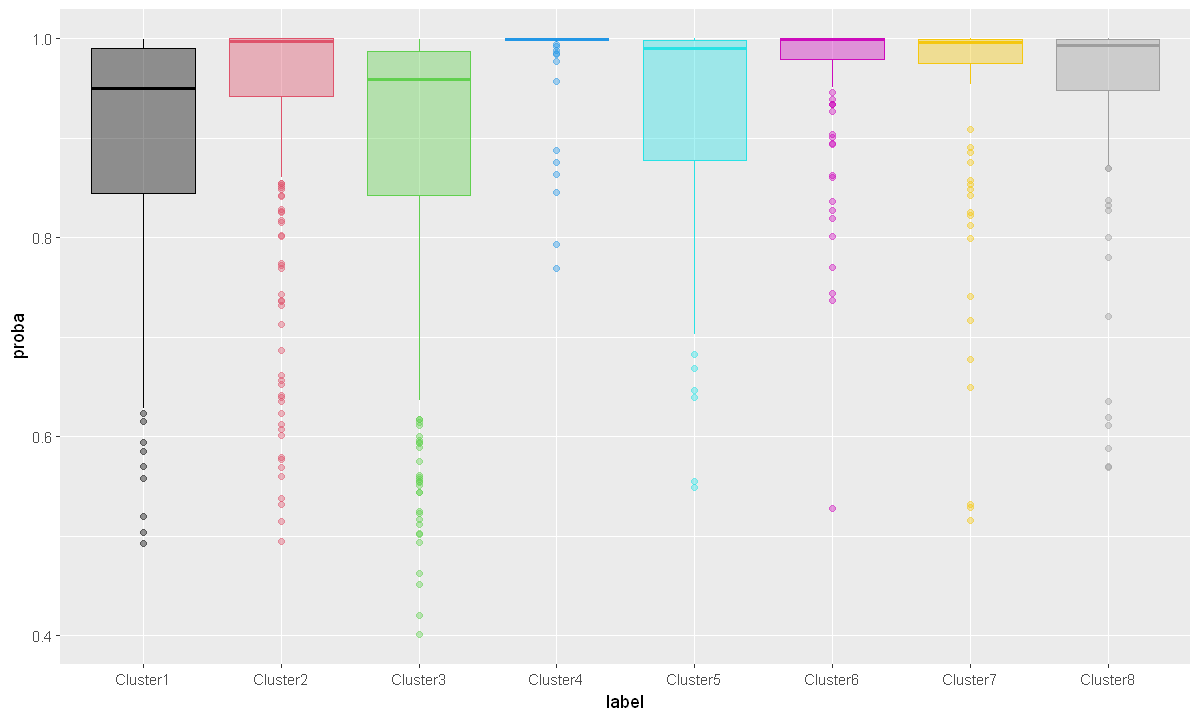

In [117]:
options(repr.plot.width = 10, repr.plot.height = 6)

resBIC = Mclust(loading[,-c(169,170)], G=8, modelNames = "VVE")
fviz_cluster(resBIC, data=loading[,-c(169,170)], ellipse.type="norm", geom="point")

# --- #

aux = data.frame(
    label = paste("Cluster", resBIC$classification, sep=""), 
    proba = apply(resBIC$z, 1, max))

ggplot(aux, aes(x=label, y=proba)) + 
    geom_boxplot(colour=1:8, fill=1:8, alpha=.4)

                                  
                                     1   2   3   4   5   6   7   8
  Banlieues et zones périphériques  52  47 110  39   9  63  10  51
  Centre historique et touristique   2  28  26   3  66   5  21   3
  Quartier culturel et artistique   61  75  44  13   3  18   1   1
  Quartier d'affaires               13  29  27   3   2   5  32   1
  Quartier nocture                   0  16  41   0   4   1  16  21
  Quartier résidentiel et familial  34  34  78   7   1  39  10  24


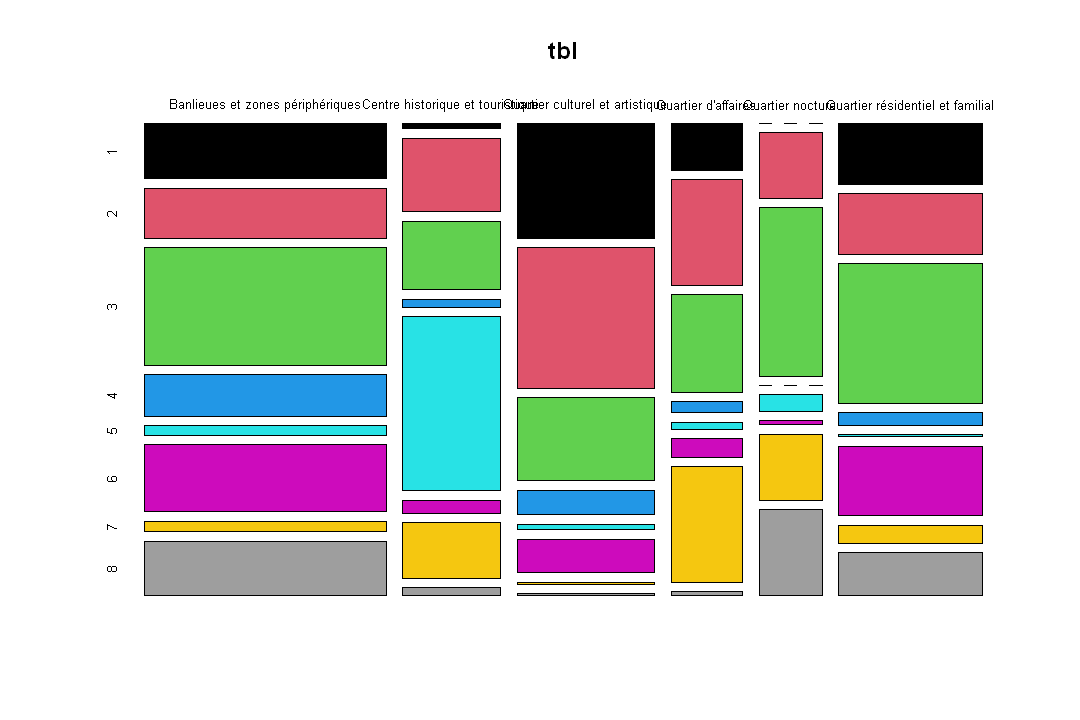

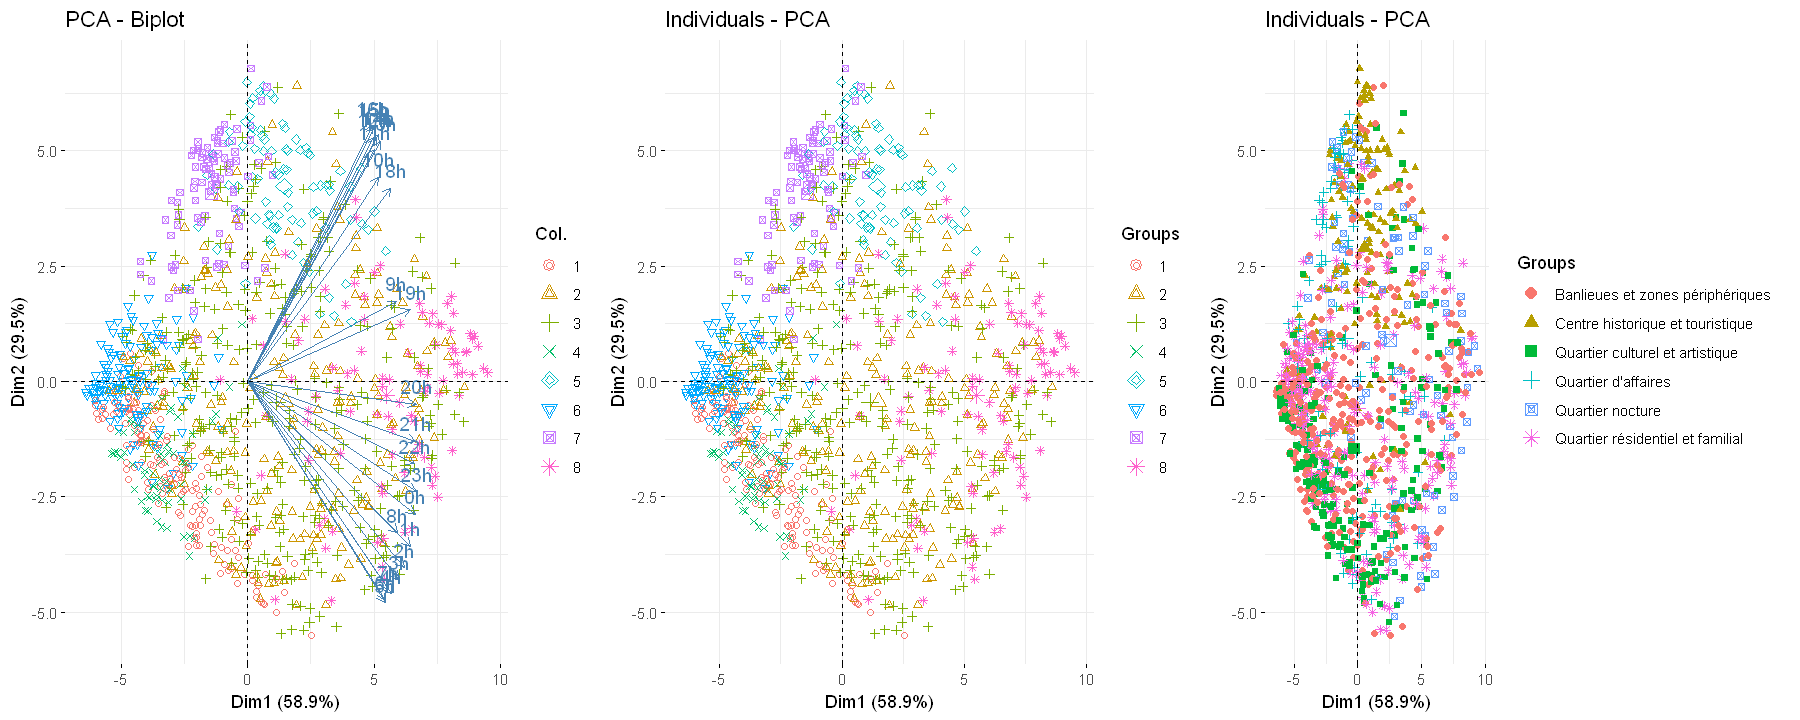

In [118]:
tbl = table(loading$Quartier, resBIC$classification)
print(tbl)

options(repr.plot.width = 9, repr.plot.height = 6)
mosaicplot(tbl, color=c(1:9))

# --- #
options(repr.plot.width = 15, repr.plot.height = 6)

grid.arrange(
    fviz_pca(acp, axes=c(1,2), geom = c("point"), col.ind=as.factor(resBIC$classification)),
    fviz_pca_ind(acp, axes=c(1,2), geom=c("point"), habillage=as.factor(resBIC$classification)),
    fviz_pca_ind(acp, axes=c(1,2), geom=c("point"), habillage=loading$Quartier),
    ncol=3
)

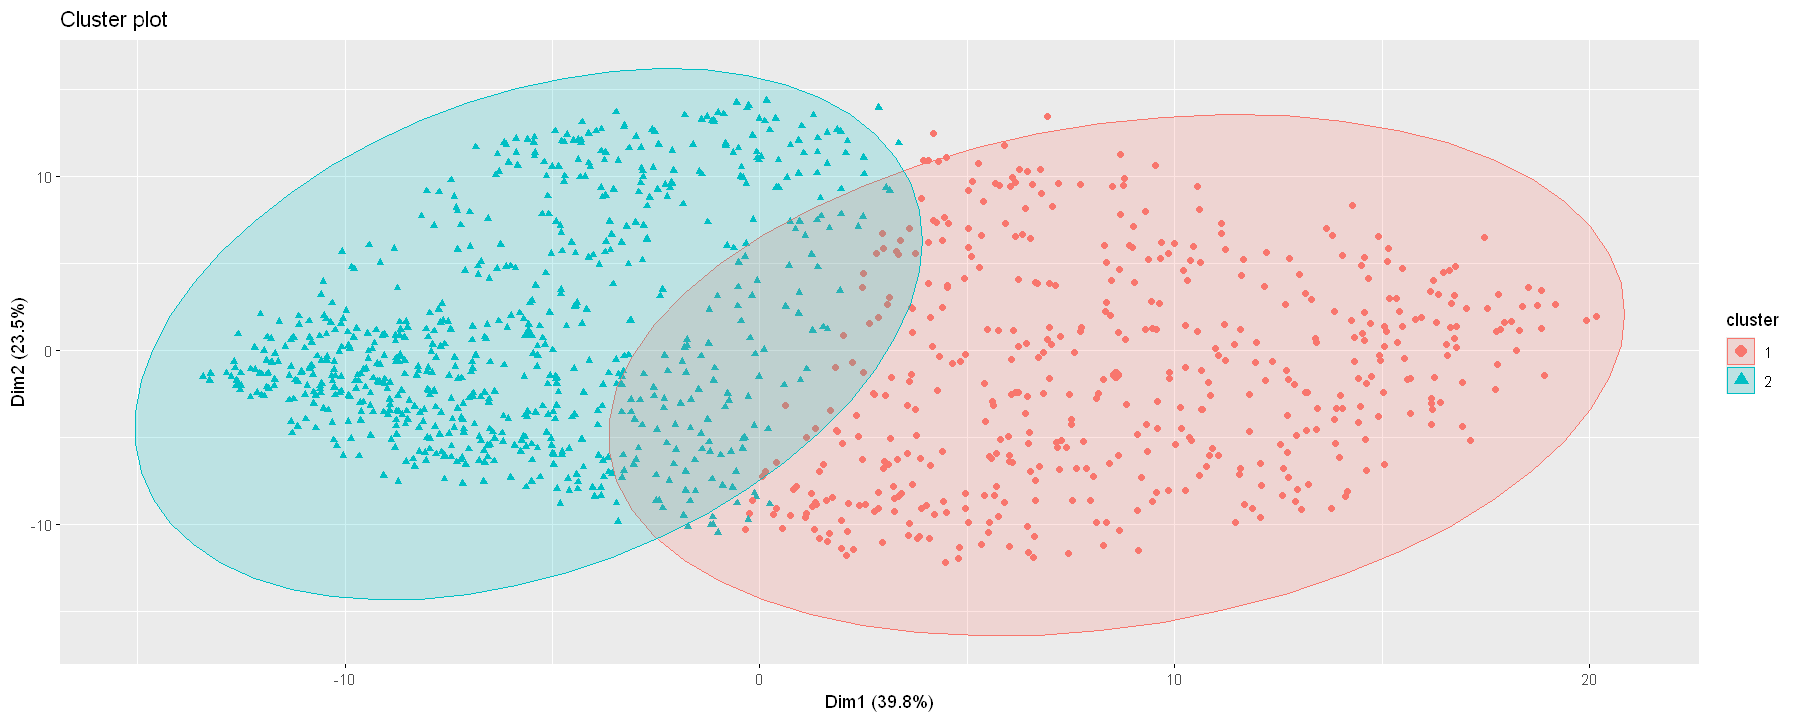

In [148]:
resBICall = mclustBIC(df1[,-c(25,26,27)], G=2:20)
summary(resBICall)

# --- #

resBICall = Mclust(df1[,-c(25,26,27)], G=2:20)
summary(resBICall)

fviz_mclust(resBICall, what="BIC")

In [146]:
options(repr.plot.width = 10, repr.plot.height = 6)

resBIC = Mclust(df1[,-c(25,26,27)], G=8, modelNames = "VVE")
fviz_cluster(resBIC, data=df1[,-c(25,26,27], ellipse.type="norm", geom="point")

# --- #

aux = data.frame(
    label = paste("Cluster", resBIC$classification, sep=""), 
    proba = apply(resBIC$z, 1, max))

ggplot(aux, aes(x=label, y=proba)) + 
    geom_boxplot(colour=1:8, fill=1:8, alpha=.4)

ERROR: Error in xtfrm.data.frame(x): impossible d’utiliser xtfrm sur un tableau de données (data frame)


In [ ]:
tbl = table(df1$Quartier, resBIC$classification)
print(tbl)

options(repr.plot.width = 9, repr.plot.height = 6)
mosaicplot(tbl, color=c(1:9))

# --- #
options(repr.plot.width = 15, repr.plot.height = 6)

grid.arrange(
    fviz_pca(acp1, axes=c(1,2), geom = c("point"), col.ind=as.factor(resBIC$classification)),
    fviz_pca_ind(acp1, axes=c(1,2), geom=c("point"), habillage=as.factor(resBIC$classification)),
    fviz_pca_ind(acp1, axes=c(1,2), geom=c("point"), habillage=df1$Quartier),
    ncol=3
)